# I. 데이터 수집

## 동 고유 코드 수집

In [ ]:
pip install requests

In [ ]:
import requests
import json
import csv
import pandas as pd
import re

In [ ]:
url1 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/dong_code.csv'
dong_code = pd.read_csv(url1, encoding = 'cp949')

dong_code

,코드명,소재지,존재여부
0,1120090400,서울특별시 성동구 행당2동,폐지
1,1120090500,서울특별시 성동구 중곡1동,폐지
2,1120090600,서울특별시 성동구 중곡2동,폐지
3,1120090700,서울특별시 성동구 중곡3동,폐지
4,1120090800,서울특별시 성동구 중곡4동,폐지
...,...,...,...
47810,4972003004,제주도 남제주군 성산면 고성리,폐지
47811,4972003005,제주도 남제주군 성산면 수산리,폐지
47812,4972003006,제주도 남제주군 성산면 온평리,폐지
47813,4972003007,제주도 남제주군 성산면 신산리,폐지


In [ ]:
dong_code = dong_code[dong_code['존재여부'] == '존재']

dong_code

,코드명,소재지,존재여부
18,1121500000,서울특별시 광진구,존재
19,1121510100,서울특별시 광진구 중곡동,존재
20,1121510200,서울특별시 광진구 능동,존재
21,1121510300,서울특별시 광진구 구의동,존재
22,1121510400,서울특별시 광진구 광장동,존재
...,...,...,...
47548,4889046032,경상남도 합천군 용주면 고품리,존재
47549,4889046033,경상남도 합천군 용주면 봉기리,존재
47551,4889046035,경상남도 합천군 용주면 우곡리,존재
47552,4889046036,경상남도 합천군 용주면 죽죽리,존재


In [ ]:
dong_code = dong_code[dong_code['코드명'].astype(str).str.startswith('11')]

dong_code

,코드명,소재지,존재여부
18,1121500000,서울특별시 광진구,존재
19,1121510100,서울특별시 광진구 중곡동,존재
20,1121510200,서울특별시 광진구 능동,존재
21,1121510300,서울특별시 광진구 구의동,존재
22,1121510400,서울특별시 광진구 광장동,존재
...,...,...,...
2031,1171010300,서울특별시 송파구 풍납동,존재
2032,1171010400,서울특별시 송파구 송파동,존재
2033,1171010500,서울특별시 송파구 석촌동,존재
2034,1171010600,서울특별시 송파구 삼전동,존재


In [ ]:
dong_code = dong_code[~dong_code['코드명'].astype(str).str.endswith('00000')]

dong_code

,코드명,소재지,존재여부
19,1121510100,서울특별시 광진구 중곡동,존재
20,1121510200,서울특별시 광진구 능동,존재
21,1121510300,서울특별시 광진구 구의동,존재
22,1121510400,서울특별시 광진구 광장동,존재
23,1121510500,서울특별시 광진구 자양동,존재
...,...,...,...
2031,1171010300,서울특별시 송파구 풍납동,존재
2032,1171010400,서울특별시 송파구 송파동,존재
2033,1171010500,서울특별시 송파구 석촌동,존재
2034,1171010600,서울특별시 송파구 삼전동,존재


In [ ]:
dong_code['코드명'] = dong_code['코드명'].astype(str).str[:-2]

dong_code

<ipython-input-7-8e11c82fef33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong_code['코드명'] = dong_code['코드명'].astype(str).str[:-2]


,코드명,소재지,존재여부
19,11215101,서울특별시 광진구 중곡동,존재
20,11215102,서울특별시 광진구 능동,존재
21,11215103,서울특별시 광진구 구의동,존재
22,11215104,서울특별시 광진구 광장동,존재
23,11215105,서울특별시 광진구 자양동,존재
...,...,...,...
2031,11710103,서울특별시 송파구 풍납동,존재
2032,11710104,서울특별시 송파구 송파동,존재
2033,11710105,서울특별시 송파구 석촌동,존재
2034,11710106,서울특별시 송파구 삼전동,존재


In [ ]:
code_list = dong_code['코드명'].tolist()

print(code_list)

['11215101', '11215102', '11215103', '11215104', '11215105', '11215107', '11215109', '11230101', '11230102', '11230103', '11230104', '11230105', '11230106', '11230107', '11230108', '11230109', '11230110', '11260101', '11260102', '11260103', '11260104', '11260105', '11260106', '11290101', '11290102', '11290103', '11290104', '11290105', '11290106', '11290107', '11290108', '11290109', '11290110', '11290111', '11290112', '11290113', '11290114', '11290115', '11290116', '11290117', '11290118', '11290119', '11290120', '11290121', '11290122', '11290123', '11290124', '11290125', '11290126', '11290127', '11290128', '11290129', '11290130', '11290131', '11290132', '11290133', '11290134', '11290135', '11290136', '11290137', '11290138', '11290139', '11305101', '11305102', '11305103', '11305104', '11320105', '11320106', '11320107', '11320108', '11350102', '11350103', '11350104', '11350105', '11350106', '11380101', '11380102', '11380103', '11380104', '11380105', '11380106', '11380107', '11380108', '11

## 동 코유 코드와 직방 API를 이용한 웹 크롤링

In [ ]:
def findApartmentsID(local):
    url = "https://apis.zigbang.com/property/biglab/apartments/list?type=local&id={localId}"
    req = requests.get(url.format(localId=local))
    info = req.json()

    result = info['ids']
    print(info['count'])
    return result

In [ ]:
findApartmentsID(11215101)

8


[4200, 4537, 5020, 11757, 16399, 27806, 70141, 89942]

In [ ]:
def rmCR(text):
    while ("\n" in text or "\r" in text):
        text = text.replace("\n", " ")
        text = text.replace("\r", " ")
    return text

def getReviewData(danjiId):
    reviewList = []

    url = f"https://apis.zigbang.com/apt/danjis/{danjiId}/reviews"
    req_review = requests.get(url)

    if req_review.status_code == 200:
        review_data = json.loads(req_review.text)
        if review_data["summary"]["reviewCount"] != 0:  # 리뷰가 없는 아파트는 스킵
            for j in review_data["data"]:
                reviewList.append([
                    danjiId,
                    review_data["summary"]["danjiName"],
                    j["age"],
                    j["sex"],
                    j["residenceType"],
                    j["married"],
                    j["score"],
                    rmCR(j["desc"]),
                    j["trafficScore"],
                    rmCR(j["trafficDesc"]),
                    j["aroundScore"],
                    rmCR(j["aroundDesc"]),
                    j["careScore"],
                    rmCR(j["careDesc"]),
                    j["residentScore"],
                    rmCR(j["residentDesc"]),
                    j["residenceTime"],
                    j["regDate"]
                ])

    return reviewList

In [ ]:
# 소재지 전체 정보를 담은 딕셔너리 생성
location_dict = pd.Series(dong_code['소재지'].values, index=dong_code['코드명']).to_dict()

# '서울특별시'를 제외한 나머지 부분(구와 동)을 추출하여 저장
gu_dong_dict = {code: ' '.join(location.split()[1:]) for code, location in location_dict.items()}

def makeCSV(code, data):
    gu_dong_name = gu_dong_dict[code]  # 코드에 해당하는 구와 동 이름을 파일명으로 사용
    df = pd.DataFrame(data[1:], columns=data[0])
    df.to_csv(f"{gu_dong_name}.csv", index=False, encoding='utf-8-sig')
    print(f"Saved data to {gu_dong_name}.csv")

def findApartmentsID(local):
    url = "https://apis.zigbang.com/property/biglab/apartments/list?type=local&id={localId}"
    req = requests.get(url.format(localId=local))
    info = req.json()
    result = info['ids']
    # 해당 구, 동의 단지수를 출력
    gu_dong_name = gu_dong_dict[local]  # local 코드에 해당하는 구와 동 이름
    print("{} 단지수: {}".format(gu_dong_name, info['count']))
    return result

all_reviews_df = pd.DataFrame()

for code in code_list:
    apartmentIDs = findApartmentsID(code)
    reviewPerDong = []
    for apartmentID in apartmentIDs:
        tmpList = getReviewData(apartmentID)
        if len(tmpList) > 0:
            for review in tmpList:
                reviewPerDong.append(review)
    if len(reviewPerDong) > 0:
        df = pd.DataFrame(reviewPerDong, columns=["danji_id", "danji_name", "age", "sex", "residenceType", "married", "totalScore",
                                                  "totalDesc", "trafficScore", "trafficDesc", "aroundScore",
                                                  "aroundDesc", "careScore", "careDesc", "residentScore", "residentDesc", "residenceTime", "regDate"])
        df['Area'] = gu_dong_dict[code]
        all_reviews_df = pd.concat([all_reviews_df, df], ignore_index=True)
    else:
        print(gu_dong_dict[code] + " doesn't have any review data")

# 모든 데이터를 하나의 CSV 파일로 저장
all_reviews_df.to_csv('all_reviews_combined.csv', index=False, encoding='utf-8-sig')
print("All data has been combined and saved to 'all_reviews_combined.csv'")

광진구 중곡동 단지수: 8
광진구 능동 단지수: 0
광진구 능동 doesn't have any review data
광진구 구의동 단지수: 25
광진구 광장동 단지수: 26
광진구 자양동 단지수: 57
광진구 화양동 단지수: 6
광진구 군자동 단지수: 6
동대문구 신설동 단지수: 1
동대문구 용두동 단지수: 14
동대문구 제기동 단지수: 7
동대문구 전농동 단지수: 11
동대문구 답십리동 단지수: 28
동대문구 장안동 단지수: 73
동대문구 청량리동 단지수: 6
동대문구 회기동 단지수: 5
동대문구 휘경동 단지수: 20
동대문구 이문동 단지수: 16
중랑구 면목동 단지수: 50
중랑구 상봉동 단지수: 21
중랑구 중화동 단지수: 18
중랑구 묵동 단지수: 32
중랑구 망우동 단지수: 23
중랑구 신내동 단지수: 31
성북구 성북동 단지수: 2
성북구 성북동1가 단지수: 0
성북구 성북동1가 doesn't have any review data
성북구 돈암동 단지수: 19
성북구 동소문동1가 단지수: 0
성북구 동소문동1가 doesn't have any review data
성북구 동소문동2가 단지수: 0
성북구 동소문동2가 doesn't have any review data
성북구 동소문동3가 단지수: 0
성북구 동소문동3가 doesn't have any review data
성북구 동소문동4가 단지수: 1
성북구 동소문동5가 단지수: 1
성북구 동소문동6가 단지수: 0
성북구 동소문동6가 doesn't have any review data
성북구 동소문동7가 단지수: 2
성북구 삼선동1가 단지수: 0
성북구 삼선동1가 doesn't have any review data
성북구 삼선동2가 단지수: 2
성북구 삼선동3가 단지수: 1
성북구 삼선동4가 단지수: 1
성북구 삼선동5가 단지수: 0
성북구 삼선동5가 doesn't have any review data
성북구 동선동1가 단지수: 1
성북구 동선동2가 단지수: 0
성북구 동선동2가 doesn't have a

In [ ]:
url2 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/crawling_result.txt'

# 파일 내용을 가져옵니다
response = requests.get(url2)
crawling_result = response.text

crawling_result

"광진구 중곡동 단지수: 8\r\n광진구 능동 단지수: 0\r\n광진구 능동 doesn't have any review data\r\n광진구 구의동 단지수: 25\r\n광진구 광장동 단지수: 26\r\n광진구 자양동 단지수: 57\r\n광진구 화양동 단지수: 6\r\n광진구 군자동 단지수: 6\r\n동대문구 신설동 단지수: 1\r\n동대문구 용두동 단지수: 14\r\n동대문구 제기동 단지수: 7\r\n동대문구 전농동 단지수: 11\r\n동대문구 답십리동 단지수: 28\r\n동대문구 장안동 단지수: 73\r\n동대문구 청량리동 단지수: 6\r\n동대문구 회기동 단지수: 5\r\n동대문구 휘경동 단지수: 20\r\n동대문구 이문동 단지수: 16\r\n중랑구 면목동 단지수: 50\r\n중랑구 상봉동 단지수: 21\r\n중랑구 중화동 단지수: 18\r\n중랑구 묵동 단지수: 32\r\n중랑구 망우동 단지수: 23\r\n중랑구 신내동 단지수: 31\r\n성북구 성북동 단지수: 2\r\n성북구 성북동1가 단지수: 0\r\n성북구 성북동1가 doesn't have any review data\r\n성북구 돈암동 단지수: 19\r\n성북구 동소문동1가 단지수: 0\r\n성북구 동소문동1가 doesn't have any review data\r\n성북구 동소문동2가 단지수: 0\r\n성북구 동소문동2가 doesn't have any review data\r\n성북구 동소문동3가 단지수: 0\r\n성북구 동소문동3가 doesn't have any review data\r\n성북구 동소문동4가 단지수: 1\r\n성북구 동소문동5가 단지수: 1\r\n성북구 동소문동6가 단지수: 0\r\n성북구 동소문동6가 doesn't have any review data\r\n성북구 동소문동7가 단지수: 2\r\n성북구 삼선동1가 단지수: 0\r\n성북구 삼선동1가 doesn't have any review data\r\n성북구 삼선동2가 단지수: 2\r\n성북구 삼선동3가 단지수: 1\r\n성

In [ ]:
# 줄별로 분할
lines = crawling_result.split('\n')

# 영문자가 포함되지 않은 줄만 세기
non_english_lines = [line for line in lines if not re.search("[a-zA-Z]", line)]
count_non_english = len(non_english_lines)

print("영문자가 포함되지 않은 줄의 수:", count_non_english)

영문자가 포함되지 않은 줄의 수: 467


# II. 데이터 확인

In [20]:
!apt-get -qq -y install fonts-nanum > /dev/null

!rm -rf ~/.cache/matplotlib -rf

In [ ]:
import os

os.kill(os.getpid(), 9)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
url3 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/crawling_data.csv'
CD = pd.read_csv(url3)

In [5]:
CD

,danji_id,danji_name,age,sex,residenceType,married,totalScore,totalDesc,trafficScore,trafficDesc,aroundScore,aroundDesc,careScore,careDesc,residentScore,residentDesc,residenceTime,regDate,Area
0,4200,중곡,30대,여자,자가 거주,기혼,5,"가성비 좋은 아파트 같아요 ! 안에는 수리 했고 , 주변 생활권도 매우 편리하고 ...",5,매우만족 ! 강남권 중랑구 가는 버스 및 지하철도 도보 5분이면 걸어가서 5호선가기...,4,주변 시장 및 병원 은행 없는게 없어 편해요 ! 마트도 있고 프렌차이즈 및 카페도 ...,3,단지관리는 그냥 그래요 ! 드럽거나 엄청깨끗하거나 그런건 없어서.... 외부 페인트...,4,"만족해요 ! 옛날아파트라 구조도 크게 잘나온거 같고 , 안에 대부분 리모델링하고 거...",2017년까지 거주,2020.07.02,광진구 중곡동
1,4200,중곡,30대,여자,자가 거주,기혼,5,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 ...,5,바로앞에 노원 강남등 여러노선의 버스가있고 걸어서7-10분거리에 지하철역있어서 교통...,5,바로앞 중랑천이있어서 아기랑 강아지 산책하기 좋고 시장 마트 편의점등 편의시설많아 ...,5,관리비도 저렴하고 분리수거날도 따로 정해져잇어서 관리가잘되고 택배도 경비아저씨가 ...,5,해도잘들어오고 오래된 아파트인데도 겨울에도 난방많이안해도 따뜻해요 여름에도 고층은 ...,2019년에 거주,2019.04.19,광진구 중곡동
2,4200,중곡,20대,여자,자가 거주,미혼,5,"집도 크고 주변환경도 만족한다. 지하철, 버스 등 교통시설도 괜찮고 전체적으로 편리하다.",5,"학교와의 거리도 적절하고, 버스정류장이 가까워서 학원 차를 놓쳤을 때 교통수단도 너...",4,주변에 자주 가는 사우나 같은 공공장소가 있어서 편리하지만 앞에 건물이 생겨서 산이...,5,단지 청소도 매우 잘해주시고 경비 보안도 철저하여 안심이 되고 주차장 관리도 잘되고...,4,뛰고 싶어도 층간소음이 신경쓰여 뛰지 못하지만 햇빛이 잘 들어올수있고 따뜻하다.,2018년에 거주,2018.03.09,광진구 중곡동
3,4200,중곡,30대,여자,전세 또는 월세,미혼,3,초등학교가 가깝고 그냥 위험한 느낌이 없어요 파출소도 근처에 있어서 안전한기분? 동...,2,버스 정류장은 근처에 좀 있는데 지하철과 거리는 많이 멀어요,3,초등학교 있으니까 어린애있으면 좋음 슈퍼 상가 가까이 있음 대형은 없음 놀이터도 있...,3,청소는 깔끔하고 통제는 좀 자유로운 편입니다 그냥 그래요 관리비가 그냥저냥 괜찮아서...,2,옆이 바로 도로라 시끄러워요 새벽에 가끔 경적때문에 깰때있습니다 그 외에는 딱히 불...,2012년까지 거주,2017.08.11,광진구 중곡동
4,4200,중곡,40대,여자,전세 또는 월세,기혼,3,"조용하고 중랑천 근처에 있어 운동하기 좋다, 재래시장도 근처에 있어 물가가 저렴한 ...",3,"지하철은 5호선 군자역까지 15분, 7호선 중곡역은 10분 정도 있음 좀 멀다고 느...",3,"조용하고 중랑천이 인접해있어 자전거 타기나 산책하기에 좋음, 재래시장도 근처에 있어...",3,"오래 된 아파트라 보안이나 시설이 노후 한편, 주차공간적 고 아이들 놀 놀이터가 없...",3,오래 죈 아파트라 층이 낮아서 여름엔 덥고 주차장 시설이 미비해서 불편하다,2015년까지 거주,2017.07.10,광진구 중곡동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,38487,헬리오시티,40대,여자,자가 거주,기혼,5,예상보다 잘지었다.기대했던것보다 더 만족한다.일년정도 파크밴드 산책하며 설레기도 했...,5,8호선지하철 역세권에 버스노선 충분해서 편리하지만 아직은 1.2단지쪽에서는 송파역까...,5,일단 가락시장 근거리라 동네수퍼가 무지물건이 싸고 싱싱하다. 석촌재래시장 쪽으로 ...,5,지상천국이다. 차량통제는물론 오토바이.퀵보드등 차단.흡연도 거의차단하고있어 사실가...,4,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가...,2020년에 거주,2020.01.29,송파구 가락동
50594,38487,헬리오시티,40대,남자,자가 거주,기혼,5,단지간 거리가 도보로 10분여 소요되면 단지별 장단점이 우수하고 대규모 단지여서 본...,5,"송파역 3,4번 출구 초역세권 도시급 신축 아파트임. 지하철 연결 공사 진행중이고 ...",5,"1~2단지 탄천뷰, 3~5단지 롯데타워뷰, 2단지 가락시장 현대화 2단계 지상층 공...",5,공동현관 비번 관리 및 5개 생활권으로 나뉘어 관리사무소 운영중. 지상층 차량 미진...,5,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...,2019년에 거주,2019.02.20,송파구 가락동
50595,38487,헬리오시티,40대,남자,자가 거주,기혼,5,경비시스템도 최첨단으로 관리되고 커뮤니티도 잘 준비되고 있고 백화점ㆍ쇼핑ㆍ마트 모든...,5,"8호선ㆍ9호선ㆍ3호선 이용이 쉽고 4,5단지쪽이 무척 편리하답니다 특히 역세권의 4...",4,잠실까지 거리가 매우 가까워 업무보기 편리하고 롯데백화점ㆍ마트ㆍ현대시티몰ㆍ이랜드몰ㆍ...,5,모두 최첨단시스템 및 주차장의 완전지하화로 관리가 잘 될수 밖에 없으며 아직은 거주...,5,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,2019년에 거주,2019.01.18,송파구 가락동
50596,58786,진넥스베르디엠,40대,여자,자가 거주,기혼,5,편의시설과 교통이 좋고 살기에 편리한 신축급 주상복합입니다 주변에 비해 가격도 합리...,5,개롱역 도보 2분 내외이고 개롱역에 버스정류장이 있습니다 잠실까지 버스로 10-30...,5,같은 건물 1층에 미용실 정육점 야채과일가게 반찬가게가 있으며 주변에 각종 병원 및...,5,경비아저씨 상주중이며 진넥스에서 유지보수 관리합니다 지하주차장은 깨끗하게 관리되고 ...,5,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...,2021년에 거주,2021.02.09,송파구 가락동


In [6]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   danji_id       50598 non-null  int64 
 1   danji_name     50598 non-null  object
 2   age            50598 non-null  object
 3   sex            50598 non-null  object
 4   residenceType  50598 non-null  object
 5   married        50598 non-null  object
 6   totalScore     50598 non-null  int64 
 7   totalDesc      50598 non-null  object
 8   trafficScore   50598 non-null  int64 
 9   trafficDesc    50598 non-null  object
 10  aroundScore    50598 non-null  int64 
 11  aroundDesc     50598 non-null  object
 12  careScore      50598 non-null  int64 
 13  careDesc       50598 non-null  object
 14  residentScore  50598 non-null  int64 
 15  residentDesc   50598 non-null  object
 16  residenceTime  50598 non-null  object
 17  regDate        50598 non-null  object
 18  Area           50598 non-n

In [7]:
CD.isnull().sum()

danji_id         0
danji_name       0
age              0
sex              0
residenceType    0
married          0
totalScore       0
totalDesc        0
trafficScore     0
trafficDesc      0
aroundScore      0
aroundDesc       0
careScore        0
careDesc         0
residentScore    0
residentDesc     0
residenceTime    0
regDate          0
Area             0
dtype: int64

In [8]:
# regDate 열을 datetime 형식으로 변환
CD['regDate'] = pd.to_datetime(CD['regDate'])

# 2019년 이전인 행을 제외+하는 조건을 설정하여 새로운 데이터프레임 생성
CD_a = CD[CD['regDate'].dt.year >= 2019]

# 결과 출력
CD_a

,danji_id,danji_name,age,sex,residenceType,married,totalScore,totalDesc,trafficScore,trafficDesc,aroundScore,aroundDesc,careScore,careDesc,residentScore,residentDesc,residenceTime,regDate,Area
0,4200,중곡,30대,여자,자가 거주,기혼,5,"가성비 좋은 아파트 같아요 ! 안에는 수리 했고 , 주변 생활권도 매우 편리하고 ...",5,매우만족 ! 강남권 중랑구 가는 버스 및 지하철도 도보 5분이면 걸어가서 5호선가기...,4,주변 시장 및 병원 은행 없는게 없어 편해요 ! 마트도 있고 프렌차이즈 및 카페도 ...,3,단지관리는 그냥 그래요 ! 드럽거나 엄청깨끗하거나 그런건 없어서.... 외부 페인트...,4,"만족해요 ! 옛날아파트라 구조도 크게 잘나온거 같고 , 안에 대부분 리모델링하고 거...",2017년까지 거주,2020-07-02,광진구 중곡동
1,4200,중곡,30대,여자,자가 거주,기혼,5,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 ...,5,바로앞에 노원 강남등 여러노선의 버스가있고 걸어서7-10분거리에 지하철역있어서 교통...,5,바로앞 중랑천이있어서 아기랑 강아지 산책하기 좋고 시장 마트 편의점등 편의시설많아 ...,5,관리비도 저렴하고 분리수거날도 따로 정해져잇어서 관리가잘되고 택배도 경비아저씨가 ...,5,해도잘들어오고 오래된 아파트인데도 겨울에도 난방많이안해도 따뜻해요 여름에도 고층은 ...,2019년에 거주,2019-04-19,광진구 중곡동
12,4537,성원,50대,여자,자가 거주,기혼,5,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 ...,5,"넉넉15분 지하철 바로앞 강남,건대 버스자주오고 자동차로는 동부간선, 영동대교등...",4,"걸어서 어린이집,진로마트,면곡시장등있고 다리건너면 구바우하우스, 마트,상가,식당,학...",5,"2분의 경비아저씨가 청소,관리등 어린이놀이터나 주차장 음식물 ,재활용쓰레기장등 관리...",5,"용마산 ,뚝방길이 있어서 자연환경좋고 양쪽 넓은베란다 2개씩있어요 서쪽베란다라해도 ...",2021년에 거주,2021-04-14,광진구 중곡동
30,70141,광덕,50대,남자,자가 거주,기혼,4,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이...",5,강남역 직통 146번이 4~5분 간격으로 운행되고 있으며 4번 마을버스를 1분 거리...,4,코엑스 및 광화문 까지의 거리가 10킬로 이내이며 5분거리에 홈플러스가 위치하고 5...,5,55세대 소수 정예주민들이 잘 운영하는 입주자 대표회의의 노력으로 안전하고 깨끗하며...,5,대부분의 세대가 평수 대비 실면적이 잘 나오는 구조로 만족도가 높습니다. 각각 2대...,2020년에 거주,2020-10-21,광진구 중곡동
31,4,강변우성,40대,여자,자가 거주,기혼,4,"학군부분이 살짝 아쉽긴하지만 생활하기 편리합니다 마트,편의점이 가까이있고 병원,약국...",4,"2호선 강변역까지 3분이라서 너무 편합니다 마을버스,일반버스 타기편하고 강변북로 진...",4,이번에 강변역주위 노점상정리되서 깔끔해졌어요 동서울터미널과 구의정비구역 재개발되면 ...,5,단지가 크지않고 소장님이 오래계신분이라 관리가 잘되고있어요 경비아저씨도 입주민이 ...,4,한강변에 위치하고 있고 정남향이라 햇빛이 잘들어요 겨울에는 난방잘되고 따뜻해요 구...,2019년까지 거주,2023-07-24,광진구 구의동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,38487,헬리오시티,40대,여자,자가 거주,기혼,5,예상보다 잘지었다.기대했던것보다 더 만족한다.일년정도 파크밴드 산책하며 설레기도 했...,5,8호선지하철 역세권에 버스노선 충분해서 편리하지만 아직은 1.2단지쪽에서는 송파역까...,5,일단 가락시장 근거리라 동네수퍼가 무지물건이 싸고 싱싱하다. 석촌재래시장 쪽으로 ...,5,지상천국이다. 차량통제는물론 오토바이.퀵보드등 차단.흡연도 거의차단하고있어 사실가...,4,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가...,2020년에 거주,2020-01-29,송파구 가락동
50594,38487,헬리오시티,40대,남자,자가 거주,기혼,5,단지간 거리가 도보로 10분여 소요되면 단지별 장단점이 우수하고 대규모 단지여서 본...,5,"송파역 3,4번 출구 초역세권 도시급 신축 아파트임. 지하철 연결 공사 진행중이고 ...",5,"1~2단지 탄천뷰, 3~5단지 롯데타워뷰, 2단지 가락시장 현대화 2단계 지상층 공...",5,공동현관 비번 관리 및 5개 생활권으로 나뉘어 관리사무소 운영중. 지상층 차량 미진...,5,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...,2019년에 거주,2019-02-20,송파구 가락동
50595,38487,헬리오시티,40대,남자,자가 거주,기혼,5,경비시스템도 최첨단으로 관리되고 커뮤니티도 잘 준비되고 있고 백화점ㆍ쇼핑ㆍ마트 모든...,5,"8호선ㆍ9호선ㆍ3호선 이용이 쉽고 4,5단지쪽이 무척 편리하답니다 특히 역세권의 4...",4,잠실까지 거리가 매우 가까워 업무보기 편리하고 롯데백화점ㆍ마트ㆍ현대시티몰ㆍ이랜드몰ㆍ...,5,모두 최첨단시스템 및 주차장의 완전지하화로 관리가 잘 될수 밖에 없으며 아직은 거주...,5,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,2019년에 거주,2019-01-18,송파구 가락동
50596,58786,진넥스베르디엠,40대,여자,자가 거주,기혼,5,편의시설과 교통이 좋고 살기에 편리한 신축급 주상복합입니다 주변에 비해 가격도 합리...,5,개롱역 도보 2분 내외이고 개롱역에 버스정류장이 있습니다 잠실까지 버스로 10-30...,5,같은 건물 1층에 미용실 정육점 야채과일가게 반찬가게가 있으며 주변에 각종 병원 및...,5,경비아저씨 상주중이며 진넥스에서 유지보수 관리합니다 지하주차장은 깨끗하게 관리되고 ...,5,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...,2021년에 거주,2021-02-09,송파구 가락동


In [9]:
# '까지'가 포함되는지 여부와 포함된 숫자가 2019보다 작은지를 확인하는 함수
def check_residence_time(date_str):
    if '까지' in date_str:
        year_str = date_str.split('년')[0]
        year = int(year_str)
        if year <= 2019:
            return False
    return True

# residenceTime 열에 적용하여 조건을 만족하는 행만 선택하여 새로운 데이터프레임 생성
CD_b = CD_a[CD_a['residenceTime'].apply(check_residence_time)]

# 결과 출력
CD_b

,danji_id,danji_name,age,sex,residenceType,married,totalScore,totalDesc,trafficScore,trafficDesc,aroundScore,aroundDesc,careScore,careDesc,residentScore,residentDesc,residenceTime,regDate,Area
1,4200,중곡,30대,여자,자가 거주,기혼,5,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 ...,5,바로앞에 노원 강남등 여러노선의 버스가있고 걸어서7-10분거리에 지하철역있어서 교통...,5,바로앞 중랑천이있어서 아기랑 강아지 산책하기 좋고 시장 마트 편의점등 편의시설많아 ...,5,관리비도 저렴하고 분리수거날도 따로 정해져잇어서 관리가잘되고 택배도 경비아저씨가 ...,5,해도잘들어오고 오래된 아파트인데도 겨울에도 난방많이안해도 따뜻해요 여름에도 고층은 ...,2019년에 거주,2019-04-19,광진구 중곡동
12,4537,성원,50대,여자,자가 거주,기혼,5,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 ...,5,"넉넉15분 지하철 바로앞 강남,건대 버스자주오고 자동차로는 동부간선, 영동대교등...",4,"걸어서 어린이집,진로마트,면곡시장등있고 다리건너면 구바우하우스, 마트,상가,식당,학...",5,"2분의 경비아저씨가 청소,관리등 어린이놀이터나 주차장 음식물 ,재활용쓰레기장등 관리...",5,"용마산 ,뚝방길이 있어서 자연환경좋고 양쪽 넓은베란다 2개씩있어요 서쪽베란다라해도 ...",2021년에 거주,2021-04-14,광진구 중곡동
30,70141,광덕,50대,남자,자가 거주,기혼,4,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이...",5,강남역 직통 146번이 4~5분 간격으로 운행되고 있으며 4번 마을버스를 1분 거리...,4,코엑스 및 광화문 까지의 거리가 10킬로 이내이며 5분거리에 홈플러스가 위치하고 5...,5,55세대 소수 정예주민들이 잘 운영하는 입주자 대표회의의 노력으로 안전하고 깨끗하며...,5,대부분의 세대가 평수 대비 실면적이 잘 나오는 구조로 만족도가 높습니다. 각각 2대...,2020년에 거주,2020-10-21,광진구 중곡동
32,4,강변우성,30대,남자,전세 또는 월세,기혼,5,광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....,5,2호선 강변역이 도보 5분 거리에 있고 정문 앞 마을버스가 5분마다 있어 자양동쪽 ...,5,아파트 앞 뒤로 편의점 5개가 있다. 강변역 지하로 롯데마트. 마을버스로 1 0분...,5,30년 된 아파트지만 관리가 매우 잘되있다. 주차시설이 세대당 1대로 이중주차가 ...,5,남동. 남서향이라 일조량이 좋다. 저층을 제외하면 대부분 세대에서 한강조망이 가능하...,2022년에 거주,2022-10-17,광진구 구의동
33,4,강변우성,50대,여자,자가 거주,기혼,4,한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...,5,이 아파트의 최고는 멋진 한강뷰 경관이라 생각한다. 다음으로 좋은 점이 교통 편이성...,5,테크노마트와 롯데마트가 있어 장보기 좋다. 2시간 이내 배송이 되니 직접 갈 필요없...,5,청소 상태 만족. 경비실 관리실 친절하고 성실하셔서 항상 감사. 택배 잘 관리해 주...,5,남동향이라 따뜻하고 시원. 층마다 차이가 있겠지만 고층은 사실 더위 많이 안 타면 ...,2021년에 거주,2021-05-12,광진구 구의동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,38487,헬리오시티,40대,여자,자가 거주,기혼,5,예상보다 잘지었다.기대했던것보다 더 만족한다.일년정도 파크밴드 산책하며 설레기도 했...,5,8호선지하철 역세권에 버스노선 충분해서 편리하지만 아직은 1.2단지쪽에서는 송파역까...,5,일단 가락시장 근거리라 동네수퍼가 무지물건이 싸고 싱싱하다. 석촌재래시장 쪽으로 ...,5,지상천국이다. 차량통제는물론 오토바이.퀵보드등 차단.흡연도 거의차단하고있어 사실가...,4,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가...,2020년에 거주,2020-01-29,송파구 가락동
50594,38487,헬리오시티,40대,남자,자가 거주,기혼,5,단지간 거리가 도보로 10분여 소요되면 단지별 장단점이 우수하고 대규모 단지여서 본...,5,"송파역 3,4번 출구 초역세권 도시급 신축 아파트임. 지하철 연결 공사 진행중이고 ...",5,"1~2단지 탄천뷰, 3~5단지 롯데타워뷰, 2단지 가락시장 현대화 2단계 지상층 공...",5,공동현관 비번 관리 및 5개 생활권으로 나뉘어 관리사무소 운영중. 지상층 차량 미진...,5,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...,2019년에 거주,2019-02-20,송파구 가락동
50595,38487,헬리오시티,40대,남자,자가 거주,기혼,5,경비시스템도 최첨단으로 관리되고 커뮤니티도 잘 준비되고 있고 백화점ㆍ쇼핑ㆍ마트 모든...,5,"8호선ㆍ9호선ㆍ3호선 이용이 쉽고 4,5단지쪽이 무척 편리하답니다 특히 역세권의 4...",4,잠실까지 거리가 매우 가까워 업무보기 편리하고 롯데백화점ㆍ마트ㆍ현대시티몰ㆍ이랜드몰ㆍ...,5,모두 최첨단시스템 및 주차장의 완전지하화로 관리가 잘 될수 밖에 없으며 아직은 거주...,5,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,2019년에 거주,2019-01-18,송파구 가락동
50596,58786,진넥스베르디엠,40대,여자,자가 거주,기혼,5,편의시설과 교통이 좋고 살기에 편리한 신축급 주상복합입니다 주변에 비해 가격도 합리...,5,개롱역 도보 2분 내외이고 개롱역에 버스정류장이 있습니다 잠실까지 버스로 10-30...,5,같은 건물 1층에 미용실 정육점 야채과일가게 반찬가게가 있으며 주변에 각종 병원 및...,5,경비아저씨 상주중이며 진넥스에서 유지보수 관리합니다 지하주차장은 깨끗하게 관리되고 ...,5,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...,2021년에 거주,2021-02-09,송파구 가락동


In [10]:
CDF = CD_b.copy()

In [11]:
CDF['meanScore'] = (CDF['totalScore'] + CDF['trafficScore'] + CDF['aroundScore'] + CDF['careScore'] + CDF['residentScore'])/5

# III. 데이터 시각화

## 특징별 분포 시각화

### 연령대 분포

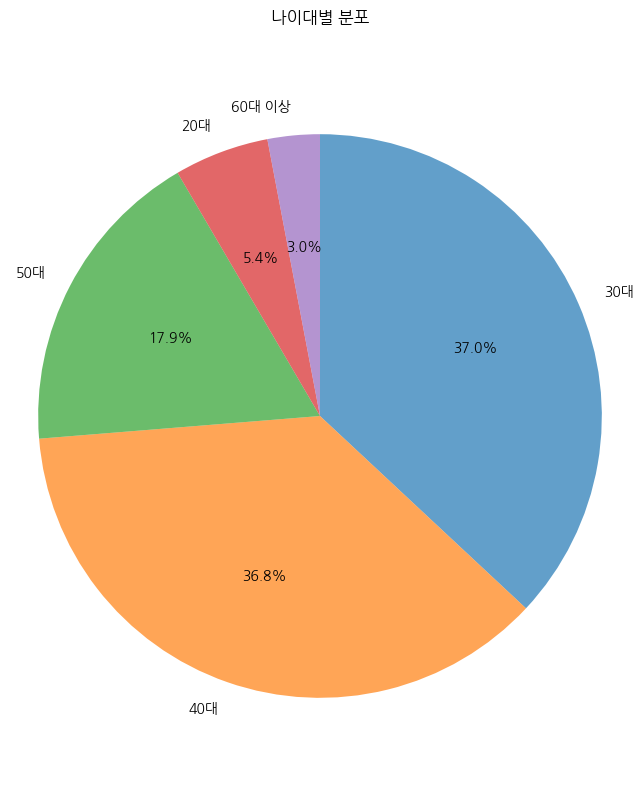

In [12]:
# 데이터
age_counts = CDF['age'].value_counts()

# 원 그래프 그리기
plt.figure(figsize=(8, 10))
plt.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'alpha':0.7})
plt.title('나이대별 분포')
plt.axis('equal')  # 원 그래프를 원형으로 유지
plt.show()

### 성별 분포

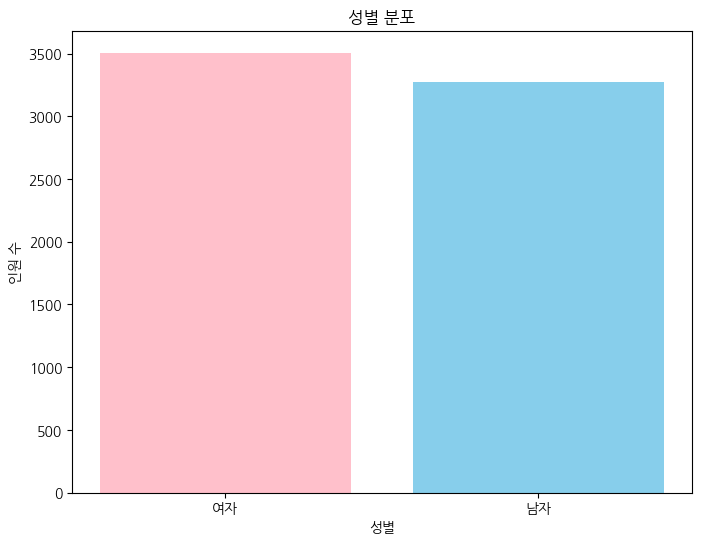

In [13]:
# 데이터
sex_counts = CDF['sex'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values, color=['pink', 'skyblue'])
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('인원 수')
plt.show()

거주 유형 분포

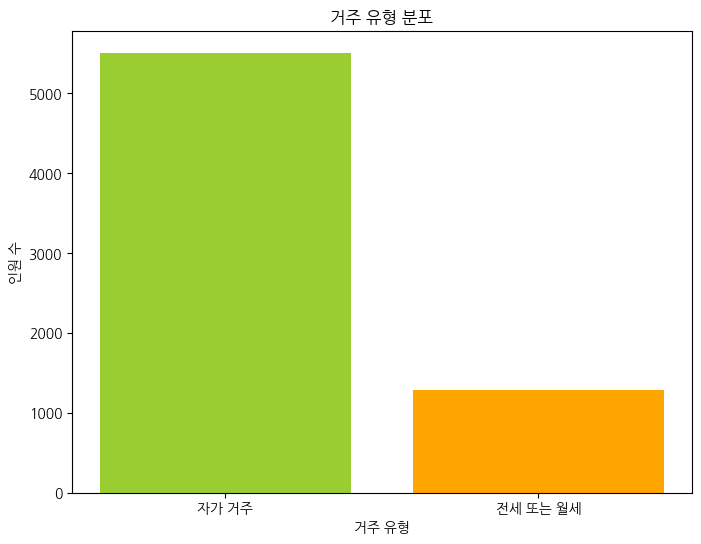

In [14]:
# 데이터
residence_counts = CDF['residenceType'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(residence_counts.index, residence_counts.values, color=['yellowgreen', 'orange'])
plt.title('거주 유형 분포')
plt.xlabel('거주 유형')
plt.ylabel('인원 수')
plt.show()

결혼 여부 분포

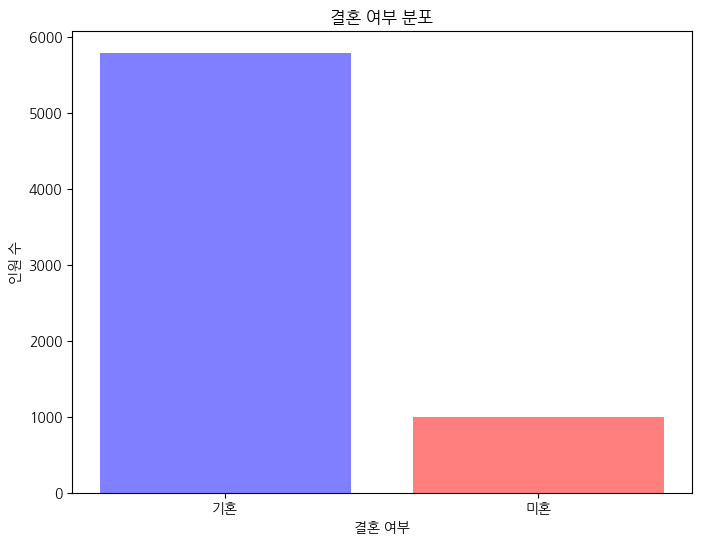

In [15]:
# 데이터
married_counts = CDF['married'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(married_counts.index, married_counts.values, color=['blue', 'red'], alpha=0.5)
plt.title('결혼 여부 분포')
plt.xlabel('결혼 여부')
plt.ylabel('인원 수')
plt.show()

### 항목별 점수 분포

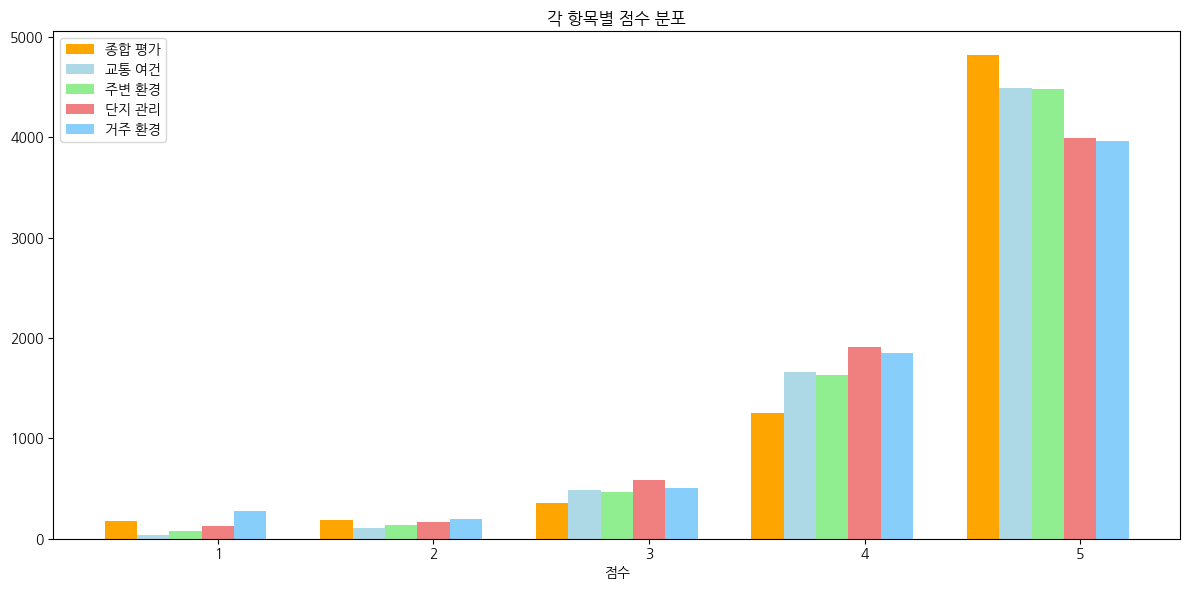

In [16]:
# 데이터
total_score_counts = CDF['totalScore'].value_counts()
traffic_score_counts = CDF['trafficScore'].value_counts()
around_score_counts = CDF['aroundScore'].value_counts()
care_score_counts = CDF['careScore'].value_counts()
resident_score_counts = CDF['residentScore'].value_counts()

# 데이터를 점수에 따라 정렬
sorted_total_score_counts = dict(sorted(total_score_counts.items(), key=lambda item: int(item[0])))
sorted_traffic_score_counts = dict(sorted(traffic_score_counts.items(), key=lambda item: int(item[0])))
sorted_around_score_counts = dict(sorted(around_score_counts.items(), key=lambda item: int(item[0])))
sorted_care_score_counts = dict(sorted(care_score_counts.items(), key=lambda item: int(item[0])))
sorted_resident_score_counts = dict(sorted(resident_score_counts.items(), key=lambda item: int(item[0])))

# 막대 그래프 데이터
scores = list(sorted_total_score_counts.keys())
total_counts = list(sorted_total_score_counts.values())
traffic_counts = list(sorted_traffic_score_counts.values())
around_counts = list(sorted_around_score_counts.values())
care_counts = list(sorted_care_score_counts.values())
resident_counts = list(sorted_resident_score_counts.values())

x = np.arange(len(scores))
width = 0.15

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x- 3 * width, total_counts, width, label='종합 평가', color='orange')
plt.bar(x - 2 * width, traffic_counts, width, label='교통 여건', color='lightblue')
plt.bar(x - width, around_counts, width, label='주변 환경', color='lightgreen')
plt.bar(x, care_counts, width, label='단지 관리', color='lightcoral')
plt.bar(x + width, resident_counts, width, label='거주 환경', color='lightskyblue')

plt.title('각 항목별 점수 분포')
plt.xlabel('점수')
plt.ylabel('')
plt.xticks(x, scores)
plt.legend()

plt.tight_layout()
plt.show()

### 평균 평점 분포

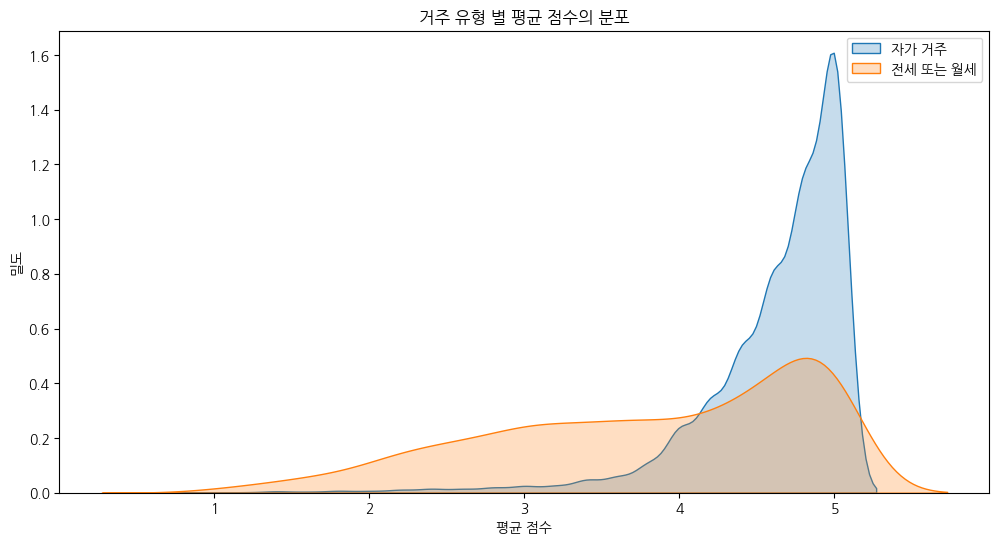

In [17]:
# 자가 거주에 해당하는 데이터 추출
self_residence_data = CDF[CDF['residenceType'] == '자가 거주']['meanScore']

# 전세 또는 월세에 해당하는 데이터 추출
rent_residence_data = CDF[CDF['residenceType'] == '전세 또는 월세']['meanScore']

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 자가 거주 그래프
sns.distplot(self_residence_data, hist=False, kde=True, kde_kws={'shade': True}, label='자가 거주')

# 전세 또는 월세 그래프
sns.distplot(rent_residence_data, hist=False, kde=True, kde_kws={'shade': True}, label='전세 또는 월세')

# 그래프 제목과 레이블 추가
plt.title('거주 유형 별 평균 점수의 분포')
plt.xlabel('평균 점수')
plt.ylabel('밀도')
plt.legend()

# 그래프 출력
plt.show()

## 지도 시각화

### 지도 시각화용 데이터 전처리

In [18]:
url1 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/dong_code.csv'
dong_code = pd.read_csv(url1, encoding = 'cp949')
dong_code = dong_code[dong_code['존재여부'] == '존재']
dong_code = dong_code[dong_code['코드명'].astype(str).str.startswith('11')]
dong_code = dong_code[~dong_code['코드명'].astype(str).str.endswith('00000')]
dong_code

,코드명,소재지,존재여부
19,1121510100,서울특별시 광진구 중곡동,존재
20,1121510200,서울특별시 광진구 능동,존재
21,1121510300,서울특별시 광진구 구의동,존재
22,1121510400,서울특별시 광진구 광장동,존재
23,1121510500,서울특별시 광진구 자양동,존재
...,...,...,...
2031,1171010300,서울특별시 송파구 풍납동,존재
2032,1171010400,서울특별시 송파구 송파동,존재
2033,1171010500,서울특별시 송파구 석촌동,존재
2034,1171010600,서울특별시 송파구 삼전동,존재


In [19]:
# '소재지' 칼럼만 남기기
dong_code = dong_code[['소재지']]

# '서울특별시'로 시작하는 문자열 제외하기
dong_code['소재지'] = dong_code['소재지'].apply(lambda x: x.replace('서울특별시 ', '') if x.startswith('서울특별시') else x)

# '소재지' 칼럼을 'Area'로 변경
dong_code.rename(columns={'소재지': 'Area'}, inplace=True)

# 'Gu'와 'Dong' 칼럼 생성
dong_code[['Gu', 'Dong']] = dong_code['Area'].str.split(' ', n=1, expand=True)

# 인덱스 정렬
dong_code.reset_index(drop=True, inplace=True)

# 결과 확인
dong_code

,Area,Gu,Dong
0,광진구 중곡동,광진구,중곡동
1,광진구 능동,광진구,능동
2,광진구 구의동,광진구,구의동
3,광진구 광장동,광진구,광장동
4,광진구 자양동,광진구,자양동
...,...,...,...
462,송파구 풍납동,송파구,풍납동
463,송파구 송파동,송파구,송파동
464,송파구 석촌동,송파구,석촌동
465,송파구 삼전동,송파구,삼전동


In [20]:
MD = CDF[['Area']]

# 중복된 데이터를 제거하고, 각 데이터의 개수를 세서 Count 칼럼에 저장
MD['Count'] = MD.groupby('Area')['Area'].transform('count')

# 중복 제거 후 결과 확인
MD = MD.drop_duplicates().reset_index(drop=True)

MD

,Area,Count
0,광진구 중곡동,3
1,광진구 구의동,34
2,광진구 광장동,35
3,광진구 자양동,84
4,광진구 화양동,8
...,...,...
266,송파구 풍납동,34
267,송파구 송파동,25
268,송파구 석촌동,9
269,송파구 삼전동,5


In [21]:
print("전체 Count 값의 합:", MD['Count'].sum())

전체 Count 값의 합: 6784


In [22]:
# MD와 dong_code 데이터프레임을 'Area' 칼럼을 기준으로 병합하고 Count 값을 추가
MDF = pd.merge(dong_code, MD, on='Area', how='left')

# 병합 후 Count 값이 없는 경우 0으로 채우기
MDF['Count'].fillna(0, inplace=True)
MDF['Count'] = MDF['Count'].astype(int)

# 결과 확인
MDF

,Area,Gu,Dong,Count
0,광진구 중곡동,광진구,중곡동,3
1,광진구 능동,광진구,능동,0
2,광진구 구의동,광진구,구의동,34
3,광진구 광장동,광진구,광장동,35
4,광진구 자양동,광진구,자양동,84
...,...,...,...,...
462,송파구 풍납동,송파구,풍납동,34
463,송파구 송파동,송파구,송파동,25
464,송파구 석촌동,송파구,석촌동,9
465,송파구 삼전동,송파구,삼전동,5


In [23]:
print("전체 Count 값의 합:", MDF['Count'].sum())

전체 Count 값의 합: 6784


In [24]:
MDF.to_csv('MDF.csv', index=False)

### 동별 분포 시각화

In [25]:
from IPython.display import HTML

tableau_dong = """
<div class='tableauPlaceholder' id='viz1713935126789' style='position: relative'><noscript><a href='#'><img alt='동별 리뷰 개수 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;_1&#47;_17139347063300&#47;1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='_17139347063300&#47;1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;_1&#47;_17139347063300&#47;1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='ko-KR' /></object></div> <script type='text/javascript'> var divElement = document.getElementById('viz1713935126789'); var vizElement = divElement.getElementsByTagName('object')[0]; vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px'; var scriptElement = document.createElement('script'); scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js'; vizElement.parentNode.insertBefore(scriptElement, vizElement); </script>
"""

# https://public.tableau.com/app/profile/.14307757/viz/_17139347063300/1

HTML(tableau_dong)

### 구별 분포 시각화

In [26]:
from IPython.display import HTML

tableau_gu = """
<div class='tableauPlaceholder' id='viz1713935043287' style='position: relative'><noscript><a href='#'><img alt='구별 리뷰 개수 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;X5&#47;X56KTB28T&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;X56KTB28T' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;X5&#47;X56KTB28T&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='ko-KR' /></object></div> <script type='text/javascript'> var divElement = document.getElementById('viz1713935043287'); var vizElement = divElement.getElementsByTagName('object')[0]; vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px'; var scriptElement = document.createElement('script'); scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js'; vizElement.parentNode.insertBefore(scriptElement, vizElement); </script>
"""

# https://public.tableau.com/app/profile/.14307757/viz/_17139345232130/1

HTML(tableau_gu)

# IV. 데이터 전처리

In [27]:
CDF.drop(columns=['danji_id', 'danji_name', 'age', 'sex', 'residenceType', 'married', 'residenceTime', 'regDate', 'meanScore'], inplace=True)

In [28]:
CDF

,totalScore,totalDesc,trafficScore,trafficDesc,aroundScore,aroundDesc,careScore,careDesc,residentScore,residentDesc,Area
1,5,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 ...,5,바로앞에 노원 강남등 여러노선의 버스가있고 걸어서7-10분거리에 지하철역있어서 교통...,5,바로앞 중랑천이있어서 아기랑 강아지 산책하기 좋고 시장 마트 편의점등 편의시설많아 ...,5,관리비도 저렴하고 분리수거날도 따로 정해져잇어서 관리가잘되고 택배도 경비아저씨가 ...,5,해도잘들어오고 오래된 아파트인데도 겨울에도 난방많이안해도 따뜻해요 여름에도 고층은 ...,광진구 중곡동
12,5,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 ...,5,"넉넉15분 지하철 바로앞 강남,건대 버스자주오고 자동차로는 동부간선, 영동대교등...",4,"걸어서 어린이집,진로마트,면곡시장등있고 다리건너면 구바우하우스, 마트,상가,식당,학...",5,"2분의 경비아저씨가 청소,관리등 어린이놀이터나 주차장 음식물 ,재활용쓰레기장등 관리...",5,"용마산 ,뚝방길이 있어서 자연환경좋고 양쪽 넓은베란다 2개씩있어요 서쪽베란다라해도 ...",광진구 중곡동
30,4,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이...",5,강남역 직통 146번이 4~5분 간격으로 운행되고 있으며 4번 마을버스를 1분 거리...,4,코엑스 및 광화문 까지의 거리가 10킬로 이내이며 5분거리에 홈플러스가 위치하고 5...,5,55세대 소수 정예주민들이 잘 운영하는 입주자 대표회의의 노력으로 안전하고 깨끗하며...,5,대부분의 세대가 평수 대비 실면적이 잘 나오는 구조로 만족도가 높습니다. 각각 2대...,광진구 중곡동
32,5,광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....,5,2호선 강변역이 도보 5분 거리에 있고 정문 앞 마을버스가 5분마다 있어 자양동쪽 ...,5,아파트 앞 뒤로 편의점 5개가 있다. 강변역 지하로 롯데마트. 마을버스로 1 0분...,5,30년 된 아파트지만 관리가 매우 잘되있다. 주차시설이 세대당 1대로 이중주차가 ...,5,남동. 남서향이라 일조량이 좋다. 저층을 제외하면 대부분 세대에서 한강조망이 가능하...,광진구 구의동
33,4,한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...,5,이 아파트의 최고는 멋진 한강뷰 경관이라 생각한다. 다음으로 좋은 점이 교통 편이성...,5,테크노마트와 롯데마트가 있어 장보기 좋다. 2시간 이내 배송이 되니 직접 갈 필요없...,5,청소 상태 만족. 경비실 관리실 친절하고 성실하셔서 항상 감사. 택배 잘 관리해 주...,5,남동향이라 따뜻하고 시원. 층마다 차이가 있겠지만 고층은 사실 더위 많이 안 타면 ...,광진구 구의동
...,...,...,...,...,...,...,...,...,...,...,...
50593,5,예상보다 잘지었다.기대했던것보다 더 만족한다.일년정도 파크밴드 산책하며 설레기도 했...,5,8호선지하철 역세권에 버스노선 충분해서 편리하지만 아직은 1.2단지쪽에서는 송파역까...,5,일단 가락시장 근거리라 동네수퍼가 무지물건이 싸고 싱싱하다. 석촌재래시장 쪽으로 ...,5,지상천국이다. 차량통제는물론 오토바이.퀵보드등 차단.흡연도 거의차단하고있어 사실가...,4,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가...,송파구 가락동
50594,5,단지간 거리가 도보로 10분여 소요되면 단지별 장단점이 우수하고 대규모 단지여서 본...,5,"송파역 3,4번 출구 초역세권 도시급 신축 아파트임. 지하철 연결 공사 진행중이고 ...",5,"1~2단지 탄천뷰, 3~5단지 롯데타워뷰, 2단지 가락시장 현대화 2단계 지상층 공...",5,공동현관 비번 관리 및 5개 생활권으로 나뉘어 관리사무소 운영중. 지상층 차량 미진...,5,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...,송파구 가락동
50595,5,경비시스템도 최첨단으로 관리되고 커뮤니티도 잘 준비되고 있고 백화점ㆍ쇼핑ㆍ마트 모든...,5,"8호선ㆍ9호선ㆍ3호선 이용이 쉽고 4,5단지쪽이 무척 편리하답니다 특히 역세권의 4...",4,잠실까지 거리가 매우 가까워 업무보기 편리하고 롯데백화점ㆍ마트ㆍ현대시티몰ㆍ이랜드몰ㆍ...,5,모두 최첨단시스템 및 주차장의 완전지하화로 관리가 잘 될수 밖에 없으며 아직은 거주...,5,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,송파구 가락동
50596,5,편의시설과 교통이 좋고 살기에 편리한 신축급 주상복합입니다 주변에 비해 가격도 합리...,5,개롱역 도보 2분 내외이고 개롱역에 버스정류장이 있습니다 잠실까지 버스로 10-30...,5,같은 건물 1층에 미용실 정육점 야채과일가게 반찬가게가 있으며 주변에 각종 병원 및...,5,경비아저씨 상주중이며 진넥스에서 유지보수 관리합니다 지하주차장은 깨끗하게 관리되고 ...,5,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...,송파구 가락동


In [29]:
CDF['Area'].unique()

array(['광진구 중곡동', '광진구 구의동', '광진구 광장동', '광진구 자양동', '광진구 화양동', '광진구 군자동',
       '동대문구 신설동', '동대문구 용두동', '동대문구 제기동', '동대문구 전농동', '동대문구 답십리동',
       '동대문구 장안동', '동대문구 청량리동', '동대문구 회기동', '동대문구 휘경동', '동대문구 이문동',
       '중랑구 면목동', '중랑구 상봉동', '중랑구 중화동', '중랑구 묵동', '중랑구 망우동', '중랑구 신내동',
       '성북구 성북동', '성북구 돈암동', '성북구 동소문동4가', '성북구 동소문동5가', '성북구 동소문동7가',
       '성북구 삼선동2가', '성북구 삼선동3가', '성북구 삼선동4가', '성북구 동선동4가', '성북구 안암동3가',
       '성북구 보문동4가', '성북구 보문동6가', '성북구 보문동3가', '성북구 정릉동', '성북구 길음동',
       '성북구 종암동', '성북구 하월곡동', '성북구 상월곡동', '성북구 장위동', '성북구 석관동', '강북구 미아동',
       '강북구 번동', '강북구 수유동', '강북구 우이동', '도봉구 쌍문동', '도봉구 방학동', '도봉구 창동',
       '도봉구 도봉동', '노원구 월계동', '노원구 공릉동', '노원구 하계동', '노원구 상계동', '노원구 중계동',
       '은평구 수색동', '은평구 녹번동', '은평구 불광동', '은평구 갈현동', '은평구 구산동', '은평구 대조동',
       '은평구 응암동', '은평구 역촌동', '은평구 신사동', '은평구 증산동', '은평구 진관동',
       '서대문구 충정로3가', '서대문구 합동', '서대문구 미근동', '서대문구 냉천동', '서대문구 천연동',
       '서대문구 영천동', '서대문구 현저동', '서대문구 북아현동', '서대문구 홍제동', '서대문구 대현동',
       '서대문구 연희동',

In [30]:
# Area 칼럼에서 세 단어 이상으로 구성된 내용 확인
long_areas = CDF[CDF['Area'].str.count(' ') >= 2]['Area']

# 결과 출력
print(long_areas)

Series([], Name: Area, dtype: object)


In [31]:
CDF['totalDesc'] += ' ' + CDF['Area']
CDF['trafficDesc'] += ' ' + CDF['Area']
CDF['aroundDesc'] += ' ' + CDF['Area']
CDF['careDesc'] += ' ' + CDF['Area']
CDF['residentDesc'] += ' ' + CDF['Area']

CDF

,totalScore,totalDesc,trafficScore,trafficDesc,aroundScore,aroundDesc,careScore,careDesc,residentScore,residentDesc,Area
1,5,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 ...,5,바로앞에 노원 강남등 여러노선의 버스가있고 걸어서7-10분거리에 지하철역있어서 교통...,5,바로앞 중랑천이있어서 아기랑 강아지 산책하기 좋고 시장 마트 편의점등 편의시설많아 ...,5,관리비도 저렴하고 분리수거날도 따로 정해져잇어서 관리가잘되고 택배도 경비아저씨가 ...,5,해도잘들어오고 오래된 아파트인데도 겨울에도 난방많이안해도 따뜻해요 여름에도 고층은 ...,광진구 중곡동
12,5,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 ...,5,"넉넉15분 지하철 바로앞 강남,건대 버스자주오고 자동차로는 동부간선, 영동대교등...",4,"걸어서 어린이집,진로마트,면곡시장등있고 다리건너면 구바우하우스, 마트,상가,식당,학...",5,"2분의 경비아저씨가 청소,관리등 어린이놀이터나 주차장 음식물 ,재활용쓰레기장등 관리...",5,"용마산 ,뚝방길이 있어서 자연환경좋고 양쪽 넓은베란다 2개씩있어요 서쪽베란다라해도 ...",광진구 중곡동
30,4,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이...",5,강남역 직통 146번이 4~5분 간격으로 운행되고 있으며 4번 마을버스를 1분 거리...,4,코엑스 및 광화문 까지의 거리가 10킬로 이내이며 5분거리에 홈플러스가 위치하고 5...,5,55세대 소수 정예주민들이 잘 운영하는 입주자 대표회의의 노력으로 안전하고 깨끗하며...,5,대부분의 세대가 평수 대비 실면적이 잘 나오는 구조로 만족도가 높습니다. 각각 2대...,광진구 중곡동
32,5,광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....,5,2호선 강변역이 도보 5분 거리에 있고 정문 앞 마을버스가 5분마다 있어 자양동쪽 ...,5,아파트 앞 뒤로 편의점 5개가 있다. 강변역 지하로 롯데마트. 마을버스로 1 0분...,5,30년 된 아파트지만 관리가 매우 잘되있다. 주차시설이 세대당 1대로 이중주차가 ...,5,남동. 남서향이라 일조량이 좋다. 저층을 제외하면 대부분 세대에서 한강조망이 가능하...,광진구 구의동
33,4,한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...,5,이 아파트의 최고는 멋진 한강뷰 경관이라 생각한다. 다음으로 좋은 점이 교통 편이성...,5,테크노마트와 롯데마트가 있어 장보기 좋다. 2시간 이내 배송이 되니 직접 갈 필요없...,5,청소 상태 만족. 경비실 관리실 친절하고 성실하셔서 항상 감사. 택배 잘 관리해 주...,5,남동향이라 따뜻하고 시원. 층마다 차이가 있겠지만 고층은 사실 더위 많이 안 타면 ...,광진구 구의동
...,...,...,...,...,...,...,...,...,...,...,...
50593,5,예상보다 잘지었다.기대했던것보다 더 만족한다.일년정도 파크밴드 산책하며 설레기도 했...,5,8호선지하철 역세권에 버스노선 충분해서 편리하지만 아직은 1.2단지쪽에서는 송파역까...,5,일단 가락시장 근거리라 동네수퍼가 무지물건이 싸고 싱싱하다. 석촌재래시장 쪽으로 ...,5,지상천국이다. 차량통제는물론 오토바이.퀵보드등 차단.흡연도 거의차단하고있어 사실가...,4,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가...,송파구 가락동
50594,5,단지간 거리가 도보로 10분여 소요되면 단지별 장단점이 우수하고 대규모 단지여서 본...,5,"송파역 3,4번 출구 초역세권 도시급 신축 아파트임. 지하철 연결 공사 진행중이고 ...",5,"1~2단지 탄천뷰, 3~5단지 롯데타워뷰, 2단지 가락시장 현대화 2단계 지상층 공...",5,공동현관 비번 관리 및 5개 생활권으로 나뉘어 관리사무소 운영중. 지상층 차량 미진...,5,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...,송파구 가락동
50595,5,경비시스템도 최첨단으로 관리되고 커뮤니티도 잘 준비되고 있고 백화점ㆍ쇼핑ㆍ마트 모든...,5,"8호선ㆍ9호선ㆍ3호선 이용이 쉽고 4,5단지쪽이 무척 편리하답니다 특히 역세권의 4...",4,잠실까지 거리가 매우 가까워 업무보기 편리하고 롯데백화점ㆍ마트ㆍ현대시티몰ㆍ이랜드몰ㆍ...,5,모두 최첨단시스템 및 주차장의 완전지하화로 관리가 잘 될수 밖에 없으며 아직은 거주...,5,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,송파구 가락동
50596,5,편의시설과 교통이 좋고 살기에 편리한 신축급 주상복합입니다 주변에 비해 가격도 합리...,5,개롱역 도보 2분 내외이고 개롱역에 버스정류장이 있습니다 잠실까지 버스로 10-30...,5,같은 건물 1층에 미용실 정육점 야채과일가게 반찬가게가 있으며 주변에 각종 병원 및...,5,경비아저씨 상주중이며 진넥스에서 유지보수 관리합니다 지하주차장은 깨끗하게 관리되고 ...,5,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...,송파구 가락동


In [32]:
CDF.drop(columns=['Area'], inplace=True)

CDF

,totalScore,totalDesc,trafficScore,trafficDesc,aroundScore,aroundDesc,careScore,careDesc,residentScore,residentDesc
1,5,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 ...,5,바로앞에 노원 강남등 여러노선의 버스가있고 걸어서7-10분거리에 지하철역있어서 교통...,5,바로앞 중랑천이있어서 아기랑 강아지 산책하기 좋고 시장 마트 편의점등 편의시설많아 ...,5,관리비도 저렴하고 분리수거날도 따로 정해져잇어서 관리가잘되고 택배도 경비아저씨가 ...,5,해도잘들어오고 오래된 아파트인데도 겨울에도 난방많이안해도 따뜻해요 여름에도 고층은 ...
12,5,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 ...,5,"넉넉15분 지하철 바로앞 강남,건대 버스자주오고 자동차로는 동부간선, 영동대교등...",4,"걸어서 어린이집,진로마트,면곡시장등있고 다리건너면 구바우하우스, 마트,상가,식당,학...",5,"2분의 경비아저씨가 청소,관리등 어린이놀이터나 주차장 음식물 ,재활용쓰레기장등 관리...",5,"용마산 ,뚝방길이 있어서 자연환경좋고 양쪽 넓은베란다 2개씩있어요 서쪽베란다라해도 ..."
30,4,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이...",5,강남역 직통 146번이 4~5분 간격으로 운행되고 있으며 4번 마을버스를 1분 거리...,4,코엑스 및 광화문 까지의 거리가 10킬로 이내이며 5분거리에 홈플러스가 위치하고 5...,5,55세대 소수 정예주민들이 잘 운영하는 입주자 대표회의의 노력으로 안전하고 깨끗하며...,5,대부분의 세대가 평수 대비 실면적이 잘 나오는 구조로 만족도가 높습니다. 각각 2대...
32,5,광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....,5,2호선 강변역이 도보 5분 거리에 있고 정문 앞 마을버스가 5분마다 있어 자양동쪽 ...,5,아파트 앞 뒤로 편의점 5개가 있다. 강변역 지하로 롯데마트. 마을버스로 1 0분...,5,30년 된 아파트지만 관리가 매우 잘되있다. 주차시설이 세대당 1대로 이중주차가 ...,5,남동. 남서향이라 일조량이 좋다. 저층을 제외하면 대부분 세대에서 한강조망이 가능하...
33,4,한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...,5,이 아파트의 최고는 멋진 한강뷰 경관이라 생각한다. 다음으로 좋은 점이 교통 편이성...,5,테크노마트와 롯데마트가 있어 장보기 좋다. 2시간 이내 배송이 되니 직접 갈 필요없...,5,청소 상태 만족. 경비실 관리실 친절하고 성실하셔서 항상 감사. 택배 잘 관리해 주...,5,남동향이라 따뜻하고 시원. 층마다 차이가 있겠지만 고층은 사실 더위 많이 안 타면 ...
...,...,...,...,...,...,...,...,...,...,...
50593,5,예상보다 잘지었다.기대했던것보다 더 만족한다.일년정도 파크밴드 산책하며 설레기도 했...,5,8호선지하철 역세권에 버스노선 충분해서 편리하지만 아직은 1.2단지쪽에서는 송파역까...,5,일단 가락시장 근거리라 동네수퍼가 무지물건이 싸고 싱싱하다. 석촌재래시장 쪽으로 ...,5,지상천국이다. 차량통제는물론 오토바이.퀵보드등 차단.흡연도 거의차단하고있어 사실가...,4,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가...
50594,5,단지간 거리가 도보로 10분여 소요되면 단지별 장단점이 우수하고 대규모 단지여서 본...,5,"송파역 3,4번 출구 초역세권 도시급 신축 아파트임. 지하철 연결 공사 진행중이고 ...",5,"1~2단지 탄천뷰, 3~5단지 롯데타워뷰, 2단지 가락시장 현대화 2단계 지상층 공...",5,공동현관 비번 관리 및 5개 생활권으로 나뉘어 관리사무소 운영중. 지상층 차량 미진...,5,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...
50595,5,경비시스템도 최첨단으로 관리되고 커뮤니티도 잘 준비되고 있고 백화점ㆍ쇼핑ㆍ마트 모든...,5,"8호선ㆍ9호선ㆍ3호선 이용이 쉽고 4,5단지쪽이 무척 편리하답니다 특히 역세권의 4...",4,잠실까지 거리가 매우 가까워 업무보기 편리하고 롯데백화점ㆍ마트ㆍ현대시티몰ㆍ이랜드몰ㆍ...,5,모두 최첨단시스템 및 주차장의 완전지하화로 관리가 잘 될수 밖에 없으며 아직은 거주...,5,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...
50596,5,편의시설과 교통이 좋고 살기에 편리한 신축급 주상복합입니다 주변에 비해 가격도 합리...,5,개롱역 도보 2분 내외이고 개롱역에 버스정류장이 있습니다 잠실까지 버스로 10-30...,5,같은 건물 1층에 미용실 정육점 야채과일가게 반찬가게가 있으며 주변에 각종 병원 및...,5,경비아저씨 상주중이며 진넥스에서 유지보수 관리합니다 지하주차장은 깨끗하게 관리되고 ...,5,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...


## 평점 기준 레이블링

In [33]:
columns_to_convert = ['totalScore', 'trafficScore', 'aroundScore', 'careScore', 'residentScore']

# 각 열의 값을 기준에 따라 변환
for column in columns_to_convert:
    CDF[column] = CDF[column].apply(lambda x: 1 if x >= 4 else 0 if x <= 3 else x)

CDF

,totalScore,totalDesc,trafficScore,trafficDesc,aroundScore,aroundDesc,careScore,careDesc,residentScore,residentDesc
1,1,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 ...,1,바로앞에 노원 강남등 여러노선의 버스가있고 걸어서7-10분거리에 지하철역있어서 교통...,1,바로앞 중랑천이있어서 아기랑 강아지 산책하기 좋고 시장 마트 편의점등 편의시설많아 ...,1,관리비도 저렴하고 분리수거날도 따로 정해져잇어서 관리가잘되고 택배도 경비아저씨가 ...,1,해도잘들어오고 오래된 아파트인데도 겨울에도 난방많이안해도 따뜻해요 여름에도 고층은 ...
12,1,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 ...,1,"넉넉15분 지하철 바로앞 강남,건대 버스자주오고 자동차로는 동부간선, 영동대교등...",1,"걸어서 어린이집,진로마트,면곡시장등있고 다리건너면 구바우하우스, 마트,상가,식당,학...",1,"2분의 경비아저씨가 청소,관리등 어린이놀이터나 주차장 음식물 ,재활용쓰레기장등 관리...",1,"용마산 ,뚝방길이 있어서 자연환경좋고 양쪽 넓은베란다 2개씩있어요 서쪽베란다라해도 ..."
30,1,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이...",1,강남역 직통 146번이 4~5분 간격으로 운행되고 있으며 4번 마을버스를 1분 거리...,1,코엑스 및 광화문 까지의 거리가 10킬로 이내이며 5분거리에 홈플러스가 위치하고 5...,1,55세대 소수 정예주민들이 잘 운영하는 입주자 대표회의의 노력으로 안전하고 깨끗하며...,1,대부분의 세대가 평수 대비 실면적이 잘 나오는 구조로 만족도가 높습니다. 각각 2대...
32,1,광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....,1,2호선 강변역이 도보 5분 거리에 있고 정문 앞 마을버스가 5분마다 있어 자양동쪽 ...,1,아파트 앞 뒤로 편의점 5개가 있다. 강변역 지하로 롯데마트. 마을버스로 1 0분...,1,30년 된 아파트지만 관리가 매우 잘되있다. 주차시설이 세대당 1대로 이중주차가 ...,1,남동. 남서향이라 일조량이 좋다. 저층을 제외하면 대부분 세대에서 한강조망이 가능하...
33,1,한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...,1,이 아파트의 최고는 멋진 한강뷰 경관이라 생각한다. 다음으로 좋은 점이 교통 편이성...,1,테크노마트와 롯데마트가 있어 장보기 좋다. 2시간 이내 배송이 되니 직접 갈 필요없...,1,청소 상태 만족. 경비실 관리실 친절하고 성실하셔서 항상 감사. 택배 잘 관리해 주...,1,남동향이라 따뜻하고 시원. 층마다 차이가 있겠지만 고층은 사실 더위 많이 안 타면 ...
...,...,...,...,...,...,...,...,...,...,...
50593,1,예상보다 잘지었다.기대했던것보다 더 만족한다.일년정도 파크밴드 산책하며 설레기도 했...,1,8호선지하철 역세권에 버스노선 충분해서 편리하지만 아직은 1.2단지쪽에서는 송파역까...,1,일단 가락시장 근거리라 동네수퍼가 무지물건이 싸고 싱싱하다. 석촌재래시장 쪽으로 ...,1,지상천국이다. 차량통제는물론 오토바이.퀵보드등 차단.흡연도 거의차단하고있어 사실가...,1,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가...
50594,1,단지간 거리가 도보로 10분여 소요되면 단지별 장단점이 우수하고 대규모 단지여서 본...,1,"송파역 3,4번 출구 초역세권 도시급 신축 아파트임. 지하철 연결 공사 진행중이고 ...",1,"1~2단지 탄천뷰, 3~5단지 롯데타워뷰, 2단지 가락시장 현대화 2단계 지상층 공...",1,공동현관 비번 관리 및 5개 생활권으로 나뉘어 관리사무소 운영중. 지상층 차량 미진...,1,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...
50595,1,경비시스템도 최첨단으로 관리되고 커뮤니티도 잘 준비되고 있고 백화점ㆍ쇼핑ㆍ마트 모든...,1,"8호선ㆍ9호선ㆍ3호선 이용이 쉽고 4,5단지쪽이 무척 편리하답니다 특히 역세권의 4...",1,잠실까지 거리가 매우 가까워 업무보기 편리하고 롯데백화점ㆍ마트ㆍ현대시티몰ㆍ이랜드몰ㆍ...,1,모두 최첨단시스템 및 주차장의 완전지하화로 관리가 잘 될수 밖에 없으며 아직은 거주...,1,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...
50596,1,편의시설과 교통이 좋고 살기에 편리한 신축급 주상복합입니다 주변에 비해 가격도 합리...,1,개롱역 도보 2분 내외이고 개롱역에 버스정류장이 있습니다 잠실까지 버스로 10-30...,1,같은 건물 1층에 미용실 정육점 야채과일가게 반찬가게가 있으며 주변에 각종 병원 및...,1,경비아저씨 상주중이며 진넥스에서 유지보수 관리합니다 지하주차장은 깨끗하게 관리되고 ...,1,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...


In [34]:
# totalScore, totalDesc 데이터 프레임 생성
total_df = CDF[['totalScore', 'totalDesc']]

# trafficScore, trafficDesc 데이터 프레임 생성
traffic_df = CDF[['trafficScore', 'trafficDesc']]

# aroundScore, aroundDesc 데이터 프레임 생성
around_df = CDF[['aroundScore', 'aroundDesc']]

# careScore, careDesc 데이터 프레임 생성
care_df = CDF[['careScore', 'careDesc']]

# residentScore, residentDesc 데이터 프레임 생성
resident_df = CDF[['residentScore', 'residentDesc']]

# 데이터프레임을 세로로 합치기
combined_df = pd.concat([total_df, traffic_df, around_df, care_df, resident_df], axis=0)

# 인덱스 초기화
combined_df.reset_index(drop=True, inplace=True)

In [35]:
# Score 칼럼 생성
combined_df['Label'] = pd.concat([
    total_df['totalScore'],
    traffic_df['trafficScore'],
    around_df['aroundScore'],
    care_df['careScore'],
    resident_df['residentScore']
], axis=0, ignore_index=True)

# Desc 칼럼 생성
combined_df['Desc'] = pd.concat([
    total_df['totalDesc'],
    traffic_df['trafficDesc'],
    around_df['aroundDesc'],
    care_df['careDesc'],
    resident_df['residentDesc']
], axis=0, ignore_index=True)

# 불필요한 칼럼 제거
combined_df.drop(columns=['totalScore', 'totalDesc', 'trafficScore', 'trafficDesc', 'aroundScore', 'aroundDesc', 'careScore', 'careDesc', 'residentScore', 'residentDesc'], inplace=True)

# 결과 확인
combined_df.head()

,Label,Desc
0,1,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 ...
1,1,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 ...
2,1,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이..."
3,1,광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....
4,1,한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...


In [36]:
# Desc 칼럼에서 Area 내용 추출하여 Area 칼럼에 추가
combined_df['Area'] = combined_df['Desc'].apply(lambda x: ' '.join(x.split()[-2:]))

# Desc 칼럼에서 Area 내용 제거
combined_df['Desc'] = combined_df['Desc'].apply(lambda x: ' '.join(x.split()[:-2]))

# 결과 확인
combined_df

,Label,Desc,Area
0,1,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 바...,광진구 중곡동
1,1,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 아...,광진구 중곡동
2,1,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이 ...",광진구 중곡동
3,1,광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....,광진구 구의동
4,1,한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...,광진구 구의동
...,...,...,...
33915,1,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가 ...,송파구 가락동
33916,1,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...,송파구 가락동
33917,1,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,송파구 가락동
33918,1,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...,송파구 가락동


In [37]:
# 숫자가 포함된 행 찾기
rows_with_numbers = combined_df[combined_df['Area'].str.contains('\d')]

# 결과 출력
print(rows_with_numbers)

       Label                                               Desc        Area
781        1  종로 업무지역에서 제일 가까운 주거지역의 아파트. 출퇴근 시간이 짧으면 삶의 퀄리티...  성북구 동소문동4가
782        1  대로변 근처에 있는 아파트치고 넘 저평가된 아파트 입니다. 지하철, 버스노선, 학군...  성북구 동소문동4가
783        1  성북구에 이만한 낮은 언덕이면서, 전철하고 걸어서 10분이내인 아파트는 드문것같아요...  성북구 동소문동4가
784        1  주변 인프라 및 평지 등 고려했을때 저평가된 아파트가 확실합니다. 앞으로 많은 호재...  성북구 동소문동4가
785        1  서울에 이가격에 입지 괜찮으 가성비 좋은 내집마련이라니 만족하며 삽니다. 교통도 상...  성북구 동소문동4가
...      ...                                                ...         ...
32530      1  년식이 있어 베란다가 추워요 개변난방이라 조절가능하고요 여름엔 아주시원합니다 리모델...  영등포구 양평동6가
32531      1  정남향이라 좋고, 더블물세권(한강, 안양천)으로 통풍이 매우 잘 됩니다 ㅎㅎ 여름에...  영등포구 양평동6가
32532      1  개별난방이고 햇빛잘들어옴. 개인적으로 층간소음 없고 조선족이나 임대가 없어 민도가 ...  영등포구 양평동6가
32533      1  고층은 좌측으로 안양천이 보이고, 우측으로 한강이 보이는 더블뷰입니다. 아파트 단지...  영등포구 양평동6가
32534      1  층간소음은 크게 느낀적 없고, 어린이놀이터 있어 아이들 키우기좋고, 단지내 국공립 ...  영등포구 양평동6가

[1880 rows x 3 columns]


In [38]:
# '구의동'이 포함된 행 찾기
rows_with_guui_dong = combined_df[combined_df['Area'].str.contains('구의동')]

# 결과 출력
print(rows_with_guui_dong)

       Label                                               Desc     Area
3          1  광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....  광진구 구의동
4          1  한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...  광진구 구의동
5          1  나중에 이 자리는 최소 40층이상 주상복합시설 들어설 빼박 자리임 토지 자체가 레알...  광진구 구의동
6          0  주간에 거주하는 가족이 없다면 살만함 앞서 말한대로 공사소음, 층간소음, 담배연기 ...  광진구 구의동
7          1  가격따라 가는거죠. 직장이 여의도가 아니고 예산이랑 가격이 맞으면 좋습니다. 가격은...  광진구 구의동
...      ...                                                ...      ...
27168      1  초중고를 비롯하여 대학교까지 가까워서 아이 키우기 좋습니다. 대부분 세대가 정남향이...  광진구 구의동
27169      1  새아파트라 단열이 잘되어 있어서인지 겨울철 난방 적게해도 따뜻합니다. 인접한 높은 ...  광진구 구의동
27170      1  남향. 동향. 남서향. 북동향은 호마다 조망권은 다르지만 세대내 시스클라인(공기청정...  광진구 구의동
27171      1  소음 없고 조용하게 거주하기 좋음. 아이들 많이 사는데도 시끄럽지 않음. 시스템 에...  광진구 구의동
27172      1  아파트 이름처럼 프라이빗하게 외부와 단절된 느낌이 들 정도로 고요함. 비오는날 문 ...  광진구 구의동

[170 rows x 3 columns]


In [39]:
CDT = combined_df.copy()

CDT

,Label,Desc,Area
0,1,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 바...,광진구 중곡동
1,1,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 아...,광진구 중곡동
2,1,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이 ...",광진구 중곡동
3,1,광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....,광진구 구의동
4,1,한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...,광진구 구의동
...,...,...,...
33915,1,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가 ...,송파구 가락동
33916,1,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...,송파구 가락동
33917,1,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,송파구 가락동
33918,1,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...,송파구 가락동


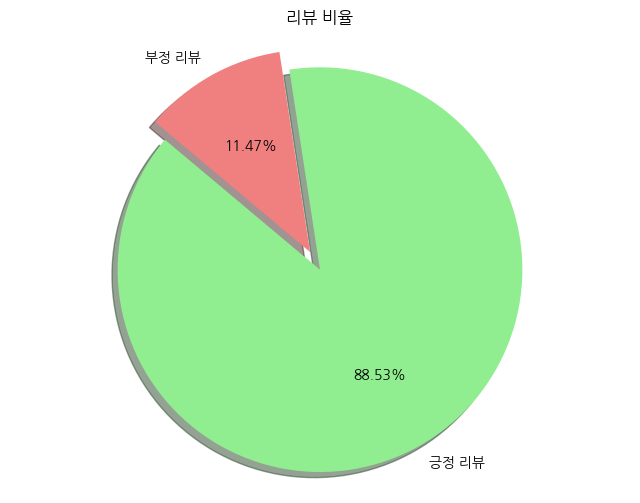

In [40]:
# 데이터
pos_review = len(CDT[CDT['Label'] == 1])/len(CDT['Label'])
nag_review = len(CDT[CDT['Label'] == 0])/len(CDT['Label'])

labels = ['긍정 리뷰', '부정 리뷰']
sizes = [pos_review, nag_review]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # 강조할 부분 설정, 첫 번째 부분만 약간 돌출

# 원 그래프 생성
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')  # 원의 모양 유지

# 그래프 제목
plt.title('리뷰 비율')

# 그래프 보이기
plt.show()

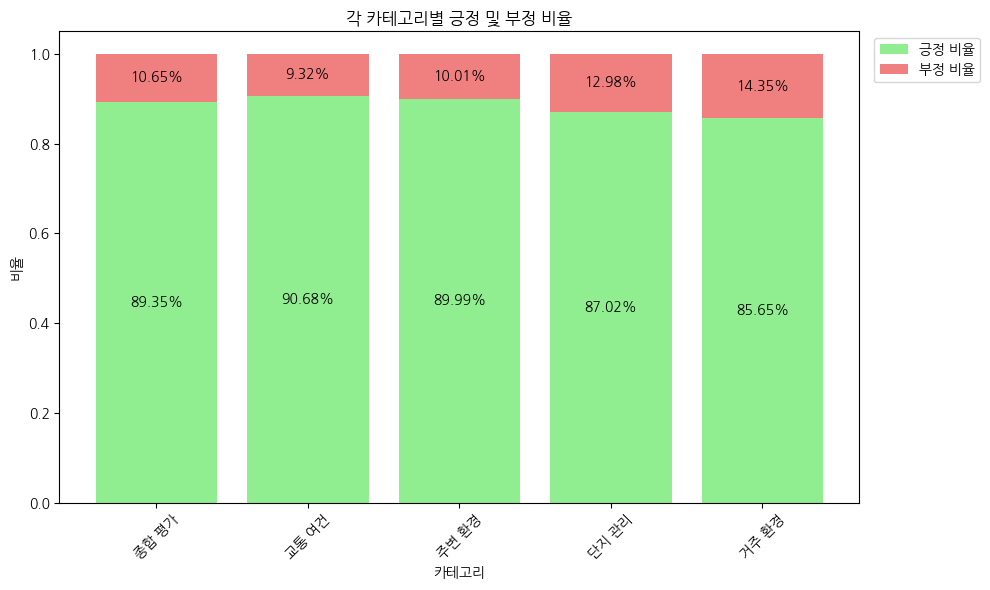

In [41]:
# 데이터
total = CDT['Label'][0:6782]
traffic = CDT['Label'][6782:13564]
around = CDT['Label'][13564:20346]
care = CDT['Label'][20346:27128]
resident = CDT['Label'][27128:33910]

pos_total = len(total[total == 1])/len(total)
nag_total = len(total[total == 0])/len(total)

pos_traffic = len(traffic[traffic == 1])/len(traffic)
nag_traffic = len(traffic[traffic == 0])/len(traffic)

pos_around = len(around[around == 1])/len(around)
nag_around = len(around[around == 0])/len(around)

pos_care = len(care[care == 1])/len(care)
nag_care = len(care[care == 0])/len(care)

pos_resident = len(resident[resident == 1])/len(resident)
nag_resident = len(resident[resident == 0])/len(resident)

categories = ['종합 평가', '교통 여건', '주변 환경', '단지 관리', '거주 환경']
pos_ratios = [pos_total, pos_traffic, pos_around, pos_care, pos_resident]
nag_ratios = [nag_total, nag_traffic, nag_around, nag_care, nag_resident]

# 그래프 생성
plt.figure(figsize=(10, 6))

# 긍정 비율 막대 그래프
bars1 = plt.bar(categories, pos_ratios, color='lightgreen', label='긍정 비율')
# 부정 비율 막대 그래프
bars2 = plt.bar(categories, nag_ratios, color='lightcoral', label='부정 비율', bottom=pos_ratios)

# 각 막대 중앙에 긍정 및 부정 비율 추가
for bar1, bar2 in zip(bars1, bars2):
    pos_height = bar1.get_height()
    nag_height = bar2.get_height()
    total_height = pos_height + nag_height
    plt.text(bar1.get_x() + bar1.get_width() / 2, pos_height / 2, f'{pos_height:.2%}', ha='center', va='center')
    plt.text(bar2.get_x() + bar2.get_width() / 2, pos_height + nag_height / 2, f'{nag_height:.2%}', ha='center', va='center')

# 그래프 제목과 레이블
plt.title('각 카테고리별 긍정 및 부정 비율')
plt.xlabel('카테고리')
plt.ylabel('비율')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

# 그래프 보이기
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

리뷰 최대 길이 : 658
리뷰 평균 길이 : 105.7691037735849


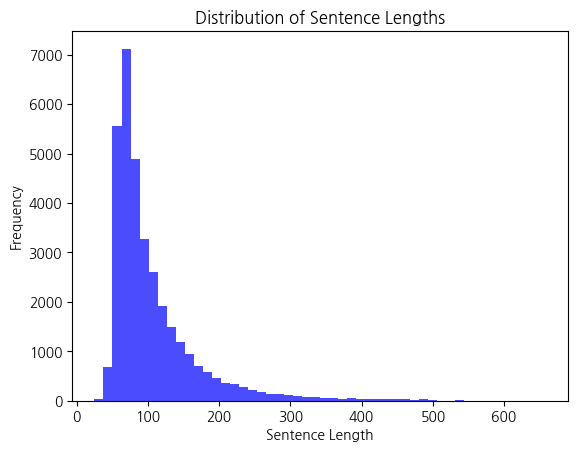

In [42]:
# Desc 열의 각 텍스트의 길이 측정
desc_lengths = [len(text) for text in CDT['Desc']]

print('리뷰 최대 길이 :', max(desc_lengths))
print('리뷰 평균 길이 :', sum(desc_lengths) / len(CDT['Desc']))

# 히스토그램으로 시각화
plt.hist(desc_lengths, bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

# V. 텍스트 전처리

## 정제

In [43]:
CDT

,Label,Desc,Area
0,1,아파트가낡긴햇지만 저는 너무 만족합니다! 교통도 안갈아탈정도의 노선이많아 편하고 바...,광진구 중곡동
1,1,살기에는 좋은나 단지수가 적다는거 그대신 집값도 옆동네보다는 저렴해서 가성비좋은 아...,광진구 중곡동
2,1,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이 ...",광진구 중곡동
3,1,광장동. 2단지에 비해 중.고등학교 학군 아쉬운 부분은 가격에 반영되 있는것 같다....,광진구 구의동
4,1,한강 뷰에 끌려 이사오게 되었는데 살아보니 교통 쇼핑 편의시설 한강산책 등 불편함이...,광진구 구의동
...,...,...,...
33915,1,파크밴드 주변은 탁트인 조망이나 가운데 낀동은 아무래도 조망이 살짝아쉽다. 층고가 ...,송파구 가락동
33916,1,지역난방 및 대단지 세대로 관리비와 난방비가 절감될수있으며 중앙 파크밴드 조성으로 ...,송파구 가락동
33917,1,아직 전부다 입주하지 않아 층간 소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,송파구 가락동
33918,1,4베이라 햇볕이 모든 방에 잘 들고 단열 방음이 잘되어있습니다 모두 확장형이라 실평...,송파구 가락동


In [44]:
import re

def clean_text(text):
    # 띄어쓰기 제거
    text = re.sub(r'\s+', '', text)
    # HTML 태그 제거
    text = re.sub(r'<[^>]+>', '', text)
    # 한글 자음과 모음 제거
    text = re.sub(r'[ㄱ-ㅎㅏ-ㅣ]+', '', text)
    # 시작과 끝의 공백 제거
    text = text.strip()
    return text

# 'Desc' 칼럼에 적용
CDT['Desc'] = CDT['Desc'].apply(clean_text)

# 결과 확인
CDT

,Label,Desc,Area
0,1,아파트가낡긴햇지만저는너무만족합니다!교통도안갈아탈정도의노선이많아편하고바로앞중랑천시장조...,광진구 중곡동
1,1,살기에는좋은나단지수가적다는거그대신집값도옆동네보다는저렴해서가성비좋은아파트예요,광진구 중곡동
2,1,"중랑천변가족공원산책로와가성비높은아파트로서관리비,실면적,주차공간등이좋고다양한교통편과도...",광진구 중곡동
3,1,광장동.2단지에비해중.고등학교학군아쉬운부분은가격에반영되있는것같다.교통.생활편리함및주...,광진구 구의동
4,1,한강뷰에끌려이사오게되었는데살아보니교통쇼핑편의시설한강산책등불편함이없어계속살게된다.늦게...,광진구 구의동
...,...,...,...
33915,1,파크밴드주변은탁트인조망이나가운데낀동은아무래도조망이살짝아쉽다.층고가다양해롯데월드타워가...,송파구 가락동
33916,1,지역난방및대단지세대로관리비와난방비가절감될수있으며중앙파크밴드조성으로단지내산책로및초중학...,송파구 가락동
33917,1,아직전부다입주하지않아층간소음은정확히알수없으나파크밴드쪽이라동간거리가멀어서일조량은굿!!...,송파구 가락동
33918,1,4베이라햇볕이모든방에잘들고단열방음이잘되어있습니다모두확장형이라실평수가넓고지하에세대별창...,송파구 가락동


In [45]:
# CSV 파일로 저장
CDT.to_csv('CDT.csv', index=False)

### PyKospacing

In [46]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-etu60vje
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-etu60vje
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 103ff614a2edf6df87d289ccaf99822b9afa9a42
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.0 MB/s eta 0:00:00
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2270666 sha256=3e5302bf53978c5fe3250df11800cf89df95cc2556f0c2a9ae7cd67db8bf8fa3
  Stored in directory: /tmp/pip-ephem-wheel-cache-15gbhsgf/wheels/76/b3/33/dda14886ee76b8e53eb05580a14dfcf9145e9eb9d282c53f28
Successfully built pykospacing
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0

In [47]:
from pykospacing import Spacing

spacing = Spacing()

# 'Desc' 열의 각 텍스트에 대해 띄어쓰기 오류 수정
corrected_texts = CDT['Desc'].apply(spacing)

# 수정된 결과를 새로운 열에 저장
CDT['Desc_Corrected'] = corrected_texts

# 수정된 데이터프레임 출력
print(CDT.head())

   Label                                               Desc     Area  \
0      1  아파트가낡긴햇지만저는너무만족합니다!교통도안갈아탈정도의노선이많아편하고바로앞중랑천시장조...  광진구 중곡동   
1      1          살기에는좋은나단지수가적다는거그대신집값도옆동네보다는저렴해서가성비좋은아파트예요  광진구 중곡동   
2      1  중랑천변가족공원산책로와가성비높은아파트로서관리비,실면적,주차공간등이좋고다양한교통편과도...  광진구 중곡동   
3      1  광장동.2단지에비해중.고등학교학군아쉬운부분은가격에반영되있는것같다.교통.생활편리함및주...  광진구 구의동   
4      1  한강뷰에끌려이사오게되었는데살아보니교통쇼핑편의시설한강산책등불편함이없어계속살게된다.늦게...  광진구 구의동   

                                      Desc_Corrected  
0  아파트가 낡긴 햇지만 저는 너무 만족합니다! 교통도 안 갈아탈 정도의 노선이 많아 ...  
1  살기에는 좋은 나 단지수가 적다는 거 그 대신 집값도 옆 동네보다는 저렴해서 가성비...  
2  중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이 ...  
3  광장동.2단지에 비해 중.고 등학교 학군 아쉬운 부분은 가격에 반영되 있는 것 같다...  
4  한강뷰에 끌려 이사 오게 되었는데 살아보니 교통쇼핑 편의시설 한강 산책 등 불편함이...  


In [48]:
# CSV 파일로 저장
CDT.to_csv('CDT_spacing.csv', index=False, encoding='utf-8-sig')
print("Processed data with spacing has been saved to 'CDT_S'")

Processed data with spacing has been saved to 'CDT_S'


In [49]:
url5 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_spacing.csv'
CDT_S = pd.read_csv(url5)

CDT_S

,Score,Desc,Area,Desc_Corrected
0,1,아파트가낡긴햇지만저는너무만족합니다!교통도안갈아탈정도의노선이많아편하고바로앞중랑천시장조...,광진구 중곡동,아파트가 낡긴 햇지만 저는 너무 만족합니다! 교통도 안 갈아탈 정도의 노선이 많아 ...
1,1,살기에는좋은나단지수가적다는거그대신집값도옆동네보다는저렴해서가성비좋은아파트예요,광진구 중곡동,살기에는 좋은 나 단지수가 적다는 거 그 대신 집값도 옆 동네보다는 저렴해서 가성비...
2,1,"중랑천변가족공원산책로와가성비높은아파트로서관리비,실면적,주차공간등이좋고다양한교통편과도...",광진구 중곡동,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이 ..."
3,1,광장동.2단지에비해중.고등학교학군아쉬운부분은가격에반영되있는것같다.교통.생활편리함및주...,광진구 구의동,광장동.2단지에 비해 중.고 등학교 학군 아쉬운 부분은 가격에 반영되 있는 것 같다...
4,1,한강뷰에끌려이사오게되었는데살아보니교통쇼핑편의시설한강산책등불편함이없어계속살게된다.늦게...,광진구 구의동,한강뷰에 끌려 이사 오게 되었는데 살아보니 교통쇼핑 편의시설 한강 산책 등 불편함이...
...,...,...,...,...
33915,1,파크밴드주변은탁트인조망이나가운데낀동은아무래도조망이살짝아쉽다.층고가다양해롯데월드타워가...,송파구 가락동,파크밴드 주변은 탁 트인 조망이나 가운데 낀 동은 아무래도 조망이 살짝 아쉽다.층고...
33916,1,지역난방및대단지세대로관리비와난방비가절감될수있으며중앙파크밴드조성으로단지내산책로및초중학...,송파구 가락동,지역난방 및 대단지 세대로 관리비와 난방비가 절감될 수 있으며 중앙파크밴드 조성으로...
33917,1,아직전부다입주하지않아층간소음은정확히알수없으나파크밴드쪽이라동간거리가멀어서일조량은굿!!...,송파구 가락동,아직 전부 다 입주하지 않아 층간소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...
33918,1,4베이라햇볕이모든방에잘들고단열방음이잘되어있습니다모두확장형이라실평수가넓고지하에세대별창...,송파구 가락동,4베이라 햇볕이 모든 방에 잘 들고 단열방음이 잘 되어 있습니다 모두 확장형이라 실...


In [50]:
# 'Desc' 칼럼 삭제
CDT_S.drop(columns=['Desc'], inplace=True)

CDT_S

,Score,Area,Desc_Corrected
0,1,광진구 중곡동,아파트가 낡긴 햇지만 저는 너무 만족합니다! 교통도 안 갈아탈 정도의 노선이 많아 ...
1,1,광진구 중곡동,살기에는 좋은 나 단지수가 적다는 거 그 대신 집값도 옆 동네보다는 저렴해서 가성비...
2,1,광진구 중곡동,"중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비, 실면적, 주차공간 등이 ..."
3,1,광진구 구의동,광장동.2단지에 비해 중.고 등학교 학군 아쉬운 부분은 가격에 반영되 있는 것 같다...
4,1,광진구 구의동,한강뷰에 끌려 이사 오게 되었는데 살아보니 교통쇼핑 편의시설 한강 산책 등 불편함이...
...,...,...,...
33915,1,송파구 가락동,파크밴드 주변은 탁 트인 조망이나 가운데 낀 동은 아무래도 조망이 살짝 아쉽다.층고...
33916,1,송파구 가락동,지역난방 및 대단지 세대로 관리비와 난방비가 절감될 수 있으며 중앙파크밴드 조성으로...
33917,1,송파구 가락동,아직 전부 다 입주하지 않아 층간소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...
33918,1,송파구 가락동,4베이라 햇볕이 모든 방에 잘 들고 단열방음이 잘 되어 있습니다 모두 확장형이라 실...


### 정규 표현식

In [51]:
import re

def replace_text(text):
    # 특수문자를 띄어쓰기로 바꿈
    replaced_text = re.sub(r'[^\w\s]', ' ', text)
    # 소문자로 변환
    replaced_text = replaced_text.lower()
    return replaced_text

# CDT_S의 Desc_Corrected 칼럼에 대해 함수 적용
CDT_S['Desc_Corrected'] = CDT_S['Desc_Corrected'].apply(replace_text)

CDT_S

,Score,Area,Desc_Corrected
0,1,광진구 중곡동,아파트가 낡긴 햇지만 저는 너무 만족합니다 교통도 안 갈아탈 정도의 노선이 많아 ...
1,1,광진구 중곡동,살기에는 좋은 나 단지수가 적다는 거 그 대신 집값도 옆 동네보다는 저렴해서 가성비...
2,1,광진구 중곡동,중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비 실면적 주차공간 등이 ...
3,1,광진구 구의동,광장동 2단지에 비해 중 고 등학교 학군 아쉬운 부분은 가격에 반영되 있는 것 같다...
4,1,광진구 구의동,한강뷰에 끌려 이사 오게 되었는데 살아보니 교통쇼핑 편의시설 한강 산책 등 불편함이...
...,...,...,...
33915,1,송파구 가락동,파크밴드 주변은 탁 트인 조망이나 가운데 낀 동은 아무래도 조망이 살짝 아쉽다 층고...
33916,1,송파구 가락동,지역난방 및 대단지 세대로 관리비와 난방비가 절감될 수 있으며 중앙파크밴드 조성으로...
33917,1,송파구 가락동,아직 전부 다 입주하지 않아 층간소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...
33918,1,송파구 가락동,4베이라 햇볕이 모든 방에 잘 들고 단열방음이 잘 되어 있습니다 모두 확장형이라 실...


### ckonlpy

In [52]:
!pip install customized_konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.5/881.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 24.0 MB/s eta 0:00:00


In [53]:
from ckonlpy.tag import Twitter
from tqdm import tqdm

# Twitter 형태소 분석기 초기화
twitter = Twitter()

# 등록할 단어 리스트
words = ['소음','트레이더스','익스프레스','피트니스','가성비','관리비','역세권','후레쉬','호재',
         '리모델링','강추','숲세권','초중','중고','초중고','용적율','비전','gtx','연습장','북한산',
         '마트','냉난방비','롯데월드타워','조망권','조망','층고','동간간격','층간소음','병세권',
         '학세권','숲세권','산세권','재건축','전세','시험장','한강','여고','남고','일조량','서울',
         '주상복합','아이들','주부','소방서','경찰서','gs25','스벅','맥날','롯백','홈플','일조량',
         '공기','캠핑장','한의원','emart24','중고등학교','평생학습관','주민센터','익스프레스',
         '편의시설','편리시설','도보','공원','스타필드','롯데몰','더현대','사립초','이케아',
         '시끄','오마카세','활력','크린토피아','교보문고','예스24','공판장','빨래방','신한',
         '발망치','중학생','실거주','젊은부부','석계초','파크밴드','엔터식스','은행','주차부족',
         'srt','초품아','경사로','대로변','프렌차이즈','1호선','2호선','3호선','4호선','5호선',
         '6호선','7호선','8호선','9호선','조경','비추천','저평가','노부부','대지지분','노후화',
         '내부시설','롯데캐슬','노브랜드','용적률','북한산','투자가치','유해업소','월드컵경기장',
         '교육센터','한옥마을','하수구','학원가','복도식','양재천','63빌딩','핫플레이스','소가족','생활편의시설','자연']
pos_tags = ['Noun'] * len(words)  # 모두 명사로 등록한다고 가정

# 단어 등록
for word, pos_tag in zip(words, pos_tags):
    twitter.add_dictionary(word, pos_tag)

# 형태소 분석 함수 정의
def morpheme_analysis(text):
    # 분석할 모든 품사 포함
    pos_tags = None
    morphemes = []
    # 형태소 분석 수행
    for word, pos in twitter.pos(text):
        morphemes.append(word)
    return morphemes

# 형태소 분석 결과를 저장할 리스트 초기화
morpheme_results = []

# 형태소 분석 수행 및 결과 저장
for desc in tqdm(CDT_S['Desc_Corrected']):  # CDT_S['Desc_Corrected']는 데이터프레임의 열로 가정합니다.
    morphemes = morpheme_analysis(desc)
    morpheme_results.append(morphemes)

# 형태소 분석 결과를 새로운 열로 추가 (예를 들어, 'Morpheme_Analyzed' 열)
CDT_S['Morpheme_Analyzed'] = morpheme_results

CDT_S

100%|██████████| 33920/33920 [05:43<00:00, 98.73it/s]


,Score,Area,Desc_Corrected,Morpheme_Analyzed
0,1,광진구 중곡동,아파트가 낡긴 햇지만 저는 너무 만족합니다 교통도 안 갈아탈 정도의 노선이 많아 ...,"[아파트, 가, 낡긴, 햇, 지만, 저, 는, 너무, 만족, 합니다, 교통, 도, ..."
1,1,광진구 중곡동,살기에는 좋은 나 단지수가 적다는 거 그 대신 집값도 옆 동네보다는 저렴해서 가성비...,"[살기, 에는, 좋은, 나, 단지, 수가, 적다는, 거, 그, 대신, 집값, 도, ..."
2,1,광진구 중곡동,중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비 실면적 주차공간 등이 ...,"[중랑천, 변, 가족, 공원, 산책로, 와, 가성비, 높은, 아파트, 로서, 관리비..."
3,1,광진구 구의동,광장동 2단지에 비해 중 고 등학교 학군 아쉬운 부분은 가격에 반영되 있는 것 같다...,"[광장동, 2, 단지, 에, 비해, 중, 고, 등, 학교, 학군, 아쉬운, 부분, ..."
4,1,광진구 구의동,한강뷰에 끌려 이사 오게 되었는데 살아보니 교통쇼핑 편의시설 한강 산책 등 불편함이...,"[한강, 뷰, 에, 끌려, 이사, 오게, 되었는데, 살, 아보, 니, 교통, 쇼핑,..."
...,...,...,...,...
33915,1,송파구 가락동,파크밴드 주변은 탁 트인 조망이나 가운데 낀 동은 아무래도 조망이 살짝 아쉽다 층고...,"[파크밴드, 주변, 은, 탁, 트인, 조망, 이나, 가운데, 낀, 동, 은, 아무,..."
33916,1,송파구 가락동,지역난방 및 대단지 세대로 관리비와 난방비가 절감될 수 있으며 중앙파크밴드 조성으로...,"[지역, 난방, 및, 대, 단지, 세대, 로, 관리비, 와, 난, 방비, 가, 절감..."
33917,1,송파구 가락동,아직 전부 다 입주하지 않아 층간소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,"[아직, 전부, 다, 입, 주하, 지, 않아, 층간소음, 은, 정확, 히, 알, 수..."
33918,1,송파구 가락동,4베이라 햇볕이 모든 방에 잘 들고 단열방음이 잘 되어 있습니다 모두 확장형이라 실...,"[4, 베이라, 햇볕, 이, 모든, 방, 에, 잘, 들고, 단열, 방음, 이, 잘,..."


### 불용어 제거

In [54]:
import requests

url8 = "https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/stop_words.txt"

# URL에서 텍스트 파일 가져오기
response = requests.get(url8)
if response.status_code == 200:
    text = response.text
    # BOM 제거
    if text.startswith('\ufeff'):
        text = text[1:]
    stop_words = [word.strip() for word in text.split('\n')]
    print(stop_words)
else:
    print("파일을 가져오는 데 문제가 발생했습니다.")

['하고', '아파트', '라고', '곳', '핵', '금년', '이라', '하는', '듯', '있지', '보이다', '있을', '있도록', '있어', '있어서', '있으며', '있다고', '라서', '은', '는', '든', '입니다', '합니다', '죠', '했죠', '봐야겠죠', '에게도', '있으시면', '건', '있으니', '있어요', '이니까', '겠죠', '이랬어요', '있을지', '해서', '있고', '하기', '같아요', '이기도', '생각', '봄', '그랬다면서', '점', '로는', '되면', '겁니다', '꺼예요', '차죠', '쪽', '시', '정도', '이고', '에는', '이면', '감', '있구요', '되어', '로서', '이든', '보다도', '뭔가', '않다', '되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저다고', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기

In [55]:
# Morpheme_Analyzed 열에서 불용어 제거
def remove_stop_words(tokens):
    return [token for token in tokens if token.strip() not in stop_words]

# 따옴표와 쉼표 추가
def add_comma_and_quotes(tokens):
    formatted_tokens = [f"'{token}'," for token in tokens]
    return ' '.join(formatted_tokens)

# 전처리 함수 적용
CDT_S['Morpheme_Analyzed'] = CDT_S['Morpheme_Analyzed'].apply(remove_stop_words)\
                                .apply(lambda x: [word for word in x if len(word) > 1 and not word.isdigit()])\
                                .apply(add_comma_and_quotes)

# 리스트 형식으로 변환
CDT_S['Morpheme_Analyzed'] = '[' + CDT_S['Morpheme_Analyzed'] + ']'

CDT_S

,Score,Area,Desc_Corrected,Morpheme_Analyzed
0,1,광진구 중곡동,아파트가 낡긴 햇지만 저는 너무 만족합니다 교통도 안 갈아탈 정도의 노선이 많아 ...,"['낡긴', '너무', '만족', '교통', '갈아', '노선', '많아', '중랑..."
1,1,광진구 중곡동,살기에는 좋은 나 단지수가 적다는 거 그 대신 집값도 옆 동네보다는 저렴해서 가성비...,"['살기', '좋은', '수가', '적다는', '대신', '집값', '동네', '보..."
2,1,광진구 중곡동,중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비 실면적 주차공간 등이 ...,"['중랑천', '가족', '공원', '산책로', '가성비', '높은', '관리비',..."
3,1,광진구 구의동,광장동 2단지에 비해 중 고 등학교 학군 아쉬운 부분은 가격에 반영되 있는 것 같다...,"['광장동', '비해', '학교', '학군', '아쉬운', '부분', '가격', '..."
4,1,광진구 구의동,한강뷰에 끌려 이사 오게 되었는데 살아보니 교통쇼핑 편의시설 한강 산책 등 불편함이...,"['한강', '끌려', '이사', '오게', '되었는데', '아보', '교통', '..."
...,...,...,...,...
33915,1,송파구 가락동,파크밴드 주변은 탁 트인 조망이나 가운데 낀 동은 아무래도 조망이 살짝 아쉽다 층고...,"['파크밴드', '주변', '트인', '조망', '이나', '가운데', '아무', ..."
33916,1,송파구 가락동,지역난방 및 대단지 세대로 관리비와 난방비가 절감될 수 있으며 중앙파크밴드 조성으로...,"['지역', '난방', '세대', '관리비', '방비', '절감', '중앙', '파..."
33917,1,송파구 가락동,아직 전부 다 입주하지 않아 층간소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,"['아직', '주하', '않아', '층간소음', '정확', '없으나', '파크밴드'..."
33918,1,송파구 가락동,4베이라 햇볕이 모든 방에 잘 들고 단열방음이 잘 되어 있습니다 모두 확장형이라 실...,"['베이라', '햇볕', '모든', '들고', '단열', '방음', '있습니다', ..."


In [56]:
# CSV 파일로 저장
CDT_S.to_csv('CDT_twitter.csv', index=False, encoding = 'utf-8-sig')
print("Processed data with spacing has been saved to 'CDT_twitter.csv'")

Processed data with spacing has been saved to 'CDT_twitter.csv'


## 긍정/부정 비율 균일화

In [57]:
url6 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter.csv'
CDT_T = pd.read_csv(url6)

CDT_T

,Score,Area,Desc_Corrected,Morpheme_Analyzed
0,1,광진구 중곡동,아파트가 낡긴 햇지만 저는 너무 만족합니다 교통도 안 갈아탈 정도의 노선이 많아 ...,"['아파트', '가', '낡긴', '햇', '지만', '저', '는', '너무', ..."
1,1,광진구 중곡동,살기에는 좋은 나 단지수가 적다는 거 그 대신 집값도 옆 동네보다는 저렴해서 가성비...,"['살기', '에는', '좋은', '나', '단지', '수가', '적다는', '거'..."
2,1,광진구 중곡동,중랑천변 가족공원 산책로와 가성비 높은 아파트로서 관리비 실면적 주차공간 등이 ...,"['중랑천', '변', '가족', '공원', '산책로', '와', '가성비', '높..."
3,1,광진구 구의동,광장동 2단지에 비해 중 고 등학교 학군 아쉬운 부분은 가격에 반영되 있는 것 같다...,"['광장동', '2', '단지', '에', '비해', '중', '고', '등', '..."
4,1,광진구 구의동,한강뷰에 끌려 이사 오게 되었는데 살아보니 교통쇼핑 편의시설 한강 산책 등 불편함이...,"['한강', '뷰', '에', '끌려', '이사', '오게', '되었는데', '살'..."
...,...,...,...,...
33915,1,송파구 가락동,파크밴드 주변은 탁 트인 조망이나 가운데 낀 동은 아무래도 조망이 살짝 아쉽다 층고...,"['파크밴드', '주변', '은', '탁', '트인', '조망', '이나', '가운..."
33916,1,송파구 가락동,지역난방 및 대단지 세대로 관리비와 난방비가 절감될 수 있으며 중앙파크밴드 조성으로...,"['지역', '난방', '및', '대', '단지', '세대', '로', '관리비',..."
33917,1,송파구 가락동,아직 전부 다 입주하지 않아 층간소음은 정확히 알 수 없으나 파크밴드 쪽이라 동간 ...,"['아직', '전부', '다', '입', '주하', '지', '않아', '층간소음'..."
33918,1,송파구 가락동,4베이라 햇볕이 모든 방에 잘 들고 단열방음이 잘 되어 있습니다 모두 확장형이라 실...,"['4', '베이라', '햇볕', '이', '모든', '방', '에', '잘', '..."


In [58]:
# CDT_T 데이터셋에서 Score가 0인 데이터와 1인 데이터의 개수 파악하기
count_zero_score = CDT_T[CDT_T['Score'] == 0].shape[0]
count_one_score = CDT_T[CDT_T['Score'] == 1].shape[0]

print("CDT_T 데이터셋에서 Score가 0인 데이터의 개수는 {}개 입니다.".format(count_zero_score))
print("CDT_T 데이터셋에서 Score가 1인 데이터의 개수는 {}개 입니다.".format(count_one_score))

CDT_T 데이터셋에서 Score가 0인 데이터의 개수는 3890개 입니다.
CDT_T 데이터셋에서 Score가 1인 데이터의 개수는 30030개 입니다.


In [59]:
# Score가 1인 행과 Score가 0인 행을 나누기
score_1_rows = CDT_T[CDT_T['Score'] == 1]
score_0_rows = CDT_T[CDT_T['Score'] == 0]

# Score가 1인 행을 랜덤하게 샘플링하여 3890개 선택
sampled_score_1_rows = score_1_rows.sample(n=3890, random_state=42)

# Score가 1인 행과 Score가 0인 행을 합치기
CDT_T = pd.concat([score_0_rows, sampled_score_1_rows])

# 결과 확인
print("CDT_T 데이터셋의 크기:", CDT_T.shape)

CDT_T 데이터셋의 크기: (7780, 4)


In [60]:
CDT_T

,Score,Area,Desc_Corrected,Morpheme_Analyzed
6,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
13,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
24,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
37,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
39,0,광진구 광장동,광장동 학군 누리면서 가격이 주변 아파트 비해 경쟁력이 있어서 선택하게 되는 듯하다...,"['광장동', '학군', '누리', '면서', '가격', '이', '주변', '아파..."
...,...,...,...,...
30520,1,강서구 가양동,케바케겠지만 우리 집은 티비도 안보는 데 쥐죽은 듯 조용하다 동네에 사람이 없나 싶...,"['케바케', '겠', '지만', '우리', '집은', '티비', '도', '안보'..."
22300,1,노원구 중계동,택배는 경비실에서 잘 보관해주셔서 잃어버린 적은 없고 택배시킨 거깜박하서 안 찾아가...,"['택배', '는', '경비실', '에서', '잘', '보관', '해주', '셔',..."
27083,1,송파구 가락동,경비 분들이 너무 친절하시고 아파트 관리가 아주 클리어합니다 오래된 아파트라 큰 ...,"['경비', '분', '들', '이', '너무', '친절', '하시고', '아파트'..."
8207,1,도봉구 창동,창동역이 가깝고 창동역 방향으로 아파트 단지 내 버스정류장이 2개 라버스 타 고역으...,"['창동역', '이', '가깝고', '창동역', '방향', '으로', '아파트', ..."


In [61]:
CDT_T.reset_index(drop=True, inplace=True)

CDT_T

,Score,Area,Desc_Corrected,Morpheme_Analyzed
0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
1,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
2,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
3,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
4,0,광진구 광장동,광장동 학군 누리면서 가격이 주변 아파트 비해 경쟁력이 있어서 선택하게 되는 듯하다...,"['광장동', '학군', '누리', '면서', '가격', '이', '주변', '아파..."
...,...,...,...,...
7775,1,강서구 가양동,케바케겠지만 우리 집은 티비도 안보는 데 쥐죽은 듯 조용하다 동네에 사람이 없나 싶...,"['케바케', '겠', '지만', '우리', '집은', '티비', '도', '안보'..."
7776,1,노원구 중계동,택배는 경비실에서 잘 보관해주셔서 잃어버린 적은 없고 택배시킨 거깜박하서 안 찾아가...,"['택배', '는', '경비실', '에서', '잘', '보관', '해주', '셔',..."
7777,1,송파구 가락동,경비 분들이 너무 친절하시고 아파트 관리가 아주 클리어합니다 오래된 아파트라 큰 ...,"['경비', '분', '들', '이', '너무', '친절', '하시고', '아파트'..."
7778,1,도봉구 창동,창동역이 가깝고 창동역 방향으로 아파트 단지 내 버스정류장이 2개 라버스 타 고역으...,"['창동역', '이', '가깝고', '창동역', '방향', '으로', '아파트', ..."


In [62]:
# 중복 데이터 확인
duplicated_rows = CDT_T[CDT_T.duplicated(subset='Desc_Corrected', keep=False)]
print("중복된 데이터 개수:", len(duplicated_rows))
print(duplicated_rows)

중복된 데이터 개수: 10
      Score       Area                                     Desc_Corrected  \
100       0  성북구 보문동3가  자가 이용하면 서 울어 디든 가깝고 한남동  청담동 가까워서 신혼부부가 살면서 즐거...   
449       0  성동구 금호동1가  자가 이용하면 서 울어 디든 가깝고 한남동  청담동 가까워서 신혼부부가 살면서 즐거...   
719       0    송파구 가락동  면허나 자가용이 없는 사람은 교통이 딱히 편리하다고 느껴지진 않을 듯 하지만 아파트...   
720       0    송파구 가락동  면허나 자가용이 없는 사람은 교통이 딱히 편리하다고 느껴지진 않을 듯 하지만 아파트...   
1352      0    송파구 가락동  송파역이 아파트 단지 앞에 있지만 8호선이라 의미 없음  필요한 노선을 타려면 잠실...   
1353      0    송파구 가락동  송파역이 아파트 단지 앞에 있지만 8호선이라 의미 없음  필요한 노선을 타려면 잠실...   
3033      0  성북구 보문동3가  층간소음 너무너 무너무 심각함 옆집 말소리  윗집 소리 다 들림  후문 쪽 어르신들...   
3512      0  성동구 금호동1가  층간소음 너무너 무너무 심각함 옆집 말소리  윗집 소리 다 들림  후문 쪽 어르신들...   
3887      0    송파구 가락동  층간소음과 벽 간 소음이 매우 심함 여태 아파트만 살아봤는데 이렇게 층간소음이 심한...   
3888      0    송파구 가락동  층간소음과 벽 간 소음이 매우 심함 여태 아파트만 살아봤는데 이렇게 층간소음이 심한...   

                                      Morpheme_Analyzed  
100   ['자가', '이용', '하면', '서', '울어', '디', '든', '가깝고',...  
449   ['자가', '이용', '하

In [63]:
# index_to_drop에 해당하는 행 삭제
index_to_drop = [449, 720, 1353, 3512, 3888]
CDT_T.drop(index=index_to_drop, inplace=True)

In [64]:
# 중복 데이터 확인
duplicated_rows = CDT_T[CDT_T.duplicated(subset='Desc_Corrected', keep=False)]
print("중복된 데이터 개수:", len(duplicated_rows))
print(duplicated_rows)

중복된 데이터 개수: 0
Empty DataFrame
Columns: [Score, Area, Desc_Corrected, Morpheme_Analyzed]
Index: []


In [65]:
# CDT 데이터셋에서 Score가 0인 데이터와 1인 데이터의 개수 파악하기
count_zero_score = CDT_T[CDT_T['Score'] == 0].shape[0]
count_one_score = CDT_T[CDT_T['Score'] == 1].shape[0]

print("CDT_T 데이터셋에서 Score가 0인 데이터의 개수는 {}개 입니다.".format(count_zero_score))
print("CDT_T 데이터셋에서 Score가 1인 데이터의 개수는 {}개 입니다.".format(count_one_score))

CDT_T 데이터셋에서 Score가 0인 데이터의 개수는 3885개 입니다.
CDT_T 데이터셋에서 Score가 1인 데이터의 개수는 3890개 입니다.


In [66]:
import random

# 랜덤 시드 설정
random.seed(42)

# Score가 1인 행의 인덱스 가져오기
score_1_indices = CDT_T[CDT_T['Score'] == 1].index

# 랜덤하게 5개의 인덱스 선택
indices_to_remove = random.sample(score_1_indices.tolist(), 5)

# 선택된 인덱스에 해당하는 행 제거
CDT_T.drop(index=indices_to_remove, inplace=True)

In [67]:
print("제거된 행의 인덱스:", indices_to_remove)

제거된 행의 인덱스: [6509, 4346, 3992, 6927, 5016]


In [68]:
# CDT 데이터셋에서 Score가 0인 데이터와 1인 데이터의 개수 파악하기
count_zero_score = CDT_T[CDT_T['Score'] == 0].shape[0]
count_one_score = CDT_T[CDT_T['Score'] == 1].shape[0]

print("CDT_T 데이터셋에서 Score가 0인 데이터의 개수는 {}개 입니다.".format(count_zero_score))
print("CDT_T 데이터셋에서 Score가 1인 데이터의 개수는 {}개 입니다.".format(count_one_score))

CDT_T 데이터셋에서 Score가 0인 데이터의 개수는 3885개 입니다.
CDT_T 데이터셋에서 Score가 1인 데이터의 개수는 3885개 입니다.


In [69]:
CDT_T.isnull().sum()

Score                0
Area                 0
Desc_Corrected       0
Morpheme_Analyzed    0
dtype: int64

In [70]:
CDT_T.reset_index(drop=True, inplace=True)

CDT_T

,Score,Area,Desc_Corrected,Morpheme_Analyzed
0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
1,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
2,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
3,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
4,0,광진구 광장동,광장동 학군 누리면서 가격이 주변 아파트 비해 경쟁력이 있어서 선택하게 되는 듯하다...,"['광장동', '학군', '누리', '면서', '가격', '이', '주변', '아파..."
...,...,...,...,...
7765,1,강서구 가양동,케바케겠지만 우리 집은 티비도 안보는 데 쥐죽은 듯 조용하다 동네에 사람이 없나 싶...,"['케바케', '겠', '지만', '우리', '집은', '티비', '도', '안보'..."
7766,1,노원구 중계동,택배는 경비실에서 잘 보관해주셔서 잃어버린 적은 없고 택배시킨 거깜박하서 안 찾아가...,"['택배', '는', '경비실', '에서', '잘', '보관', '해주', '셔',..."
7767,1,송파구 가락동,경비 분들이 너무 친절하시고 아파트 관리가 아주 클리어합니다 오래된 아파트라 큰 ...,"['경비', '분', '들', '이', '너무', '친절', '하시고', '아파트'..."
7768,1,도봉구 창동,창동역이 가깝고 창동역 방향으로 아파트 단지 내 버스정류장이 2개 라버스 타 고역으...,"['창동역', '이', '가깝고', '창동역', '방향', '으로', '아파트', ..."


In [71]:
CDT_T.to_csv('CDT_twitter_fix.csv', index=False)

## GPT-3.5를 이용한 레이블링 데이터 추가

In [72]:
CDT_balanced = CDT_T.copy()

In [73]:
CDT_balanced.insert(1, 'Labeling', '')

CDT_balanced

,Score,Labeling,Area,Desc_Corrected,Morpheme_Analyzed
0,0,,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
1,0,,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
2,0,,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
3,0,,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
4,0,,광진구 광장동,광장동 학군 누리면서 가격이 주변 아파트 비해 경쟁력이 있어서 선택하게 되는 듯하다...,"['광장동', '학군', '누리', '면서', '가격', '이', '주변', '아파..."
...,...,...,...,...,...
7765,1,,강서구 가양동,케바케겠지만 우리 집은 티비도 안보는 데 쥐죽은 듯 조용하다 동네에 사람이 없나 싶...,"['케바케', '겠', '지만', '우리', '집은', '티비', '도', '안보'..."
7766,1,,노원구 중계동,택배는 경비실에서 잘 보관해주셔서 잃어버린 적은 없고 택배시킨 거깜박하서 안 찾아가...,"['택배', '는', '경비실', '에서', '잘', '보관', '해주', '셔',..."
7767,1,,송파구 가락동,경비 분들이 너무 친절하시고 아파트 관리가 아주 클리어합니다 오래된 아파트라 큰 ...,"['경비', '분', '들', '이', '너무', '친절', '하시고', '아파트'..."
7768,1,,도봉구 창동,창동역이 가깝고 창동역 방향으로 아파트 단지 내 버스정류장이 2개 라버스 타 고역으...,"['창동역', '이', '가깝고', '창동역', '방향', '으로', '아파트', ..."


In [74]:
add_content = "\n\n이 문장을 긍정리뷰인지 부정리뷰인지로만 분류해줘\n"
CDT_balanced['Desc_Corrected'] = CDT_balanced['Desc_Corrected'].apply(lambda x: x + add_content)

In [75]:
# CDT_balanced를 CSV 파일로 추출
CDT_balanced.to_csv('CDT_gpt.csv', index=False)

### 데이터 확인

In [76]:
url7 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt.csv'
CDT_G = pd.read_csv(url7)

CDT_G

,Score,Labeling,Area,Desc_Corrected,Morpheme_Analyzed
0,0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
1,0,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
2,0,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
3,0,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
4,0,1,광진구 광장동,광장동 학군 누리면서 가격이 주변 아파트 비해 경쟁력이 있어서 선택하게 되는 듯하다...,"['광장동', '학군', '누리', '면서', '가격', '이', '주변', '아파..."
...,...,...,...,...,...
7765,1,1,강서구 가양동,케바케겠지만 우리 집은 티비도 안보는 데 쥐죽은 듯 조용하다 동네에 사람이 없나 싶...,"['케바케', '겠', '지만', '우리', '집은', '티비', '도', '안보'..."
7766,1,1,노원구 중계동,택배는 경비실에서 잘 보관해주셔서 잃어버린 적은 없고 택배시킨 거깜박하서 안 찾아가...,"['택배', '는', '경비실', '에서', '잘', '보관', '해주', '셔',..."
7767,1,1,송파구 가락동,경비 분들이 너무 친절하시고 아파트 관리가 아주 클리어합니다 오래된 아파트라 큰 ...,"['경비', '분', '들', '이', '너무', '친절', '하시고', '아파트'..."
7768,1,1,도봉구 창동,창동역이 가깝고 창동역 방향으로 아파트 단지 내 버스정류장이 2개 라버스 타 고역으...,"['창동역', '이', '가깝고', '창동역', '방향', '으로', '아파트', ..."


In [77]:
# 'Desc_Corrected' 열에서 추가된 내용 제거
CDT_G['Desc_Corrected'] = CDT_G['Desc_Corrected'].str.replace(add_content, '')

CDT_G

,Score,Labeling,Area,Desc_Corrected,Morpheme_Analyzed
0,0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
1,0,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
2,0,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
3,0,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
4,0,1,광진구 광장동,광장동 학군 누리면서 가격이 주변 아파트 비해 경쟁력이 있어서 선택하게 되는 듯하다...,"['광장동', '학군', '누리', '면서', '가격', '이', '주변', '아파..."
...,...,...,...,...,...
7765,1,1,강서구 가양동,케바케겠지만 우리 집은 티비도 안보는 데 쥐죽은 듯 조용하다 동네에 사람이 없나 싶...,"['케바케', '겠', '지만', '우리', '집은', '티비', '도', '안보'..."
7766,1,1,노원구 중계동,택배는 경비실에서 잘 보관해주셔서 잃어버린 적은 없고 택배시킨 거깜박하서 안 찾아가...,"['택배', '는', '경비실', '에서', '잘', '보관', '해주', '셔',..."
7767,1,1,송파구 가락동,경비 분들이 너무 친절하시고 아파트 관리가 아주 클리어합니다 오래된 아파트라 큰 ...,"['경비', '분', '들', '이', '너무', '친절', '하시고', '아파트'..."
7768,1,1,도봉구 창동,창동역이 가깝고 창동역 방향으로 아파트 단지 내 버스정류장이 2개 라버스 타 고역으...,"['창동역', '이', '가깝고', '창동역', '방향', '으로', '아파트', ..."


In [78]:
# 일치하지 않는 행의 개수 초기화
mismatch_count = 0

# 각 인덱스에 대해 'Desc_Corrected' 칼럼 내용 비교
for index in range(len(CDT_G)):
    desc_corrected_cdt_t = CDT_T.loc[index, 'Desc_Corrected']
    desc_corrected_cdt_g = CDT_G.loc[index, 'Desc_Corrected']

    if desc_corrected_cdt_g != desc_corrected_cdt_t:
        mismatch_count += 1

# 결과 출력
print("일치하지 않는 행의 개수:", mismatch_count)

일치하지 않는 행의 개수: 0


In [79]:
# 중복 데이터 확인
duplicated_rows = CDT_G[CDT_G.duplicated(subset='Desc_Corrected', keep=False)]
print("중복된 데이터 개수:", len(duplicated_rows))
print(duplicated_rows)

중복된 데이터 개수: 0
Empty DataFrame
Columns: [Score, Labeling, Area, Desc_Corrected, Morpheme_Analyzed]
Index: []


In [80]:
# 결측치 개수 확인
missing_values = CDT_G.isnull().sum()

# 결과 출력
print("CDT_G의 결측치 개수:")
print(missing_values)

CDT_G의 결측치 개수:
Score                0
Labeling             0
Area                 0
Desc_Corrected       0
Morpheme_Analyzed    0
dtype: int64


### 긍정/부정 비율 균일화

In [81]:
# Score 칼럼과 Labeling 칼럼이 모두 0인 행 찾기
CDT_00 = CDT_G[(CDT_G['Score'] == 0) & (CDT_G['Labeling'] == 0)]

# 결과 출력
print("Score 칼럼과 Labeling 칼럼이 모두 0인 행 수:", len(CDT_00))
CDT_00

Score 칼럼과 Labeling 칼럼이 모두 0인 행 수: 2254


,Score,Labeling,Area,Desc_Corrected,Morpheme_Analyzed
0,0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
1,0,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
2,0,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
3,0,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
6,0,0,광진구 광장동,단지가 조용하고 교통도 편리하고 아차산과 한강 이용하고 하기엔 좋습니다 재건축이 ...,"['단지', '가', '조용', '하고', '교통', '도', '편리', '하고',..."
...,...,...,...,...,...
3880,0,0,송파구 가락동,이웃 잘못 만나면 층간소음의 공포에 시달림 마감이나 자재가 좋지 않아서 층간소음이...,"['이웃', '잘못', '만나면', '층간소음', '의', '공포', '에', '시..."
3881,0,0,송파구 가락동,좁은 평수라베란다 너무 너무 좁고 불편 타층에서 담배 피면 그대로 올라오고 자재...,"['좁은', '평', '수라', '베란다', '너무', '너무', '좁고', '불편..."
3882,0,0,송파구 가락동,아파트에서 계속 살아와서 어느 정도 소음은 불편하지 않은 편인데 층간소음 정말 ...,"['아파트', '에서', '계속', '살아와서', '어느', '정도', '소음', ..."
3883,0,0,송파구 가락동,층간소음과 벽 간 소음이 매우 심함 여태 아파트만 살아봤는데 이렇게 층간소음이 심한...,"['층간소음', '과', '벽', '간', '소음', '이', '매우', '심함',..."


In [82]:
# Score 칼럼과 Labeling 칼럼이 모두 1인 행 찾기
CDT_11 = CDT_G[(CDT_G['Score'] == 1) & (CDT_G['Labeling'] == 1)]

# 결과 출력
print("Score 칼럼과 Labeling 칼럼이 모두 1인 행 수:", len(CDT_11))
CDT_11

Score 칼럼과 Labeling 칼럼이 모두 1인 행 수: 3678


,Score,Labeling,Area,Desc_Corrected,Morpheme_Analyzed
3885,1,1,마포구 마포동,1층에 cu 편의점 전에 경비하시던 분이 오픈 입점하심 아침 일찍 오픈 저녁 11...,"['1', '층', '에', 'cu', '편의점', '전', '에', '경비', '..."
3886,1,1,도봉구 창동,고층부의 경우에는 전망이 탁 트여서 중랑천 북한산 도봉산 등 주변 환경한 눈에 ...,"['고층', '부의', '경우', '에는', '전망', '이', '탁', '트', ..."
3887,1,1,서대문구 홍제동,오래되었지만 전통 있는 홍제동 대표 아파트란 얘기를 들었는데 명성만큼이나 아파트...,"['오래', '되었', '지만', '전통', '있는', '홍제동', '대표', '아..."
3888,1,1,동작구 본동,역세권이며 재건축 리모델링으로 호재가 있을 전망이며 발 전 가능성이 무한한 위치...,"['역세권', '이며', '재건축', '리모델링', '으로', '호재', '가', ..."
3889,1,1,강남구 도곡동,매봉산에서 불어오는 바람으로 여름에는 시원하고 최근 난방배관공사 이후 난방이 더욱...,"['매봉산', '에서', '불어', '오는', '바람', '으로', '여름', '에..."
...,...,...,...,...,...
7765,1,1,강서구 가양동,케바케겠지만 우리 집은 티비도 안보는 데 쥐죽은 듯 조용하다 동네에 사람이 없나 싶...,"['케바케', '겠', '지만', '우리', '집은', '티비', '도', '안보'..."
7766,1,1,노원구 중계동,택배는 경비실에서 잘 보관해주셔서 잃어버린 적은 없고 택배시킨 거깜박하서 안 찾아가...,"['택배', '는', '경비실', '에서', '잘', '보관', '해주', '셔',..."
7767,1,1,송파구 가락동,경비 분들이 너무 친절하시고 아파트 관리가 아주 클리어합니다 오래된 아파트라 큰 ...,"['경비', '분', '들', '이', '너무', '친절', '하시고', '아파트'..."
7768,1,1,도봉구 창동,창동역이 가깝고 창동역 방향으로 아파트 단지 내 버스정류장이 2개 라버스 타 고역으...,"['창동역', '이', '가깝고', '창동역', '방향', '으로', '아파트', ..."


In [83]:
# CDT_11에서 2258개의 무작위 샘플 선택
CDT_11_sampled = CDT_11.sample(n=2254, random_state=42)

# CDT_00과 샘플된 CDT_11 합치기
CDT_G = pd.concat([CDT_00, CDT_11_sampled], ignore_index=True)

CDT_G

,Score,Labeling,Area,Desc_Corrected,Morpheme_Analyzed
0,0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
1,0,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
2,0,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
3,0,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
4,0,0,광진구 광장동,단지가 조용하고 교통도 편리하고 아차산과 한강 이용하고 하기엔 좋습니다 재건축이 ...,"['단지', '가', '조용', '하고', '교통', '도', '편리', '하고',..."
...,...,...,...,...,...
4503,1,1,중랑구 면목동,아파트 바로 앞에 편의점 중형 슈퍼가 있고 전통시장이 도보 10분 거리에 이마...,"['아파트', '바로', '앞', '에', '편의점', '중형', '슈퍼', '가'..."
4504,1,1,강동구 길동,도보 5분 거리로 길동역과 강동역이 있어 역세권임 버스정류소도 동서남북 모두 5분...,"['도보', '5분', '거리', '로', '길동역', '과', '강동역', '이'..."
4505,1,1,마포구 도화동,생활 인프라가 좋고 가성비까지 좋아요 향후 미래성까지 고려해봤을 때 지금 가격이 싼...,"['생활', '인프라', '가', '좋고', '가성비', '까지', '좋아요', '..."
4506,1,1,영등포구 대림동,편의점은 아파트 주변에 3군데가 있고 큰 마트도 2군데가 있습니다 불편한 점은 없...,"['편의점', '은', '아파트', '주변', '에', '3', '군데', '가',..."


In [84]:
zero_score_labeling_count = len(CDT_G[(CDT_G['Score'] == 0) & (CDT_G['Labeling'] == 0)])
print("Score 칼럼의 값이 0이고, Labeling 값도 0인 행의 개수:", zero_score_labeling_count)

Score 칼럼의 값이 0이고, Labeling 값도 0인 행의 개수: 2254


In [85]:
one_score_labeling_count = len(CDT_G[(CDT_G['Score'] == 1) & (CDT_G['Labeling'] == 1)])
print("Score 칼럼의 값이 1이고, Labeling 값도 1인 행의 개수:", one_score_labeling_count)

Score 칼럼의 값이 1이고, Labeling 값도 1인 행의 개수: 2254


In [86]:
CDT_G.isnull().sum()

Score                0
Labeling             0
Area                 0
Desc_Corrected       0
Morpheme_Analyzed    0
dtype: int64

In [87]:
CDT_G.insert(1, 'Label', 0)  # 'Label' 칼럼을 추가하고 초기값을 0으로 설정합니다.
CDT_G.loc[(CDT_G['Score'] == 1) & (CDT_G['Labeling'] == 1), 'Label'] = 1  # Score가 1이고 Labeling도 1인 행에 1을 할당합니다.

CDT_G

,Score,Label,Labeling,Area,Desc_Corrected,Morpheme_Analyzed
0,0,0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
1,0,0,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
2,0,0,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
3,0,0,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
4,0,0,0,광진구 광장동,단지가 조용하고 교통도 편리하고 아차산과 한강 이용하고 하기엔 좋습니다 재건축이 ...,"['단지', '가', '조용', '하고', '교통', '도', '편리', '하고',..."
...,...,...,...,...,...,...
4503,1,1,1,중랑구 면목동,아파트 바로 앞에 편의점 중형 슈퍼가 있고 전통시장이 도보 10분 거리에 이마...,"['아파트', '바로', '앞', '에', '편의점', '중형', '슈퍼', '가'..."
4504,1,1,1,강동구 길동,도보 5분 거리로 길동역과 강동역이 있어 역세권임 버스정류소도 동서남북 모두 5분...,"['도보', '5분', '거리', '로', '길동역', '과', '강동역', '이'..."
4505,1,1,1,마포구 도화동,생활 인프라가 좋고 가성비까지 좋아요 향후 미래성까지 고려해봤을 때 지금 가격이 싼...,"['생활', '인프라', '가', '좋고', '가성비', '까지', '좋아요', '..."
4506,1,1,1,영등포구 대림동,편의점은 아파트 주변에 3군데가 있고 큰 마트도 2군데가 있습니다 불편한 점은 없...,"['편의점', '은', '아파트', '주변', '에', '3', '군데', '가',..."


In [88]:
CDT_G.drop(columns=['Score', 'Labeling'], inplace=True)

CDT_G

,Label,Area,Desc_Corrected,Morpheme_Analyzed
0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '에', '거', '주하', '는', '가족', '이', '없다면', ..."
1,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['이', '아파트', '의', '최대', '장점', '은', '주차', '임', ..."
2,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '는', '훌륭', '하나', '단지', '관리', '지하철', '소'..."
3,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '난', '먼지', '분진', '예..."
4,0,광진구 광장동,단지가 조용하고 교통도 편리하고 아차산과 한강 이용하고 하기엔 좋습니다 재건축이 ...,"['단지', '가', '조용', '하고', '교통', '도', '편리', '하고',..."
...,...,...,...,...
4503,1,중랑구 면목동,아파트 바로 앞에 편의점 중형 슈퍼가 있고 전통시장이 도보 10분 거리에 이마...,"['아파트', '바로', '앞', '에', '편의점', '중형', '슈퍼', '가'..."
4504,1,강동구 길동,도보 5분 거리로 길동역과 강동역이 있어 역세권임 버스정류소도 동서남북 모두 5분...,"['도보', '5분', '거리', '로', '길동역', '과', '강동역', '이'..."
4505,1,마포구 도화동,생활 인프라가 좋고 가성비까지 좋아요 향후 미래성까지 고려해봤을 때 지금 가격이 싼...,"['생활', '인프라', '가', '좋고', '가성비', '까지', '좋아요', '..."
4506,1,영등포구 대림동,편의점은 아파트 주변에 3군데가 있고 큰 마트도 2군데가 있습니다 불편한 점은 없...,"['편의점', '은', '아파트', '주변', '에', '3', '군데', '가',..."


In [89]:
label_0_count = CDT_G[CDT_G['Label'] == 0].shape[0]
label_1_count = CDT_G[CDT_G['Label'] == 1].shape[0]

print("Label 값이 0인 행 개수:", label_0_count)
print("Label 값이 1인 행 개수:", label_1_count)

Label 값이 0인 행 개수: 2254
Label 값이 1인 행 개수: 2254


In [90]:
CDT_G.to_csv('CDT_gpt_fix.csv', index=False)

## 최종 데이터 불러오기

In [91]:
import pandas as pd

url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

CDT_TF

,Score,Area,Desc_Corrected,Morpheme_Analyzed
0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 연기...,"['주간', '주하', '가족', '없다면', '앞서', '대로', '공사', '소..."
1,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 어...,"['아파트', '최대', '장점', '주차', '주차', '서울', '시내', '최..."
2,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 거...,"['위치', '훌륭', '관리', '지하철', '음으로', '인해', '장기간', ..."
3,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '먼지', '분진', '예상', '..."
4,0,광진구 광장동,광장동 학군 누리면서 가격이 주변 아파트 비해 경쟁력이 있어서 선택하게 되는 듯하다...,"['광장동', '학군', '누리', '면서', '가격', '주변', '아파트', '..."
...,...,...,...,...
7765,1,강서구 가양동,케바케겠지만 우리 집은 티비도 안보는 데 쥐죽은 듯 조용하다 동네에 사람이 없나 싶...,"['케바케', '집은', '티비', '안보', '죽은', '조용하다', '동네', ..."
7766,1,노원구 중계동,택배는 경비실에서 잘 보관해주셔서 잃어버린 적은 없고 택배시킨 거깜박하서 안 찾아가...,"['택배', '경비실', '보관', '해주', '잃어버린', '적은', '없고', ..."
7767,1,송파구 가락동,경비 분들이 너무 친절하시고 아파트 관리가 아주 클리어합니다 오래된 아파트라 큰 수...,"['경비', '너무', '친절', '하시고', '아파트', '관리', '아주', '..."
7768,1,도봉구 창동,창동역이 가깝고 창동역 방향으로 아파트 단지 내 버스정류장이 2개 라버스 타 고역으...,"['창동역', '가깝고', '창동역', '방향', '아파트', '버스정류장', '버..."


In [92]:
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

CDT_GF

,Label,Area,Desc_Corrected,Morpheme_Analyzed
0,0,광진구 구의동,주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 ...,"['주간', '주하', '가족', '없다면', '앞서', '대로', '공사', '소..."
1,0,광진구 구의동,이 아파트의 최대 장점은 주차임 주차가 서울 시내 최고라고 생각함 자차 운전하는 ...,"['아파트', '최대', '장점', '주차', '주차', '서울', '시내', '최..."
2,0,광진구 구의동,위치는 훌륭 하나 단지 관리 지하철 소음으로 인해 장기간 거주할 수 없는 곳이다 ...,"['위치', '훌륭', '관리', '지하철', '음으로', '인해', '장기간', ..."
3,0,광진구 광장동,한강광장 들어오면 엄청난 먼지 분진 예상 15층짜리 들어와서 대부분 가려진다고 봄 ...,"['한강', '광장', '들어오면', '엄청', '먼지', '분진', '예상', '..."
4,0,광진구 광장동,단지가 조용하고 교통도 편리하고 아차산과 한강 이용하고 하기엔 좋습니다 재건축이 ...,"['조용', '하고', '교통', '편리', '하고', '아차산', '한강', '이..."
...,...,...,...,...
4503,1,중랑구 면목동,아파트 바로 앞에 편의점 중형 슈퍼가 있고 전통시장이 도보 10분 거리에 이마...,"['아파트', '편의점', '중형', '슈퍼', '전통', '시장', '도보', '..."
4504,1,강동구 길동,도보 5분 거리로 길동역과 강동역이 있어 역세권임 버스정류소도 동서남북 모두 5분...,"['도보', '5분', '거리', '길동역', '강동역', '역세권', '버스정류소..."
4505,1,마포구 도화동,생활 인프라가 좋고 가성비까지 좋아요 향후 미래성까지 고려해봤을 때 지금 가격이 싼...,"['생활', '인프라', '좋고', '가성비', '좋아요', '향후', '미래', ..."
4506,1,영등포구 대림동,편의점은 아파트 주변에 3군데가 있고 큰 마트도 2군데가 있습니다 불편한 점은 없...,"['편의점', '아파트', '주변', '군데', '마트', '군데', '있습니다',..."


# VI. 모델링

## 머신러닝

### 의사결정나무

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#데이터 불러오기
url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

# 특성과 타겟 분리
X = CDT_TF['Morpheme_Analyzed']
y = CDT_TF['Score']

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 의사 결정 트리 모델 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# 모델 평가
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.6499356499356499


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

# 특성과 타겟 분리
X = CDT_GF['Morpheme_Analyzed']
y = CDT_GF['Label']

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 의사 결정 트리 모델 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# 모델 평가
y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.7350332594235033


### 랜덤 포레스트

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# 데이터 불러오기
url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

# 특성과 타겟 분리
X = CDT_TF['Morpheme_Analyzed']
y = CDT_TF['Score']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Random Forest 모델 생성 및 학습
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_tfidf, y_train)

# 모델 평가
y_pred = forest_clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.741956241956242


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# 데이터 불러오기
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

# 특성과 타겟 분리
X = CDT_GF['Morpheme_Analyzed']
y = CDT_GF['Label']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Random Forest 모델 생성 및 학습
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_tfidf, y_train)

# 모델 평가
y_pred = forest_clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.835920177383592


### X-boost

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

# 특성과 타겟 분리
X = CDT_TF['Morpheme_Analyzed']
y = CDT_TF['Score']

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# 모델 평가
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.7458172458172458


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

# 특성과 타겟 분리
X = CDT_GF['Morpheme_Analyzed']
y = CDT_GF['Label']

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 학습
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# 모델 평가
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.8159645232815964


### KNN

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

# 특성과 타겟 분리
X = CDT_TF['Morpheme_Analyzed']
y = CDT_TF['Score']

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# KNN 모델 생성 및 학습
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# 모델 평가
y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.7155727155727156


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

# 특성과 타겟 분리
X = CDT_GF['Morpheme_Analyzed']
y = CDT_GF['Label']

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# KNN 모델 생성 및 학습
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# 모델 평가
y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.8004434589800443


## 딥러닝

### CNN

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# 데이터 불러오기
url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

# 특성과 타겟 분리
X = CDT_TF['Morpheme_Analyzed']
y = CDT_TF['Score']

# 라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 토큰화 및 시퀀스 변환
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# CNN 모델 생성
embedding_dim = 100
num_filters = 128
kernel_size = 5

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
batch_size = 64
epochs = 10  # 에포크를 10으로 변경
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("정확도:", accuracy)

Epoch 1/10
98/98 [==============================] - 20s 145ms/step - loss: 0.6578 - accuracy: 0.6139 - val_loss: 0.5534 - val_accuracy: 0.7291
Epoch 2/10
98/98 [==============================] - 8s 81ms/step - loss: 0.4216 - accuracy: 0.8197 - val_loss: 0.4834 - val_accuracy: 0.7819
Epoch 3/10
98/98 [==============================] - 7s 67ms/step - loss: 0.2081 - accuracy: 0.9302 - val_loss: 0.5876 - val_accuracy: 0.7600
Epoch 4/10
98/98 [==============================] - 5s 45ms/step - loss: 0.0883 - accuracy: 0.9757 - val_loss: 0.7128 - val_accuracy: 0.7516
Epoch 5/10
98/98 [==============================] - 3s 27ms/step - loss: 0.0328 - accuracy: 0.9936 - val_loss: 0.8785 - val_accuracy: 0.7587
Epoch 6/10
98/98 [==============================] - 4s 43ms/step - loss: 0.0093 - accuracy: 0.9994 - val_loss: 1.0233 - val_accuracy: 0.7613
Epoch 7/10
98/98 [==============================] - 2s 22ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.1568 - val_accuracy: 0.7523
Epoch 8/10


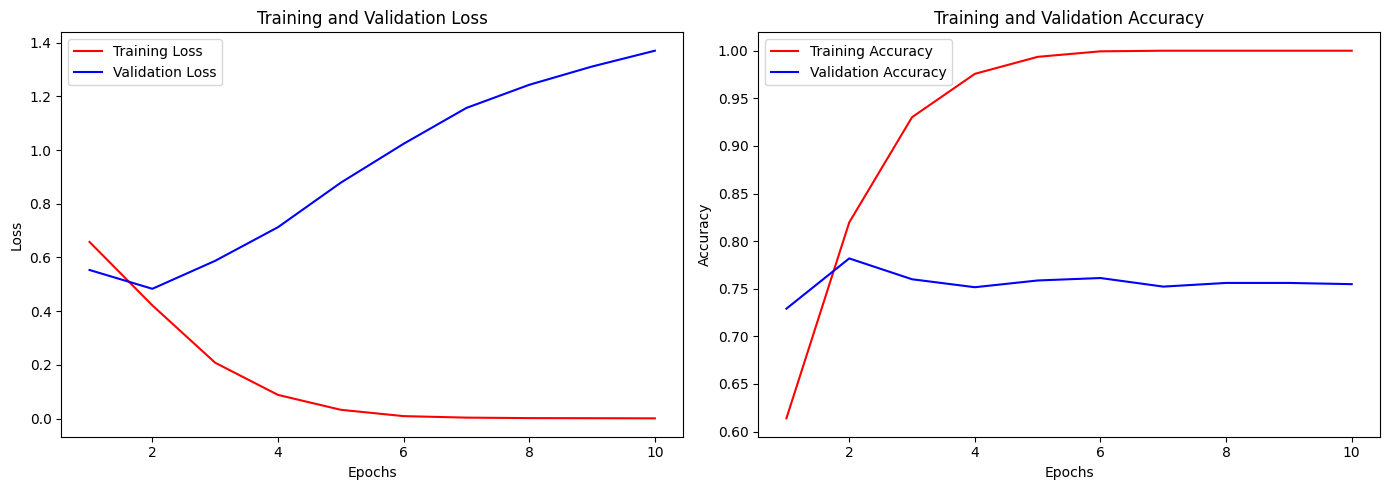

In [10]:
import matplotlib.pyplot as plt

# 손실과 정확도 시각화
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# 가로로 두 개의 그래프를 배치하기 위한 subplot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 손실
ax1.plot(epochs, loss_values, 'r', label='Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 두 번째 그래프: 정확도
ax2.plot(epochs, acc_values, 'r', label='Training Accuracy')
ax2.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# 데이터 불러오기
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

# 특성과 타겟 분리
X = CDT_GF['Morpheme_Analyzed']
y = CDT_GF['Label']

# 라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 토큰화 및 시퀀스 변환
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# CNN 모델 생성
embedding_dim = 100
num_filters = 128
kernel_size = 5

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("정확도:", accuracy)

Epoch 1/10
57/57 [==============================] - 9s 126ms/step - loss: 0.6747 - accuracy: 0.6045 - val_loss: 0.6059 - val_accuracy: 0.8104
Epoch 2/10
57/57 [==============================] - 6s 112ms/step - loss: 0.4086 - accuracy: 0.8519 - val_loss: 0.3549 - val_accuracy: 0.8293
Epoch 3/10
57/57 [==============================] - 5s 82ms/step - loss: 0.1429 - accuracy: 0.9526 - val_loss: 0.3945 - val_accuracy: 0.8426
Epoch 4/10
57/57 [==============================] - 3s 57ms/step - loss: 0.0427 - accuracy: 0.9914 - val_loss: 0.4625 - val_accuracy: 0.8304
Epoch 5/10
57/57 [==============================] - 4s 62ms/step - loss: 0.0116 - accuracy: 0.9994 - val_loss: 0.5447 - val_accuracy: 0.8248
Epoch 6/10
57/57 [==============================] - 3s 56ms/step - loss: 0.0057 - accuracy: 0.9997 - val_loss: 0.6070 - val_accuracy: 0.8204
Epoch 7/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.6472 - val_accuracy: 0.8271
Epoch 8/10


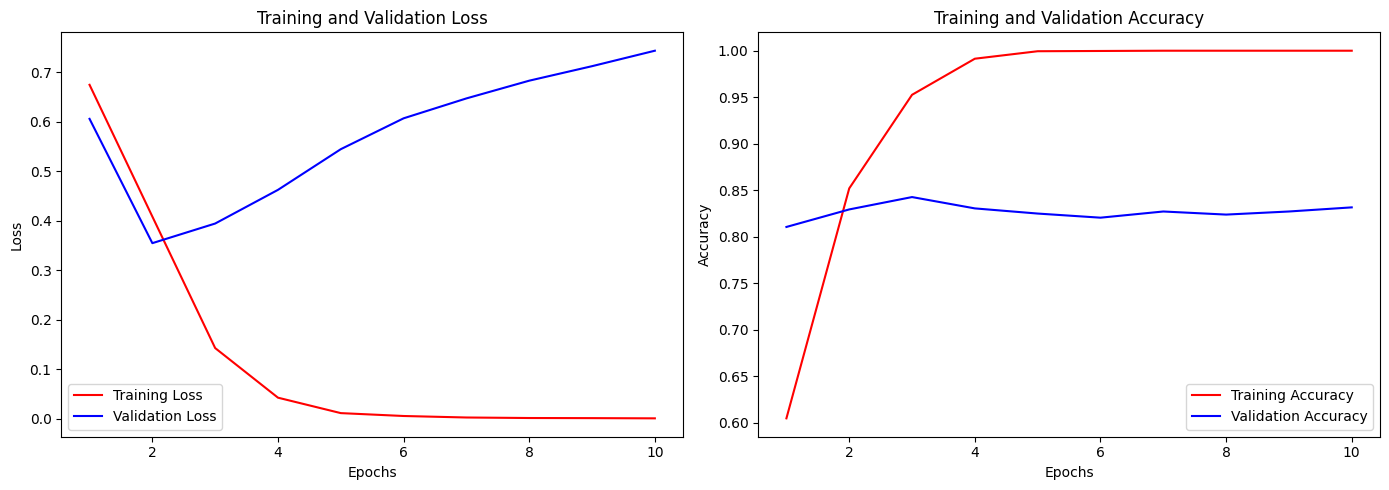

In [12]:
import matplotlib.pyplot as plt

# 손실과 정확도 시각화
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# 가로로 두 개의 그래프를 배치하기 위한 subplot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 손실
ax1.plot(epochs, loss_values, 'r', label='Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 두 번째 그래프: 정확도
ax2.plot(epochs, acc_values, 'r', label='Training Accuracy')
ax2.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

### DNN

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# 데이터 불러오기
url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

# 특성과 타겟 분리
X = CDT_TF['Morpheme_Analyzed']
y = CDT_TF['Score']

# 라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 토큰화 및 시퀀스 변환
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# DNN 모델 생성
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("정확도:", accuracy)

Epoch 1/10
98/98 [==============================] - 11s 93ms/step - loss: 0.6570 - accuracy: 0.6113 - val_loss: 0.5433 - val_accuracy: 0.7432
Epoch 2/10
98/98 [==============================] - 7s 72ms/step - loss: 0.3713 - accuracy: 0.8425 - val_loss: 0.4840 - val_accuracy: 0.7671
Epoch 3/10
98/98 [==============================] - 3s 35ms/step - loss: 0.1253 - accuracy: 0.9651 - val_loss: 0.5750 - val_accuracy: 0.7632
Epoch 4/10
98/98 [==============================] - 3s 35ms/step - loss: 0.0214 - accuracy: 0.9984 - val_loss: 0.6934 - val_accuracy: 0.7638
Epoch 5/10
98/98 [==============================] - 2s 24ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.8070 - val_accuracy: 0.7548
Epoch 6/10
98/98 [==============================] - 3s 29ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8840 - val_accuracy: 0.7613
Epoch 7/10
98/98 [==============================] - 2s 19ms/step - loss: 7.9005e-04 - accuracy: 1.0000 - val_loss: 0.9377 - val_accuracy: 0.7568
Epoch 8/

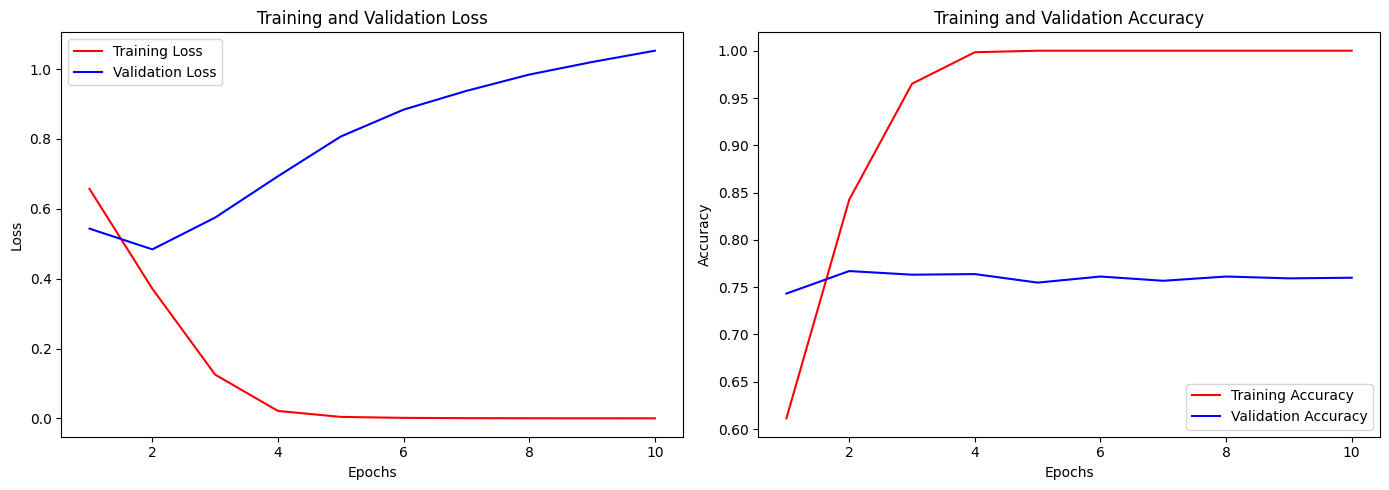

In [14]:
import matplotlib.pyplot as plt

# 손실과 정확도 시각화
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# 가로로 두 개의 그래프를 배치하기 위한 subplot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 손실
ax1.plot(epochs, loss_values, 'r', label='Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 두 번째 그래프: 정확도
ax2.plot(epochs, acc_values, 'r', label='Training Accuracy')
ax2.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# 데이터 불러오기
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

# 특성과 타겟 분리
X = CDT_GF['Morpheme_Analyzed']
y = CDT_GF['Label']

# 라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 토큰화 및 시퀀스 변환
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# DNN 모델 생성
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("정확도:", accuracy)

Epoch 1/10
57/57 [==============================] - 7s 107ms/step - loss: 0.6865 - accuracy: 0.5494 - val_loss: 0.6348 - val_accuracy: 0.7472
Epoch 2/10
57/57 [==============================] - 5s 79ms/step - loss: 0.3986 - accuracy: 0.8805 - val_loss: 0.3602 - val_accuracy: 0.8503
Epoch 3/10
57/57 [==============================] - 3s 53ms/step - loss: 0.0929 - accuracy: 0.9742 - val_loss: 0.3926 - val_accuracy: 0.8304
Epoch 4/10
57/57 [==============================] - 3s 52ms/step - loss: 0.0135 - accuracy: 0.9997 - val_loss: 0.3823 - val_accuracy: 0.8492
Epoch 5/10
57/57 [==============================] - 3s 52ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.4046 - val_accuracy: 0.8503
Epoch 6/10
57/57 [==============================] - 2s 28ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4264 - val_accuracy: 0.8492
Epoch 7/10
57/57 [==============================] - 2s 31ms/step - loss: 9.8043e-04 - accuracy: 1.0000 - val_loss: 0.4473 - val_accuracy: 0.8448
Epoch 8/

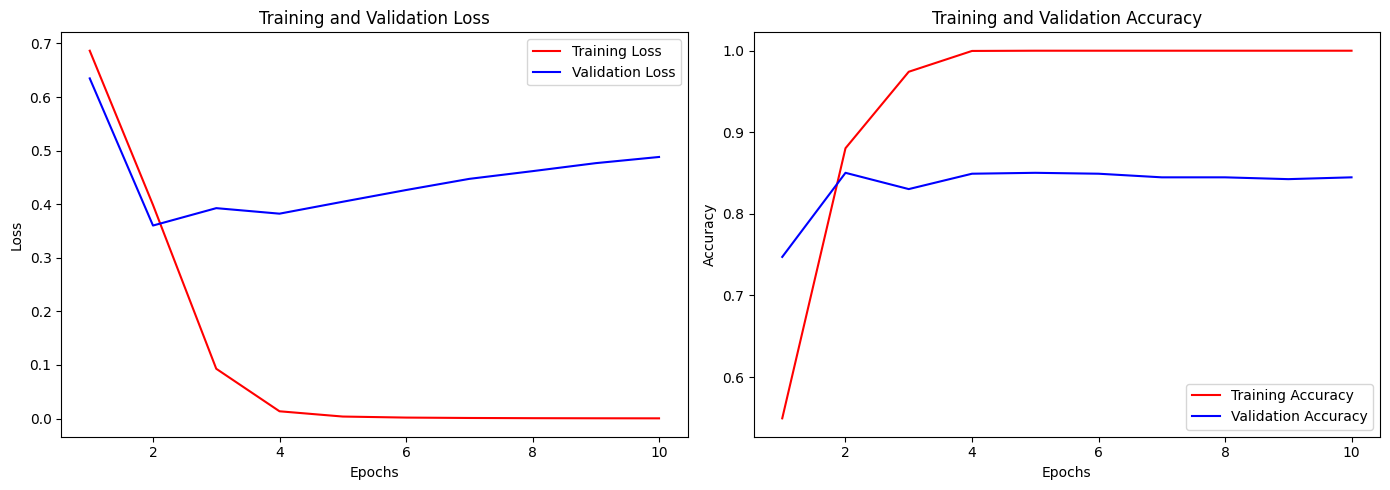

In [16]:
import matplotlib.pyplot as plt

# 손실과 정확도 시각화
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# 가로로 두 개의 그래프를 배치하기 위한 subplot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 손실
ax1.plot(epochs, loss_values, 'r', label='Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 두 번째 그래프: 정확도
ax2.plot(epochs, acc_values, 'r', label='Training Accuracy')
ax2.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

### RNN

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM

# 데이터 불러오기
url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

# 특성과 타겟 분리
X = CDT_TF['Morpheme_Analyzed']
y = CDT_TF['Score']

# 라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 토큰화 및 시퀀스 변환
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# RNN 모델 생성
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("정확도:", accuracy)

Epoch 1/10
98/98 [==============================] - 43s 409ms/step - loss: 0.5788 - accuracy: 0.6974 - val_loss: 0.4811 - val_accuracy: 0.7574
Epoch 2/10
98/98 [==============================] - 38s 387ms/step - loss: 0.3541 - accuracy: 0.8525 - val_loss: 0.4884 - val_accuracy: 0.7761
Epoch 3/10
98/98 [==============================] - 35s 362ms/step - loss: 0.2338 - accuracy: 0.9120 - val_loss: 0.5221 - val_accuracy: 0.7696
Epoch 4/10
98/98 [==============================] - 34s 348ms/step - loss: 0.1491 - accuracy: 0.9500 - val_loss: 0.6634 - val_accuracy: 0.7593
Epoch 5/10
98/98 [==============================] - 34s 343ms/step - loss: 0.0994 - accuracy: 0.9643 - val_loss: 0.7356 - val_accuracy: 0.7445
Epoch 6/10
98/98 [==============================] - 33s 340ms/step - loss: 0.0682 - accuracy: 0.9778 - val_loss: 0.9083 - val_accuracy: 0.7548
Epoch 7/10
98/98 [==============================] - 34s 347ms/step - loss: 0.0430 - accuracy: 0.9860 - val_loss: 1.0791 - val_accuracy: 0.7413

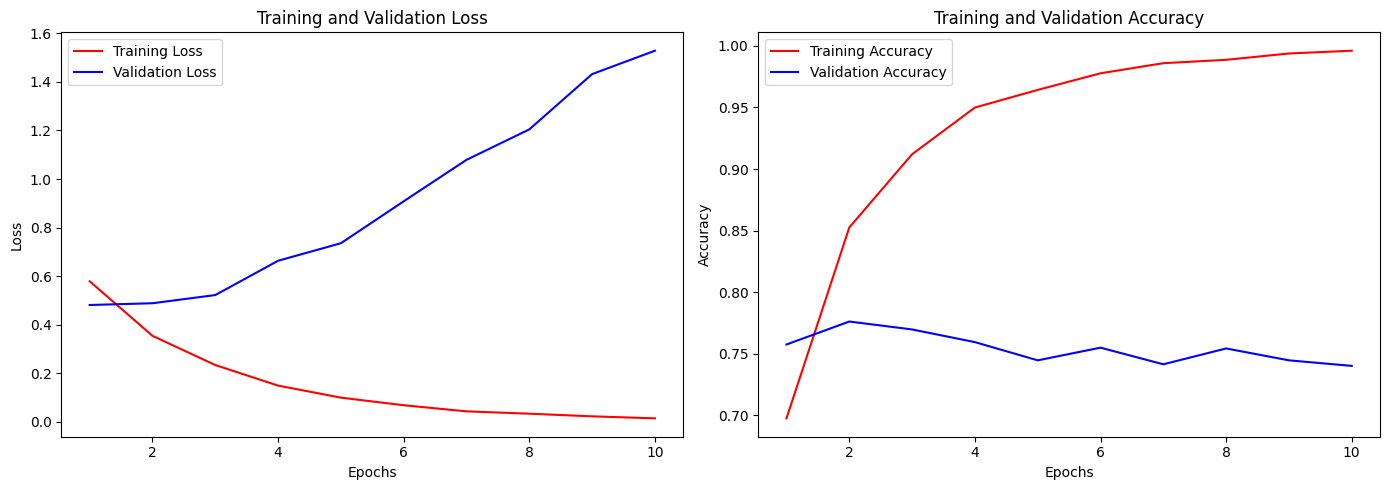

In [18]:
import matplotlib.pyplot as plt

# 손실과 정확도 시각화
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# 가로로 두 개의 그래프를 배치하기 위한 subplot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 손실
ax1.plot(epochs, loss_values, 'r', label='Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 두 번째 그래프: 정확도
ax2.plot(epochs, acc_values, 'r', label='Training Accuracy')
ax2.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM

# 데이터 불러오기
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

# 특성과 타겟 분리
X = CDT_GF['Morpheme_Analyzed']
y = CDT_GF['Label']

# 라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 토큰화 및 시퀀스 변환
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# RNN 모델 생성
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("정확도:", accuracy)

Epoch 1/10
57/57 [==============================] - 29s 438ms/step - loss: 0.5910 - accuracy: 0.7041 - val_loss: 0.4020 - val_accuracy: 0.8315
Epoch 2/10
57/57 [==============================] - 21s 375ms/step - loss: 0.2674 - accuracy: 0.8982 - val_loss: 0.3565 - val_accuracy: 0.8614
Epoch 3/10
57/57 [==============================] - 22s 379ms/step - loss: 0.1277 - accuracy: 0.9573 - val_loss: 0.3541 - val_accuracy: 0.8570
Epoch 4/10
57/57 [==============================] - 22s 384ms/step - loss: 0.0569 - accuracy: 0.9847 - val_loss: 0.3935 - val_accuracy: 0.8404
Epoch 5/10
57/57 [==============================] - 20s 357ms/step - loss: 0.0345 - accuracy: 0.9931 - val_loss: 0.4446 - val_accuracy: 0.8348
Epoch 6/10
57/57 [==============================] - 21s 362ms/step - loss: 0.0160 - accuracy: 0.9972 - val_loss: 0.5985 - val_accuracy: 0.8370
Epoch 7/10
57/57 [==============================] - 19s 340ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.6760 - val_accuracy: 0.8381

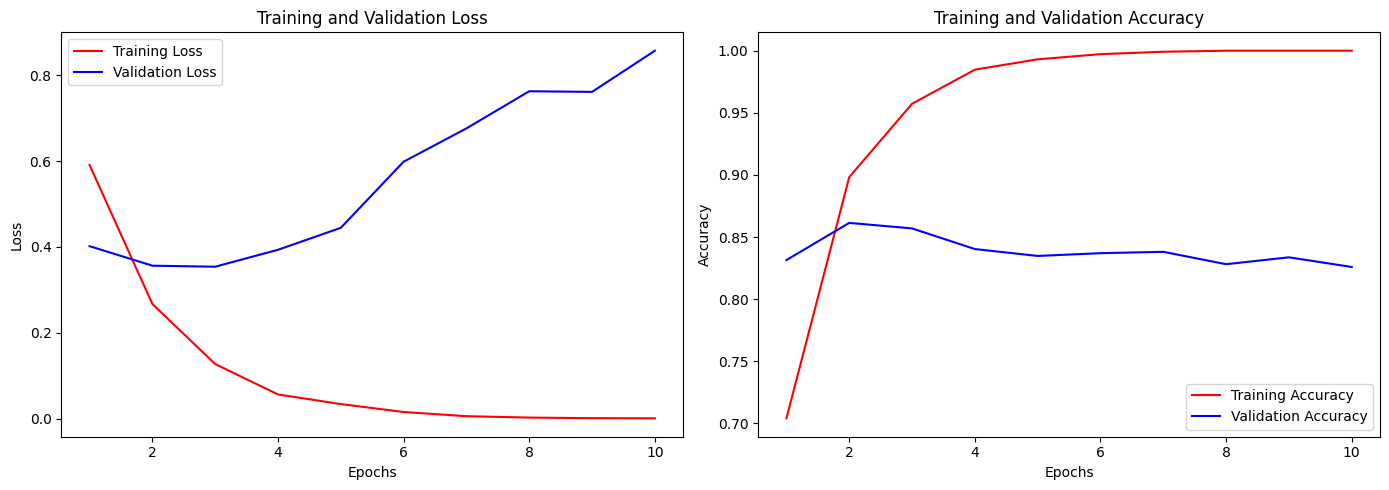

In [20]:
import matplotlib.pyplot as plt

# 손실과 정확도 시각화
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# 가로로 두 개의 그래프를 배치하기 위한 subplot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 손실
ax1.plot(epochs, loss_values, 'r', label='Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 두 번째 그래프: 정확도
ax2.plot(epochs, acc_values, 'r', label='Training Accuracy')
ax2.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

### LSTM

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 데이터 불러오기
url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

# 특성과 타겟 분리
X = CDT_TF['Morpheme_Analyzed']
y = CDT_TF['Score']

# 라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 토큰화 및 시퀀스 변환
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# LSTM 모델 생성
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("정확도:", accuracy)

Epoch 1/10
98/98 [==============================] - 43s 408ms/step - loss: 0.5947 - accuracy: 0.6684 - val_loss: 0.5218 - val_accuracy: 0.7497
Epoch 2/10
98/98 [==============================] - 37s 376ms/step - loss: 0.3612 - accuracy: 0.8441 - val_loss: 0.4850 - val_accuracy: 0.7690
Epoch 3/10
98/98 [==============================] - 36s 363ms/step - loss: 0.2304 - accuracy: 0.9110 - val_loss: 0.5524 - val_accuracy: 0.7709
Epoch 4/10
98/98 [==============================] - 34s 345ms/step - loss: 0.1423 - accuracy: 0.9525 - val_loss: 0.6649 - val_accuracy: 0.7613
Epoch 5/10
98/98 [==============================] - 35s 360ms/step - loss: 0.0855 - accuracy: 0.9706 - val_loss: 0.8800 - val_accuracy: 0.7548
Epoch 6/10
98/98 [==============================] - 34s 343ms/step - loss: 0.0538 - accuracy: 0.9844 - val_loss: 0.9129 - val_accuracy: 0.7497
Epoch 7/10
98/98 [==============================] - 32s 330ms/step - loss: 0.0298 - accuracy: 0.9921 - val_loss: 1.0824 - val_accuracy: 0.7497

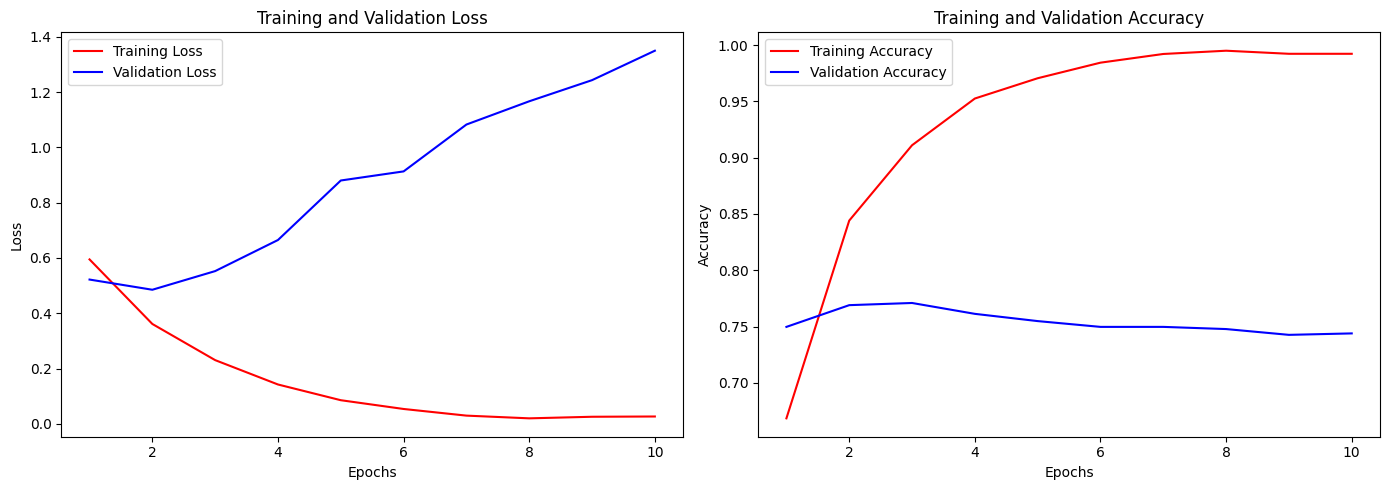

In [22]:
import matplotlib.pyplot as plt

# 손실과 정확도 시각화
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# 가로로 두 개의 그래프를 배치하기 위한 subplot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 손실
ax1.plot(epochs, loss_values, 'r', label='Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 두 번째 그래프: 정확도
ax2.plot(epochs, acc_values, 'r', label='Training Accuracy')
ax2.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 데이터 불러오기
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

# 특성과 타겟 분리
X = CDT_GF['Morpheme_Analyzed']
y = CDT_GF['Label']

# 라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 토큰화 및 시퀀스 변환
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# LSTM 모델 생성
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("정확도:", accuracy)

Epoch 1/10
57/57 [==============================] - 28s 447ms/step - loss: 0.5898 - accuracy: 0.6952 - val_loss: 0.3669 - val_accuracy: 0.8559
Epoch 2/10
57/57 [==============================] - 23s 408ms/step - loss: 0.3216 - accuracy: 0.8755 - val_loss: 0.3489 - val_accuracy: 0.8370
Epoch 3/10
57/57 [==============================] - 21s 365ms/step - loss: 0.1485 - accuracy: 0.9434 - val_loss: 0.3690 - val_accuracy: 0.8514
Epoch 4/10
57/57 [==============================] - 21s 370ms/step - loss: 0.0641 - accuracy: 0.9817 - val_loss: 0.5486 - val_accuracy: 0.8437
Epoch 5/10
57/57 [==============================] - 19s 342ms/step - loss: 0.0346 - accuracy: 0.9917 - val_loss: 0.4706 - val_accuracy: 0.8381
Epoch 6/10
57/57 [==============================] - 20s 356ms/step - loss: 0.0188 - accuracy: 0.9953 - val_loss: 0.5356 - val_accuracy: 0.8304
Epoch 7/10
57/57 [==============================] - 19s 330ms/step - loss: 0.0077 - accuracy: 0.9997 - val_loss: 0.6058 - val_accuracy: 0.8348

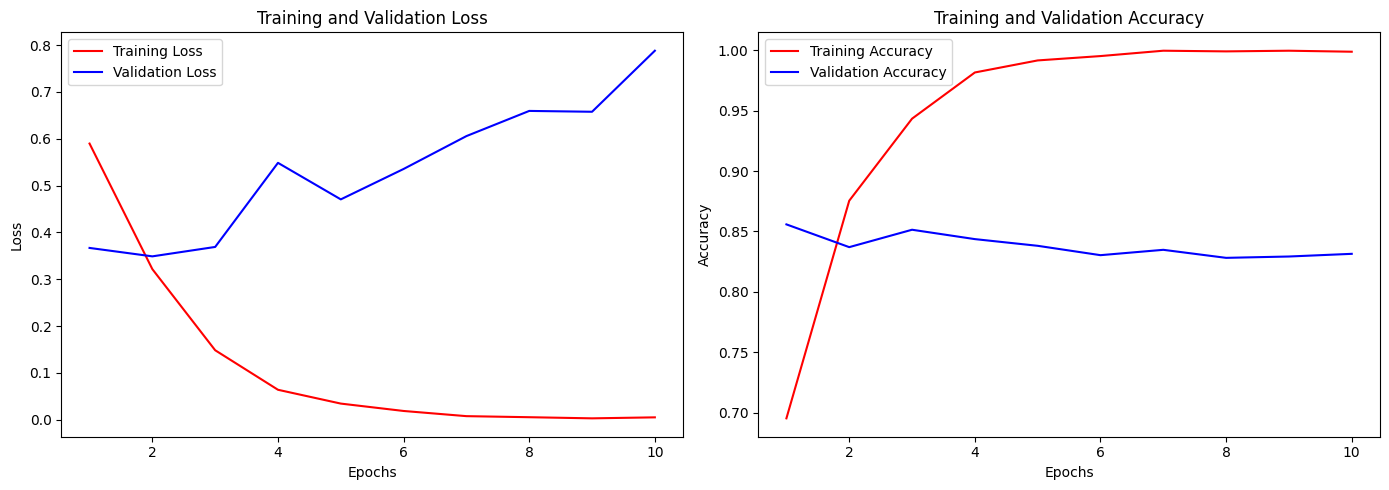

In [24]:
import matplotlib.pyplot as plt

# 손실과 정확도 시각화
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# 가로로 두 개의 그래프를 배치하기 위한 subplot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 손실
ax1.plot(epochs, loss_values, 'r', label='Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# 두 번째 그래프: 정확도
ax2.plot(epochs, acc_values, 'r', label='Training Accuracy')
ax2.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

## BERT

In [25]:
!pip install transformers
!pip install sentencepiece
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-obbem4nq/kobert-tokenizer_6fef45a88b684d91a2177fdbe8ba970e
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-obbem4nq/kobert-tokenizer_6fef45a88b684d91a2177fdbe8ba970e
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4633 sha256=8e8e670224ea3d64ca00de95152ef5f11652df24b8d78e745b63d951412697ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-p7718mzl/wheels/e9/1a/3f/a864970e8a169c176befa3c4a1e07aa612f69195907a4045fe
Successfully built kobert_tokenizer


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW, get_cosine_schedule_with_warmup
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        review = str(self.data.iloc[idx]['Desc_Corrected'])
        label = self.data.iloc[idx]['Score']

        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 데이터 불러오기
url9 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter_fix.csv'
CDT_TF = pd.read_csv(url9)

# 토크나이저 및 모델 불러오기
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1', last_hidden_states=True)
model = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)

# 하이퍼파라미터 설정
MAX_LEN = 128
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
EPOCHS = 10

# 데이터셋 및 데이터로더 생성
train_df, val_df = train_test_split(CDT_TF, test_size=0.2, random_state=42)

train_dataset = ReviewDataset(train_df, tokenizer, MAX_LEN)
val_dataset = ReviewDataset(val_df, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# KoBERT 분류 모델 정의
class KoBERTClassifier(nn.Module):
    def __init__(self, kobert_model, num_classes):
        super(KoBERTClassifier, self).__init__()
        self.kobert = kobert_model
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.kobert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.kobert(input_ids=input_ids, attention_mask=attention_mask)
        output = self.drop(pooled_output)
        return self.out(output)

# 분류 모델 초기화
num_classes = 2  # 긍정, 부정
classifier = KoBERTClassifier(model, num_classes)

# 옵티마이저 및 스케줄러 설정
optimizer = AdamW(classifier.parameters(), lr=LEARNING_RATE)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * EPOCHS)

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 훈련 함수 정의
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
        for batch_idx, batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

            train_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

            train_acc = correct_train / total_train
            progress_bar.set_description(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss / (batch_idx+1):.4f}, Train Accuracy: {train_acc:.4f}')

        history['train_loss'].append(train_loss / len(train_loader))
        history['train_acc'].append(train_acc)

        # 검증 과정
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['label'].to(device)

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)

                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

            val_acc = correct_val / total_val

        val_loss /= len(val_loader)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

    print(f'Final Training Accuracy: {train_acc:.4f}, Final Training Loss: {train_loss / len(train_loader):.4f}, Final Validation Accuracy: {val_acc:.4f}, Final Validation Loss: {val_loss:.4f}')

    return history

# 모델 훈련
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier.to(device)

history = train_model(classifier, train_loader, val_loader, criterion, optimizer, scheduler, EPOCHS)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|          | 0/195 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Epoch 1/10, Train Loss: 0.5371, Train Accuracy: 0.7304: 100%|██████████| 195/195 [02:06<00:00,  1.54it/s]


Epoch: 1/10, Train Loss: 0.5371, Train Accuracy: 0.7304, Val Loss: 0.4323, Val Accuracy: 0.8050


Epoch 2/10, Train Loss: 0.3841, Train Accuracy: 0.8430: 100%|██████████| 195/195 [02:03<00:00,  1.57it/s]


Epoch: 2/10, Train Loss: 0.3841, Train Accuracy: 0.8430, Val Loss: 0.3923, Val Accuracy: 0.8314


Epoch 3/10, Train Loss: 0.3035, Train Accuracy: 0.8835: 100%|██████████| 195/195 [02:03<00:00,  1.57it/s]


Epoch: 3/10, Train Loss: 0.3035, Train Accuracy: 0.8835, Val Loss: 0.3866, Val Accuracy: 0.8385


Epoch 4/10, Train Loss: 0.2192, Train Accuracy: 0.9208: 100%|██████████| 195/195 [02:03<00:00,  1.57it/s]


Epoch: 4/10, Train Loss: 0.2192, Train Accuracy: 0.9208, Val Loss: 0.4227, Val Accuracy: 0.8211


Epoch 5/10, Train Loss: 0.1518, Train Accuracy: 0.9514: 100%|██████████| 195/195 [02:03<00:00,  1.57it/s]


Epoch: 5/10, Train Loss: 0.1518, Train Accuracy: 0.9514, Val Loss: 0.5058, Val Accuracy: 0.8127


Epoch 6/10, Train Loss: 0.1078, Train Accuracy: 0.9690: 100%|██████████| 195/195 [02:03<00:00,  1.57it/s]


Epoch: 6/10, Train Loss: 0.1078, Train Accuracy: 0.9690, Val Loss: 0.5871, Val Accuracy: 0.8211


Epoch 7/10, Train Loss: 0.0739, Train Accuracy: 0.9820: 100%|██████████| 195/195 [02:03<00:00,  1.58it/s]


Epoch: 7/10, Train Loss: 0.0739, Train Accuracy: 0.9820, Val Loss: 0.6493, Val Accuracy: 0.8224


Epoch 8/10, Train Loss: 0.0642, Train Accuracy: 0.9847:  25%|██▍       | 48/195 [00:31<01:33,  1.57it/s]

In [ ]:
# 훈련 결과 시각화
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], 'r', label='Training Loss')
plt.plot(history['val_loss'], 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], 'r', label='Training Accuracy')
plt.plot(history['val_acc'], 'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW, get_cosine_schedule_with_warmup
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        review = str(self.data.iloc[idx]['Desc_Corrected'])
        label = self.data.iloc[idx]['Label']

        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 데이터 불러오기
url10 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_gpt_fix.csv'
CDT_GF = pd.read_csv(url10)

# 토크나이저 및 모델 불러오기
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1', last_hidden_states=True)
model = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)

# 하이퍼파라미터 설정
MAX_LEN = 128
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
EPOCHS = 10

# 데이터셋 및 데이터로더 생성
train_df, val_df = train_test_split(CDT_GF, test_size=0.2, random_state=42)

train_dataset = ReviewDataset(train_df, tokenizer, MAX_LEN)
val_dataset = ReviewDataset(val_df, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# KoBERT 분류 모델 정의
class KoBERTClassifier(nn.Module):
    def __init__(self, kobert_model, num_classes):
        super(KoBERTClassifier, self).__init__()
        self.kobert = kobert_model
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.kobert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.kobert(input_ids=input_ids, attention_mask=attention_mask)
        output = self.drop(pooled_output)
        return self.out(output)

# 분류 모델 초기화
num_classes = 2  # 긍정, 부정
classifier = KoBERTClassifier(model, num_classes)

# 옵티마이저 및 스케줄러 설정
optimizer = AdamW(classifier.parameters(), lr=LEARNING_RATE)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * EPOCHS)

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 훈련 함수 정의
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
        for batch_idx, batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

            train_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

            train_acc = correct_train / total_train
            progress_bar.set_description(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss / (batch_idx+1):.4f}, Train Accuracy: {train_acc:.4f}')

        history['train_loss'].append(train_loss / len(train_loader))
        history['train_acc'].append(train_acc)

        # 검증 과정
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['label'].to(device)

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)

                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

            val_acc = correct_val / total_val

        val_loss /= len(val_loader)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

    print(f'Final Training Accuracy: {train_acc:.4f}, Final Training Loss: {train_loss / len(train_loader):.4f}, Final Validation Accuracy: {val_acc:.4f}, Final Validation Loss: {val_loss:.4f}')

    return history

# 모델 훈련
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier.to(device)

history = train_model(classifier, train_loader, val_loader, criterion, optimizer, scheduler, EPOCHS)

In [ ]:
# 훈련 결과 시각화
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], 'r', label='Training Loss')
plt.plot(history['val_loss'], 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], 'r', label='Training Accuracy')
plt.plot(history['val_acc'], 'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
url6 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_twitter.csv'
CDT_T = pd.read_csv(url6)

# BERT 모델을 이용하여 각 리뷰를 긍정 또는 부정으로 분류하고 Bert_Label에 해당 레이블을 기록하는 함수
def classify_reviews(model, tokenizer, dataframe):
    # 예측을 위해 평가 모드로 전환
    model.eval()

    bert_labels = []

    with torch.no_grad():
        for idx, row in tqdm(dataframe.iterrows(), total=len(dataframe)):
            review = str(row['Desc_Corrected'])
            encoding = tokenizer.encode_plus(
                review,
                add_special_tokens=True,
                max_length=MAX_LEN,
                return_token_type_ids=False,
                pad_to_max_length=True,
                return_attention_mask=True,
                return_tensors='pt',
                truncation=True
            )

            input_ids = encoding['input_ids'].to(device)
            attention_mask = encoding['attention_mask'].to(device)

            output = model(input_ids, attention_mask)
            _, predicted = torch.max(output, 1)

            # 예측 결과를 바탕으로 긍정(1) 또는 부정(0)으로 분류
            bert_label = '긍정' if predicted.item() == 1 else '부정'
            bert_labels.append(bert_label)

    return bert_labels

# 실제 데이터에 새로운 칼럼인 Bert_Label 추가
CDT_T['Bert_Label'] = classify_reviews(classifier, tokenizer, CDT_T)

# 결과 출력
CDT_T

In [ ]:
# Score 칼럼 삭제
CDT_T = CDT_T.drop(columns=['Score'])

# Bert_Label 칼럼을 맨 첫 번째 칼럼으로 이동
cols = ['Bert_Label'] + [col for col in CDT_T.columns if col != 'Bert_Label']
CDT_T = CDT_T[cols]

# 결과 확인
CDT_T

In [ ]:
# 결과를 CSV 파일로 저장
CDT_T.to_csv('CDT_bert.csv', index=False)

# VII. SHAP

In [ ]:
pip install shap

In [ ]:
import numpy as np
import scipy as sp
import torch
from transformers import BertTokenizer, BertModel
import shap

# 토크나이저 및 모델 불러오기
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1', last_hidden_states=True)
model = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=True).to('cuda')

# 예측 함수 정의
def f(x):
    inputs = [tokenizer.encode(v, padding="max_length", max_length=512, truncation=True) for v in x]
    tv = torch.tensor(inputs).to('cuda')
    with torch.no_grad():
        outputs = model(tv)
    cls_outputs = outputs['last_hidden_state'][:, 0, :].cpu().numpy()  # [CLS] 토큰의 hidden state 추출
    scores = np.exp(cls_outputs) / np.exp(cls_outputs).sum(axis=1, keepdims=True)
    val = sp.special.logit(scores[:, 1])  # use one vs rest logit units
    return val

# SHAP 설명자 생성
explainer = shap.Explainer(f, tokenizer)

# 샘플 텍스트에 대한 모델 예측 설명
imdb_train = '주간에 거주하는 가족이 없다면 살만 함앞서 말한 대로 공사 소음 층간소음 담배 연기 버틸 자신 있음 딱히 주거하는 데 별 지장 없음 그러나 아기 있는 가족은 추천하지 않음'
shap_values = explainer([imdb_train], fixed_context=1)

# 설명 시각화
shap.plots.text(shap_values[0])

# VIII. Word2Vec

In [ ]:
import pandas as pd
url11 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert.csv'
CDT_B = pd.read_csv(url11)

CDT_B

In [ ]:
# "Bert_Label" 칼럼의 내용 빈도수 확인
CDT_B['Bert_Label'].value_counts()

## 빈도 분석을 위한 추가 텍스트 전처리

In [ ]:
pip install bareunpy

In [ ]:
import sys
from bareunpy import Tagger

# API 키 설정
API_KEY= 'koba-PUDWS4A-M4WU4YY-TX5TEAA-UMIDCOI'

# Tagger 객체 생성
tagger = Tagger(API_KEY)

# 분석할 문장
sentences = ["안녕하세요.", "바른을 사용해서 새로운 경험을 해보세요."]

# 형태소 분석 수행
res = tagger.tags(sentences)

# 결과를 가져와서 출력
pa = res.pos()
print(pa)

In [ ]:
import pandas as pd
url11 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert.csv'
CDT_B = pd.read_csv(url11)

In [ ]:
CDT_B

In [ ]:
import pandas as pd
from bareunpy import Tagger
from tqdm import tqdm

# API 키 설정
API_KEY = 'koba-PUDWS4A-M4WU4YY-TX5TEAA-UMIDCOI'

# Tagger 객체 생성
tagger = Tagger(API_KEY)

# 사용자 사전 저장
# 사전 이름으로 영문, 숫자, 기호('-', '_')만 사용 가능
# 사전 단어에 기호는 추가될 수 없습니다(복합명사 분리사전의 ^ 기호 제외)

cust_dic = tagger.custom_dict('custom_dict')
cust_dic.copy_np_set({'트레이더스', '익스프레스', '피트니스', '가성비', '관리비', '역세권', '후레쉬', '호재', '리모델링', '강추',
                      '숲세권', '초중', '중고', '초중고', '용적률', '용적율', '비전', 'gtx', '연습장', '북한산', '마트', '냉난방비', '롯데월드타워',
                      '조망권', '조망', '층고', '동간간격', '층간소음', '병세권', '학세권', '산세권', '재건축', '전세', '시험장',
                      '한강', '여고', '남고', '일조량', '서울', '주상복합', '주부', '소방서', '경찰서', 'gs25', '스벅', '맥날',
                      '롯백', '홈플', '공기', '캠핑장', '한의원', 'emart24', '중고등학교', '평생학습관', '주민센터',
                      '편의시설', '편리시설', '도보', '공원', '스타필드', '롯데몰', '더현대', '사립초', '이케아', '시끄', '오마카세', '활력',
                      '크린토피아', '교보문고', '예스24', '공판장', '빨래방', '신한', '발망치', '중학생', '실거주', '젊은부부', '석계초', '파크밴드',
                      '엔터식스', '은행', '주차부족', 'srt', '초품아', '경사로', '대로변', '프렌차이즈', '1호선', '2호선', '3호선', '4호선',
                      '5호선', '6호선', '7호선', '8호선', '9호선', '조경', '비추천', '저평가', '노부부', '대지지분', '노후화', '내부시설',
                      '롯데캐슬', '노브랜드', '용적률', '투자가치', '유해업소', '월드컵경기장', '교육센터', '한옥마을', '하수구',
                      '학원가', '복도식', '양재천', '63빌딩', '핫플레이스', '소가족', '생활편의시설', '자연'})
cust_dic.update()
tagger.set_domain('custom_dict')

# 분석할 문장에 대해 형태소 분석을 수행하는 함수
def analyze_morphemes(sentence):
    if pd.isna(sentence):
        return None
    sentences = [sentence]
    res = tagger.tags(sentences)
    return res.pos()

# 진행 상황 표시를 위한 tqdm 설정
tqdm.pandas()

# Desc_Corrected 칼럼에 형태소 분석 적용
CDT_B['Morpheme_Analyzed_Bareun'] = CDT_B['Desc_Corrected'].progress_apply(analyze_morphemes)

# 결과 출력
CDT_B

In [ ]:
CDT_B.to_csv('CDT_bert_bareun.csv', index=False)

In [ ]:
import pandas as pd
url12 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert_bareun.csv'
CDT_BB = pd.read_csv(url12)
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(eval)

In [ ]:
CDT_BB

In [ ]:
from collections import Counter

# 특정 태그가 붙은 단어 필터링
tag_words = [word for sublist in CDT_BB['Morpheme_Analyzed_Bareun'] for word in sublist if word[1] == 'XPN']

# 각 단어의 발생 빈도 계산
tag_word_counts = Counter([word[0] for word in tag_words])

# 데이터프레임으로 변환
tag_word_counts_df = pd.DataFrame(tag_word_counts.items(), columns=['Word', 'Count'])

# 빈도 수에 따라 정렬
tag_word_counts_df.sort_values(by='Count', ascending=False, inplace=True)
tag_word_counts_df.reset_index(drop=True, inplace=True)

# 결과 출력
print(tag_word_counts_df.head(50))

In [ ]:
# 결과에서 특정 태그를 가진 형태소 삭제
def remove_tags(morphemes):
    if morphemes is None:
        return None
    return [(morph, tag) for morph, tag in morphemes if tag not in ['NNB', 'NP', 'NR', 'VX', 'VCP', 'VCN', 'MMD', 'MMN', 'MAG', 'MAJ',
                                                                    'IC', 'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX', 'JC',
                                                                    'EP', 'EF', 'EC', 'ETN', 'ETM', 'XSA', 'SF', 'SP', 'SS', 'SE',
                                                                    'SO', 'SW', 'SH', 'SN', 'NF', 'NV']]

CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(remove_tags)

CDT_BB

In [ ]:
# XPN 태그를 가진 단어를 뒤 단어와 합치고 태그를 NNG로 바꾸는 함수
def merge_xpn(morphemes):
    result = []
    skip = False
    for i in range(len(morphemes)):
        if skip:
            skip = False
            continue
        if morphemes[i][1] == 'XPN' and i+1 < len(morphemes):
            merged_word = morphemes[i][0] + morphemes[i+1][0]
            result.append((merged_word, 'NNG'))
            skip = True
        else:
            result.append(morphemes[i])
    return result

CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(merge_xpn)

In [ ]:
# ('들', 'XSN') 항목을 제거하는 함수
def remove_xsn(morphemes):
    return [morpheme for morpheme in morphemes if morpheme != ('들', 'XSN')]

# 각 리스트에서 ('들', 'XSN') 제거
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(remove_xsn)

In [ ]:
# XSN 태그를 가진 단어를 앞 단어와 합치고 태그를 NNG로 바꾸는 함수
def merge_xsn(morphemes):
    result = []
    for i in range(len(morphemes)):
        if i > 0 and morphemes[i][1] == 'XSN':
            # 앞 단어와 합치고 태그를 NNG로 변경
            merged_word = result[-1][0] + morphemes[i][0]
            result[-1] = (merged_word, 'NNG')
        else:
            result.append(morphemes[i])
    return result

CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(merge_xsn)

In [ ]:
# XSV 태그를 가진 단어를 앞 단어와 합치고 태그를 VV로 바꾸는 함수
def merge_xsv(morphemes):
    result = []
    for i in range(len(morphemes)):
        if i > 0 and morphemes[i][1] == 'XSV':
            # 앞 단어와 합치고 태그를 VV로 변경
            merged_word = result[-1][0] + morphemes[i][0]
            result[-1] = (merged_word, 'VV')
        else:
            result.append(morphemes[i])
    return result

CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(merge_xsv)

In [ ]:
def add_suffix_to_morphs(morphs):
    result = []
    for word, tag in morphs:
        if tag in ['VA', 'VV']:
            result.append((word + '다', tag))
        else:
            result.append((word, tag))
    return result

CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(add_suffix_to_morphs)

CDT_BB['Morpheme_Analyzed_Bareun']

In [ ]:
def extract_words(morphs):
    return [word for word, tag in morphs]

CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(extract_words)

CDT_BB['Morpheme_Analyzed_Bareun']

In [ ]:
# 특정 단어들을 제거하는 함수
def remove_specific_words(words, words_to_remove):
    return [word for word in words if word not in words_to_remove]

# 제거할 단어 목록
words_to_remove = ['아파트', '없다', '살다', '좋다', '있다', '수',
                   '등', '것', '되다', '단지', '하다', '거', '곳',
                   '집', '앞', '중', '정도', '편', '많다', '내',
                   '최고', '데', '전', '오다', '감일', '내외', '부분',
                   '그렇다', '아저씨', '잇다', '외', '계시다', '가다',
                   '분', '동네', '각종', '같다', '넓다', '내', '때',
                   '생활하다', '5분', '10분', '쪽', '남향', '정문',
                   '길', '잇다', '선', '대형', '1분', '가능하다',
                   'ᆞ', '타다', '평수', '후문', '듯', '떄문', '직주',
                   '쓰이다', '들다', '가능', '나오다', '잘되다', '위',
                   '늦다', '쉽다', '데', '로비', '전', '일조량', '냉난방',
                   '꿈의', '올해', '점', '층', '옆', '점', '엠', '때', '뒤',
                   '듯', '때', '인', '하', '때문', '적', '지', '돼다',
                   '아파트라', '일', '난방', '보다', '어쇼', '단', '감',
                   '약', '알다', '수준', '번', '만', '안', '자양', '라인',
                   '나다', '붙다', '임', '내역', '대방', '북쪽', '문', '샷',
                   '현관', '좁다', '들리다', '1명', '간단하다', '5년', '문',
                   '여쭤보다', '동', '붙박이장', '뷰라서', '틀다', '덥다',
                   '입맛', '따르다', '고르다', 'a', 'b', '동', '키', '경우',
                   '안젤리나', '알다', '개라', '아남한', '비', '그다', '번',
                   '벽', '저용', '절역', '시', '이내', '들어오다', '남', '4층',
                   '현재', '서', '번', '댜곱오다', '안다', '만', '노', '15분',
                   '우풍', '복도', '샷시', '안', '동', '3단지', '번', '1오래되',
                   '현관', '서울', '조금', '장점', '단점']

# Morpheme_Analyzed_Bareun 열에서 특정 단어 제거
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(lambda words: remove_specific_words(words, words_to_remove))

In [ ]:
CDT_BB.to_csv('CDT_bert_bareun_2.csv', index = False)

## 빈도 분석을 통한 동별 키워드 추출

In [ ]:
import pandas as pd
url13 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert_bareun_2.csv'
CDT_BB = pd.read_csv(url13)
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(eval)
CDT_BB

In [ ]:
import pandas as pd
url13 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert_bareun_2.csv'
CDT_BB = pd.read_csv(url13)

In [ ]:
CDT_BB[['Morpheme_Analyzed_Bareun']]

In [ ]:
# Desc_Corrected 및 Morpheme_Analyzed 열 삭제
CDT_BB = CDT_BB.drop(columns=['Desc_Corrected', 'Morpheme_Analyzed'])

CDT_BB

In [ ]:
import pandas as pd
from collections import Counter

# 각 동별로 긍정, 부정일 때 키워드 빈도수 계산 함수 정의
def get_top_keywords(data, label, top_n=5):
    # 특정 레이블(긍정, 부정)과 동별로 데이터 분리
    area_keywords = data[data['Bert_Label'] == label].groupby('Area')['Morpheme_Analyzed_Bareun'].sum()
    top_keywords = {}

    # 각 동별로 상위 top_n개의 키워드 추출
    for area, keywords in area_keywords.items():
        counter = Counter(keywords)
        most_common_keywords = [keyword for keyword, _ in counter.most_common(top_n)]
        top_keywords[area] = most_common_keywords

    return top_keywords

# 긍정, 부정일 때 키워드 계산
top_positive_keywords = get_top_keywords(CDT_BB, '긍정')
top_negative_keywords = get_top_keywords(CDT_BB, '부정')

# 데이터프레임에 긍정, 부정 키워드 열 추가
CDT_BB['Positive_Keywords'] = CDT_BB['Area'].map(top_positive_keywords)
CDT_BB['Negative_Keywords'] = CDT_BB['Area'].map(top_negative_keywords)

CDT_BB

## 키워드 연관어 추출 및 시각화

In [ ]:
import pandas as pd
url13 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert_bareun_2.csv'
CDT_BB = pd.read_csv(url13)
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(eval)
CDT_BB

In [ ]:
CDT_BB.sample(n=15)

In [ ]:
import pandas as pd
import ast
from gensim.models import Word2Vec
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 광진구 중곡동의 긍정 문장 필터링
junggok_positive = CDT_BB[(CDT_BB['Area'] == '광진구 중곡동') & (CDT_BB['Bert_Label'] == '긍정')]

# Word2Vec 모델 학습
junggok_model = Word2Vec(sentences=junggok_positive['Morpheme_Analyzed_Bareun'], vector_size=100, window=5, min_count=1, workers=4)

# 키워드를 '거리'로 설정
keyword = '거리'

# 키워드의 연관어 추출
similar_words = junggok_model.wv.most_similar(keyword, topn=5)

# 네트워크 그래프 생성
G = nx.Graph()

# 키워드와 연관어 추가
G.add_node(keyword)
for word, similarity in similar_words:
    G.add_node(word)
    G.add_edge(keyword, word, weight=similarity)

# 네트워크 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # 레이아웃 설정 (k 값을 작게 하고 iterations 증가)
node_colors = ['red' if node == keyword else 'mistyrose' for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=15000, node_color=node_colors, font_size=30, font_weight="bold", edge_color="gray", font_family=font_name)
plt.title("광진구 중곡동", fontsize=30)
plt.show()

In [ ]:
import pandas as pd
import ast
from gensim.models import Word2Vec
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 광진구 중곡동의 긍정 문장 필터링
junggok_positive = CDT_BB[(CDT_BB['Area'] == '광진구 중곡동') & (CDT_BB['Bert_Label'] == '긍정')]


# 전체 단어 리스트 생성
all_words = [word for sentence in junggok_positive['Morpheme_Analyzed_Bareun'] for word in sentence]

# 단어 빈도수 계산
word_counts = Counter(all_words)

# 가장 빈번한 상위 5개 단어 선택
top_5_keywords = [word for word, count in word_counts.most_common(5)]

# Word2Vec 모델 학습
junggok_model = Word2Vec(sentences=junggok_positive['Morpheme_Analyzed_Bareun'], vector_size=100, window=5, min_count=1, workers=4)

# 상위 5개 단어에 대해 연관어 추출 및 시각화
for keyword in top_5_keywords:
    # 키워드의 연관어 추출
    similar_words = junggok_model.wv.most_similar(keyword, topn=5)

    # 네트워크 그래프 생성
    G = nx.Graph()

    # 키워드와 연관어 추가
    G.add_node(keyword)
    for word, similarity in similar_words:
        G.add_node(word)
        G.add_edge(keyword, word, weight=similarity)

    # 네트워크 시각화
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5)  # 레이아웃 설정 (k 값을 작게 하고 iterations 증가)
    node_colors = ['red' if node == keyword else 'mistyrose' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_size=15000, node_color=node_colors, font_size=30, font_weight="bold", edge_color="gray", font_family=font_name)
    plt.title(f"광진구 중곡동 - {keyword}", fontsize=30)
    plt.show()

In [ ]:
import pandas as pd
import ast
from gensim.models import Word2Vec
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def visualize_top_keywords(data, title, is_positive=True):
    # 전체 단어 리스트 생성
    all_words = [word for sentence in data['Morpheme_Analyzed_Bareun'] for word in sentence]

    # 단어 빈도수 계산
    word_counts = Counter(all_words)

    # 가장 빈번한 상위 5개 단어 선택
    top_5_keywords = [word for word, count in word_counts.most_common(5)]

    # Word2Vec 모델 학습
    model = Word2Vec(sentences=data['Morpheme_Analyzed_Bareun'], vector_size=100, window=5, min_count=1, workers=4)

    # 그래프를 한 줄에 나열하기 위한 설정
    fig, axes = plt.subplots(1, 5, figsize=(25, 5), dpi=100)

    # 상위 5개 단어에 대해 연관어 추출 및 시각화
    for i, keyword in enumerate(top_5_keywords):
        # 키워드의 연관어 추출
        similar_words = model.wv.most_similar(keyword, topn=3)

        # 네트워크 그래프 생성
        G = nx.Graph()

        # 키워드와 연관어 추가
        G.add_node(keyword)
        for word, similarity in similar_words:
            G.add_node(word)
            G.add_edge(keyword, word, weight=similarity)

        # 네트워크 시각화
        pos = nx.spring_layout(G, k=0.5)  # 레이아웃 설정 (k 값을 작게 하고 iterations 증가)
        if is_positive:
            node_colors = ['red' if node == keyword else 'mistyrose' for node in G.nodes()]
        else:
            node_colors = ['blue' if node == keyword else 'lightblue' for node in G.nodes()]

        nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=10, font_weight="bold", edge_color="gray", ax=axes[i], font_family=font_name)
        axes[i].set_title(keyword, fontsize=15)

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 광진구 중곡동의 긍정 문장 필터링
junggok_positive = CDT_BB[(CDT_BB['Area'] == '광진구 중곡동') & (CDT_BB['Bert_Label'] == '긍정')]

# 광진구 중곡동의 부정 문장 필터링
junggok_negative = CDT_BB[(CDT_BB['Area'] == '광진구 중곡동') & (CDT_BB['Bert_Label'] == '부정')]

# 긍정 문장 시각화
visualize_top_keywords(junggok_positive, "광진구 중곡동의 상위 5개 긍정 단어 및 연관어", is_positive=True)

# 부정 문장 시각화
visualize_top_keywords(junggok_negative, "광진구 중곡동의 상위 5개 부정 단어 및 연관어", is_positive=False)

In [ ]:
import pandas as pd
import ast
from gensim.models import Word2Vec
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def visualize_top_keywords(data, title, is_positive=True):
    # 전체 단어 리스트 생성
    all_words = [word for sentence in data['Morpheme_Analyzed_Bareun'] for word in sentence]

    # 단어 빈도수 계산
    word_counts = Counter(all_words)

    # 가장 빈번한 상위 5개 단어 선택
    top_5_keywords = [word for word, count in word_counts.most_common(5)]

    # Word2Vec 모델 학습
    model = Word2Vec(sentences=data['Morpheme_Analyzed_Bareun'], vector_size=10000, window=5, min_count=1, workers=4)

    # 그래프를 한 줄에 나열하기 위한 설정
    fig, axes = plt.subplots(1, 5, figsize=(25, 5), dpi=100)

    # 상위 5개 단어에 대해 연관어 추출 및 시각화
    for i, keyword in enumerate(top_5_keywords):
        # 키워드의 연관어 추출
        similar_words = model.wv.most_similar(keyword, topn=3)

        # 네트워크 그래프 생성
        G = nx.Graph()

        # 키워드와 연관어 추가
        G.add_node(keyword)
        for word, similarity in similar_words:
            G.add_node(word)
            G.add_edge(keyword, word, weight=similarity)

        # 네트워크 시각화
        pos = nx.spring_layout(G, k=0.5)  # 레이아웃 설정 (k 값을 작게 하고 iterations 증가)
        if is_positive:
            node_colors = ['red' if node == keyword else 'mistyrose' for node in G.nodes()]
        else:
            node_colors = ['blue' if node == keyword else 'lightblue' for node in G.nodes()]

        nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=10, font_weight="bold", edge_color="gray", ax=axes[i], font_family=font_name)
        axes[i].set_title(keyword, fontsize=15)

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 10개 Area에 대해 작업 수행
areas = CDT_BB['Area'].unique()[:10]
for area in areas:
    # 긍정 문장 필터링
    positive_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '긍정')]

    # 부정 문장 필터링
    negative_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '부정')]

    # 긍정 문장 시각화
    if not positive_data.empty:
        visualize_top_keywords(positive_data, f"{area}의 상위 5개 긍정 단어 및 연관어", is_positive=True)

    # 부정 문장 시각화
    if not negative_data.empty:
        visualize_top_keywords(negative_data, f"{area}의 상위 5개 부정 단어 및 연관어", is_positive=False)

# IX. 키워드 네트워크

## 다빈출 키워드 10개 추출 및 키워드 간 관계 시각화

In [ ]:
import pandas as pd
url13 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert_bareun_2.csv'
CDT_BB = pd.read_csv(url13)
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(eval)
CDT_BB

In [ ]:
import pandas as pd
import ast
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def get_top_keywords(data, top_n=10):
    # 모든 문장을 하나의 리스트로 결합
    all_words = [word for sentence in data['Morpheme_Analyzed_Bareun'] for word in sentence]

    # 단어 빈도수 계산
    word_counts = Counter(all_words)

    # 상위 top_n 단어 선택
    top_keywords = [word for word, _ in word_counts.most_common(top_n)]

    return top_keywords

def visualize_keyword_network(keywords, title, is_positive=True):
    # 네트워크 그래프 생성
    G = nx.Graph()

    # 모든 키워드 추가
    for keyword in keywords:
        G.add_node(keyword)

    # 모든 키워드 쌍에 대해 엣지 추가
    for i in range(len(keywords)):
        for j in range(i + 1, len(keywords)):
            G.add_edge(keywords[i], keywords[j])

    # 네트워크 시각화
    pos = nx.spring_layout(G, k=0.5)  # 레이아웃 설정 (k 값을 작게 하고 iterations 증가)
    node_colors = ['red' if is_positive else 'blue' for _ in G.nodes()]
    edge_colors = ['gray' for _ in G.edges()]

    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=12, font_weight="bold", edge_color=edge_colors, font_family=font_name)
    plt.title(title, fontsize=20)
    plt.show()

# 10개 Area에 대해 작업 수행
areas = CDT_BB['Area'].unique()[:10]
for area in areas:
    # 긍정 문장 필터링
    positive_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '긍정')]

    # 부정 문장 필터링
    negative_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '부정')]

    # 긍정 문장 시각화
    if not positive_data.empty:
        top_positive_keywords = get_top_keywords(positive_data, top_n=10)
        visualize_keyword_network(top_positive_keywords, f"{area}의 상위 10개 긍정 단어 네트워크", is_positive=True)

    # 부정 문장 시각화
    if not negative_data.empty:
        top_negative_keywords = get_top_keywords(negative_data, top_n=10)
        visualize_keyword_network(top_negative_keywords, f"{area}의 상위 10개 부정 단어 네트워크", is_positive=False)

In [ ]:
import pandas as pd
import ast
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
from matplotlib import colors as mcolors

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def get_top_keywords(data, top_n=10):
    # 모든 문장을 하나의 리스트로 결합
    all_words = [word for sentence in data['Morpheme_Analyzed_Bareun'] for word in sentence]

    # 단어 빈도수 계산
    word_counts = Counter(all_words)

    # 상위 top_n 단어 선택
    top_keywords = [word for word, _ in word_counts.most_common(top_n)]

    return top_keywords, word_counts

def scale_node_size(count, min_count, max_count, min_size=15000, max_size=30000):
    if max_count == min_count:
        return (min_size + max_size) / 2
    # 노드 크기를 빈도수에 따라 스케일링
    return min_size + (count - min_count) * (max_size - min_size) / (max_count - min_count)

def scale_font_size(node_size, min_size=15000, max_size=30000, min_font=30, max_font=40):
    # 폰트 크기를 노드 크기에 따라 스케일링
    return min_font + (node_size - min_size) * (max_font - min_font) / (max_size - min_size)

def pastel_color(color, alpha):
    rgb = mcolors.hex2color(mcolors.CSS4_COLORS[color])
    pastel_rgb = [(1 - alpha) * 1 + alpha * x for x in rgb]
    return pastel_rgb

def visualize_keyword_network(ax, data, title, is_positive=True):
    # 데이터 전체를 문자열로 변환
    data_str = [' '.join(sentence) for sentence in data['Morpheme_Analyzed_Bareun']]

    # 상위 키워드 추출 및 빈도수 계산
    top_keywords, word_counts = get_top_keywords(data)
    max_count = max(word_counts.values())
    min_count = min(word_counts.values())

    # 네트워크 그래프 생성
    G = nx.Graph()

    # 모든 키워드 추가
    for keyword in top_keywords:
        node_size = scale_node_size(word_counts[keyword], min_count, max_count)
        font_size = scale_font_size(node_size)
        if max_count == min_count:
            alpha = 0.3  # 기본 투명도 설정
        else:
            alpha = 0.1 + 0.9 * ((word_counts[keyword] - min_count) / (max_count - min_count))  # 빈도수에 따라 투명도 조절
        G.add_node(keyword, size=node_size, font_size=font_size, alpha=alpha)

    # 모든 키워드 쌍에 대해 엣지 추가
    for i in range(len(top_keywords)):
        for j in range(i + 1, len(top_keywords)):
            common_count = sum(1 for sentence in data_str if top_keywords[i] in sentence and top_keywords[j] in sentence)
            if common_count > 0:
                G.add_edge(top_keywords[i], top_keywords[j], weight=common_count)

    # 네트워크 시각화
    pos = nx.spring_layout(G, k=3, iterations=50)  # 레이아웃 설정 (k 값을 크게 설정하여 노드 간 거리 증가)
    node_sizes = [G.nodes[node]['size'] for node in G]
    node_colors = [pastel_color('red' if is_positive else 'blue', G.nodes[node]['alpha']) for node in G]

    # 가장 흐릿한 색상 계산
    edge_color = pastel_color('red' if is_positive else 'blue', 0.1)

    # 모든 엣지의 두께를 일정하게 설정
    edge_width = 10

    nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color=edge_color, width=edge_width, ax=ax)

    # 노드 라벨 및 폰트 크기 적용
    for node, (x, y) in pos.items():
        ax.text(x, y, s=node, fontsize=G.nodes[node]['font_size'], horizontalalignment='center', verticalalignment='center', color='white', fontfamily=font_name, weight='bold')

    ax.set_title(title, fontsize=40, color='black')  # 소제목의 폰트 크기를 40으로 설정

# 10개 Area에 대해 작업 수행
areas = CDT_BB['Area'].unique()[:10]
for area in areas:
    # 긍정 문장 필터링
    positive_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '긍정')]

    # 부정 문장 필터링
    negative_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '부정')]

    # 데이터가 있는 경우에만 그래프 그리기
    if not positive_data.empty or not negative_data.empty:
        if not positive_data.empty and not negative_data.empty:
            fig, axes = plt.subplots(1, 2, figsize=(36, 18), facecolor='black')
            fig.suptitle(f"{area}", fontsize=60, color='black')  # 대제목의 폰트 크기를 60으로 설정
            visualize_keyword_network(axes[0], positive_data, "긍정 키워드", is_positive=True)
            visualize_keyword_network(axes[1], negative_data, "부정 키워드", is_positive=False)
        elif not positive_data.empty:
            fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
            fig.suptitle(f"{area}", fontsize=60, color='black')  # 대제목의 폰트 크기를 60으로 설정
            visualize_keyword_network(ax, positive_data, "긍정 키워드", is_positive=True)
        elif not negative_data.empty:
            fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
            fig.suptitle(f"{area}", fontsize=60, color='black')  # 대제목의 폰트 크기를 60으로 설정
            visualize_keyword_network(ax, negative_data, "부정 키워드", is_positive=False)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# X. 최종 지도 시각화

## 좌표 데이터 수집

In [ ]:
import geopandas as gpd
import requests
import zipfile
import os

# GitHub에서 직접 다운로드 가능한 링크
url4 = 'https://github.com/Jesse-DH-Lee/Final-Project/raw/main/data_for_folium.zip'

# 다운로드한 파일을 저장할 경로
zip_file_path = '/content/data_for_folium.zip'

# zip 파일을 다운로드
response = requests.get(url4)
with open(zip_file_path, 'wb') as f:
    f.write(response.content)

# zip 파일을 해제할 폴더 경로
extracted_folder_path = '/content/extracted_files'

# zip 파일 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# 해제된 파일 목록 확인
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)

# SHP 파일 경로
shp_file_path = os.path.join(extracted_folder_path, '4.shp')

# SHP 파일 불러오기
GEO = gpd.read_file(shp_file_path)

# 결과 확인
GEO

In [ ]:
# 중심점 계산
GEO['Centroid'] = GEO['geometry'].centroid

# 결과를 CP로 지정하고 칼럼 이름 변경
CP = GEO[['EMD_NM', 'Centroid']]
CP.columns = ['Dong', 'Centroid']

In [ ]:
CP

In [ ]:
# MDF와 CP 병합
DFF = pd.merge(MDF, CP, on='Dong', how='inner')

In [ ]:
DFF

In [ ]:
# 'Dong' 열의 중복 확인
duplicate_dongs = DFF[DFF.duplicated(subset='Dong', keep=False)]
print(duplicate_dongs)

In [ ]:
print(MDF[(MDF['Dong'] == '신사동') | (MDF['Dong'] == '신정동')])

In [ ]:
# 특정한 인덱스의 행 삭제
DFF.drop([84, 85, 126, 127], inplace=True)

# 인덱스 다시 정렬
DFF.reset_index(drop=True, inplace=True)

# 수정된 DataFrame 확인
DFF

In [ ]:
DFF.to_csv('data_for_folium.csv', index=False)

In [ ]:
url14 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/data_for_folium.csv'
DFF = pd.read_csv(url14)

DFF

## 키워드 네트워크와 지도 결합

In [ ]:
import folium
from shapely.geometry import Point

# 서울 중심에 맵 생성
MM = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# DFF 데이터를 이용해서 지도에 마커 추가
for idx, row in DFF.iterrows():
    if isinstance(row['Centroid'], str) and row['Centroid'].startswith('POINT'):
        coord_str = row['Centroid'][7:-1]
        lon, lat = map(float, coord_str.split())
        point = Point(lon, lat)
    else:
        point = row['Centroid']

    folium.Marker(
        location=[point.y, point.x],
        popup=row['Dong'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(MM)

# 지도를 HTML 파일로 저장
MM.save('MM.html')

# 지도 표시
MM

In [ ]:
import pandas as pd
import ast
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import folium
from folium import IFrame
import base64
from io import BytesIO
from shapely.geometry import Point
from shapely import wkt
from matplotlib import colors as mcolors

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 불러오기
url13 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert_bareun_2.csv'
CDT_BB = pd.read_csv(url13)
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(ast.literal_eval)

url14 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/data_for_folium.csv'
DFF = pd.read_csv(url14)

def get_top_keywords(data, top_n=10):
    # 모든 문장을 하나의 리스트로 결합
    all_words = [word for sentence in data['Morpheme_Analyzed_Bareun'] for word in sentence]

    # 단어 빈도수 계산
    word_counts = Counter(all_words)

    # 상위 top_n 단어 선택
    top_keywords = [word for word, _ in word_counts.most_common(top_n)]

    return top_keywords, word_counts

def scale_node_size(count, min_count, max_count, min_size=15000, max_size=30000):
    if max_count == min_count:
        return (min_size + max_size) / 2
    # 노드 크기를 빈도수에 따라 스케일링
    return min_size + (count - min_count) * (max_size - min_size) / (max_count - min_count)

def scale_font_size(node_size, min_size=15000, max_size=30000, min_font=30, max_font=40):
    # 폰트 크기를 노드 크기에 따라 스케일링
    return min_font + (node_size - min_size) * (max_font - min_font) / (max_size - min_size)

def pastel_color(color, alpha):
    rgb = mcolors.hex2color(mcolors.CSS4_COLORS[color])
    pastel_rgb = [(1 - alpha) * 1 + alpha * x for x in rgb]
    return pastel_rgb

def visualize_keyword_network(ax, data, title, is_positive=True):
    # 데이터 전체를 문자열로 변환
    data_str = [' '.join(sentence) for sentence in data['Morpheme_Analyzed_Bareun']]

    # 상위 키워드 추출 및 빈도수 계산
    top_keywords, word_counts = get_top_keywords(data)
    max_count = max(word_counts.values())
    min_count = min(word_counts.values())

    # 네트워크 그래프 생성
    G = nx.Graph()

    # 모든 키워드 추가
    for keyword in top_keywords:
        node_size = scale_node_size(word_counts[keyword], min_count, max_count)
        font_size = scale_font_size(node_size)
        if max_count == min_count:
            alpha = 0.3  # 기본 투명도 설정
        else:
            alpha = 0.1 + 0.9 * ((word_counts[keyword] - min_count) / (max_count - min_count))  # 빈도수에 따라 투명도 조절
        G.add_node(keyword, size=node_size, font_size=font_size, alpha=alpha)

    # 모든 키워드 쌍에 대해 엣지 추가
    for i in range(len(top_keywords)):
        for j in range(i + 1, len(top_keywords)):
            common_count = sum(1 for sentence in data_str if top_keywords[i] in sentence and top_keywords[j] in sentence)
            if common_count > 0:
                G.add_edge(top_keywords[i], top_keywords[j], weight=common_count)

    # 네트워크 시각화
    pos = nx.spring_layout(G, k=3, iterations=50)  # 레이아웃 설정 (k 값을 크게 설정하여 노드 간 거리 증가)
    node_sizes = [G.nodes[node]['size'] for node in G]
    node_colors = [pastel_color('red' if is_positive else 'blue', G.nodes[node]['alpha']) for node in G]

    # 가장 흐릿한 색상 계산
    edge_color = pastel_color('red' if is_positive else 'blue', 0.1)

    # 모든 엣지의 두께를 일정하게 설정
    edge_width = 10

    nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color=edge_color, width=edge_width, ax=ax)

    # 노드 라벨 및 폰트 크기 적용
    for node, (x, y) in pos.items():
        ax.text(x, y, s=node, fontsize=G.nodes[node]['font_size'], horizontalalignment='center', verticalalignment='center', color='white', fontfamily=font_name, weight='bold')

    ax.set_title(title, fontsize=40, color='black')  # 소제목의 폰트 크기를 40으로 설정

# 좌표 변환 및 지도 생성
DFF['Centroid'] = DFF['Centroid'].apply(wkt.loads)
DFF['lat'] = DFF['Centroid'].apply(lambda x: x.y)
DFF['lon'] = DFF['Centroid'].apply(lambda x: x.x)

# Folium 지도 생성
map_center = [37.5665, 126.9780]  # 서울 중심 좌표
seoul_map = folium.Map(location=map_center, zoom_start=11)

# 모든 Area에 대해 작업 수행
areas = DFF['Area'].unique()
for area in areas:
    # 긍정 문장 필터링
    positive_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '긍정')]

    # 부정 문장 필터링
    negative_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '부정')]

    # 데이터가 있는 경우에만 그래프 그리기
    if not positive_data.empty or not negative_data.empty:
        if not positive_data.empty and not negative_data.empty:
            fig, axes = plt.subplots(1, 2, figsize=(36, 18), facecolor='black')
            fig.suptitle(f"{area}", fontsize=60, color='black')  # 대제목의 폰트 크기를 60으로 설정
            visualize_keyword_network(axes[0], positive_data, "긍정 키워드", is_positive=True)
            visualize_keyword_network(axes[1], negative_data, "부정 키워드", is_positive=False)
        elif not positive_data.empty:
            fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
            fig.suptitle(f"{area}", fontsize=60, color='black')  # 대제목의 폰트 크기를 60으로 설정
            visualize_keyword_network(ax, positive_data, "긍정 키워드", is_positive=True)
        elif not negative_data.empty:
            fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
            fig.suptitle(f"{area}", fontsize=60, color='black')  # 대제목의 폰트 크기를 60으로 설정
            visualize_keyword_network(ax, negative_data, "부정 키워드", is_positive=False)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        buf = BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        plt.close()

        # 해당 Area의 좌표 추출
        area_data = DFF[DFF['Area'] == area].iloc[0]
        lat = area_data['lat']
        lon = area_data['lon']

        # 이미지 인코딩
        encoded_image = base64.b64encode(buf.getvalue()).decode('utf-8')

        # HTML 팝업 내용 생성
        html = f"""
            <div style="display: flex; justify-content: center; align-items: center; height: 100%;">
            <img src="data:image/png;base64,{encoded_image}" style="max-width: 100%; max-height: 100%;">
            </div>
        """
        iframe = IFrame(html, width=950, height=475)  # width 크기를 늘려서 긍정, 부정 키워드 둘 다 보이게 설정
        popup = folium.Popup(iframe, max_width=1000)

        # 마커 추가
        folium.Marker([lat, lon], popup=popup).add_to(seoul_map)

# 지도 저장
seoul_map.save('keyword_network_map_all_areas.html')

##검색기능 구현

### 단일 키워드 검색

In [ ]:
import pandas as pd
import ast
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import folium
from folium import IFrame
import base64
from io import BytesIO
from shapely import wkt
from matplotlib import colors as mcolors
from IPython.display import display
import ipywidgets as widgets

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 불러오기
url13 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert_bareun_2.csv'
CDT_BB = pd.read_csv(url13)
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(ast.literal_eval)

url14 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/data_for_folium.csv'
DFF = pd.read_csv(url14)

# 함수 정의
def get_top_keywords(data, top_n=10):
    all_words = [word for sentence in data['Morpheme_Analyzed_Bareun'] for word in sentence]
    word_counts = Counter(all_words)
    top_keywords = [word for word, _ in word_counts.most_common(top_n)]
    return top_keywords, word_counts

def scale_node_size(count, min_count, max_count, min_size=15000, max_size=30000):
    if max_count == min_count:
        return (min_size + max_size) / 2
    return min_size + (count - min_count) * (max_size - min_size) / (max_count - min_count)

def scale_font_size(node_size, min_size=15000, max_size=30000, min_font=30, max_font=40):
    return min_font + (node_size - min_size) * (max_font - min_font) / (max_size - min_size)

def pastel_color(color, alpha):
    rgb = mcolors.hex2color(mcolors.CSS4_COLORS[color])
    pastel_rgb = [(1 - alpha) * 1 + alpha * x for x in rgb]
    return pastel_rgb

def visualize_keyword_network(ax, data, title, is_positive=True):
    data_str = [' '.join(sentence) for sentence in data['Morpheme_Analyzed_Bareun']]
    top_keywords, word_counts = get_top_keywords(data)
    max_count = max(word_counts.values())
    min_count = min(word_counts.values())
    G = nx.Graph()

    for keyword in top_keywords:
        node_size = scale_node_size(word_counts[keyword], min_count, max_count)
        font_size = scale_font_size(node_size)
        if max_count == min_count:
            alpha = 0.3
        else:
            alpha = 0.1 + 0.9 * ((word_counts[keyword] - min_count) / (max_count - min_count))
        G.add_node(keyword, size=node_size, font_size=font_size, alpha=alpha)

    for i in range(len(top_keywords)):
        for j in range(i + 1, len(top_keywords)):
            common_count = sum(1 for sentence in data_str if top_keywords[i] in sentence and top_keywords[j] in sentence)
            if common_count > 0:
                G.add_edge(top_keywords[i], top_keywords[j], weight=common_count)

    pos = nx.spring_layout(G, k=3, iterations=50)
    node_sizes = [G.nodes[node]['size'] for node in G]
    node_colors = [pastel_color('red' if is_positive else 'blue', G.nodes[node]['alpha']) for node in G]
    edge_color = pastel_color('red' if is_positive else 'blue', 0.1)
    edge_width = 10

    nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color=edge_color, width=edge_width, ax=ax)

    for node, (x, y) in pos.items():
        ax.text(x, y, s=node, fontsize=G.nodes[node]['font_size'], horizontalalignment='center', verticalalignment='center', color='white', fontfamily=font_name, weight='bold')

    ax.set_title(title, fontsize=40, color='black')

# 좌표 변환 및 지도 생성
DFF['Centroid'] = DFF['Centroid'].apply(wkt.loads)
DFF['lat'] = DFF['Centroid'].apply(lambda x: x.y)
DFF['lon'] = DFF['Centroid'].apply(lambda x: x.x)

def update_map(keyword):
    map_center = [37.5665, 126.9780]
    seoul_map = folium.Map(location=map_center, zoom_start=11)

    areas = DFF['Area'].unique()
    for area in areas:
        positive_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '긍정')]
        negative_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '부정')]

        positive_top_keywords, _ = get_top_keywords(positive_data)
        negative_top_keywords, _ = get_top_keywords(negative_data)

        if keyword in positive_top_keywords or keyword in negative_top_keywords:
            if not positive_data.empty or not negative_data.empty:
                if not positive_data.empty and not negative_data.empty:
                    fig, axes = plt.subplots(1, 2, figsize=(36, 18), facecolor='black')
                    fig.suptitle(f"{area}", fontsize=60, color='black')
                    visualize_keyword_network(axes[0], positive_data, "긍정 키워드", is_positive=True)
                    visualize_keyword_network(axes[1], negative_data, "부정 키워드", is_positive=False)
                elif not positive_data.empty:
                    fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
                    fig.suptitle(f"{area}", fontsize=60, color='black')
                    visualize_keyword_network(ax, positive_data, "긍정 키워드", is_positive=True)
                elif not negative_data.empty:
                    fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
                    fig.suptitle(f"{area}", fontsize=60, color='black')
                    visualize_keyword_network(ax, negative_data, "부정 키워드", is_positive=False)

                plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                buf = BytesIO()
                plt.savefig(buf, format='png')
                buf.seek(0)
                plt.close()

                area_data = DFF[DFF['Area'] == area].iloc[0]
                lat = area_data['lat']
                lon = area_data['lon']

                encoded_image = base64.b64encode(buf.getvalue()).decode('utf-8')

                html = f"""
                    <div style="display: flex; justify-content: center; align-items: center; height: 100%;">
                    <img src="data:image/png;base64,{encoded_image}" style="max-width: 100%; max-height: 100%;">
                    </div>
                """
                iframe = IFrame(html, width=950, height=475)
                popup = folium.Popup(iframe, max_width=1000)
                folium.Marker([lat, lon], popup=popup).add_to(seoul_map)

    display(seoul_map)

# 검색창 위젯 생성
search_widget = widgets.Text(
    value='',
    placeholder='검색할 키워드를 입력하세요.',
    description='키워드 :',
    disabled=False
)

search_button = widgets.Button(
    description='검색',
    disabled=False,
    button_style='',
    tooltip='Click to search for the keyword',
    icon='search'
)

def on_search_button_clicked(b):
    keyword = search_widget.value
    update_map(keyword)

search_button.on_click(on_search_button_clicked)

display(widgets.VBox([search_widget, search_button]))

### 다중 키워드 검색

In [ ]:
import pandas as pd
import ast
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import folium
from folium import IFrame
import base64
from io import BytesIO
from shapely import wkt
from matplotlib import colors as mcolors
from IPython.display import display, clear_output
import ipywidgets as widgets

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 불러오기
url13 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert_bareun_2.csv'
CDT_BB = pd.read_csv(url13)
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(ast.literal_eval)

url14 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/data_for_folium.csv'
DFF = pd.read_csv(url14)

# 함수 정의
def get_top_keywords(data, top_n=10):
    all_words = [word for sentence in data['Morpheme_Analyzed_Bareun'] for word in sentence]
    word_counts = Counter(all_words)
    top_keywords = [word for word, _ in word_counts.most_common(top_n)]
    return top_keywords, word_counts

def scale_node_size(count, min_count, max_count, min_size=15000, max_size=30000):
    if max_count == min_count:
        return (min_size + max_size) / 2
    return min_size + (count - min_count) * (max_size - min_size) / (max_count - min_count)

def scale_font_size(node_size, min_size=15000, max_size=30000, min_font=30, max_font=40):
    return min_font + (node_size - min_size) * (max_font - min_font) / (max_size - min_size)

def pastel_color(color, alpha):
    rgb = mcolors.hex2color(mcolors.CSS4_COLORS[color])
    pastel_rgb = [(1 - alpha) * 1 + alpha * x for x in rgb]
    return pastel_rgb

def visualize_keyword_network(ax, data, title, is_positive=True):
    data_str = [' '.join(sentence) for sentence in data['Morpheme_Analyzed_Bareun']]
    top_keywords, word_counts = get_top_keywords(data)
    max_count = max(word_counts.values())
    min_count = min(word_counts.values())
    G = nx.Graph()

    for keyword in top_keywords:
        node_size = scale_node_size(word_counts[keyword], min_count, max_count)
        font_size = scale_font_size(node_size)
        if max_count == min_count:
            alpha = 0.3
        else:
            alpha = 0.1 + 0.9 * ((word_counts[keyword] - min_count) / (max_count - min_count))
        G.add_node(keyword, size=node_size, font_size=font_size, alpha=alpha)

    for i in range(len(top_keywords)):
        for j in range(i + 1, len(top_keywords)):
            common_count = sum(1 for sentence in data_str if top_keywords[i] in sentence and top_keywords[j] in sentence)
            if common_count > 0:
                G.add_edge(top_keywords[i], top_keywords[j], weight=common_count)

    pos = nx.spring_layout(G, k=3, iterations=50)
    node_sizes = [G.nodes[node]['size'] for node in G]
    node_colors = [pastel_color('red' if is_positive else 'blue', G.nodes[node]['alpha']) for node in G]
    edge_color = pastel_color('red' if is_positive else 'blue', 0.1)
    edge_width = 10

    nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color=edge_color, width=edge_width, ax=ax)

    for node, (x, y) in pos.items():
        ax.text(x, y, s=node, fontsize=G.nodes[node]['font_size'], horizontalalignment='center', verticalalignment='center', color='white', fontfamily=font_name, weight='bold')

    ax.set_title(title, fontsize=40, color='black')

# 좌표 변환 및 지도 생성
DFF['Centroid'] = DFF['Centroid'].apply(wkt.loads)
DFF['lat'] = DFF['Centroid'].apply(lambda x: x.y)
DFF['lon'] = DFF['Centroid'].apply(lambda x: x.x)

def update_map(keywords):
    map_center = [37.5665, 126.9780]
    seoul_map = folium.Map(location=map_center, zoom_start=11)

    areas = DFF['Area'].unique()
    for area in areas:
        positive_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '긍정')]
        negative_data = CDT_BB[(CDT_BB['Area'] == area) & (CDT_BB['Bert_Label'] == '부정')]

        positive_top_keywords, _ = get_top_keywords(positive_data)
        negative_top_keywords, _ = get_top_keywords(negative_data)

        if all(keyword in positive_top_keywords for keyword in keywords if keyword) or all(keyword in negative_top_keywords for keyword in keywords if keyword):
            if not positive_data.empty or not negative_data.empty:
                if not positive_data.empty and not negative_data.empty:
                    fig, axes = plt.subplots(1, 2, figsize=(36, 18), facecolor='black')
                    fig.suptitle(f"{area}", fontsize=60, color='black')
                    visualize_keyword_network(axes[0], positive_data, "긍정 키워드", is_positive=True)
                    visualize_keyword_network(axes[1], negative_data, "부정 키워드", is_positive=False)
                elif not positive_data.empty:
                    fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
                    fig.suptitle(f"{area}", fontsize=60, color='black')
                    visualize_keyword_network(ax, positive_data, "긍정 키워드", is_positive=True)
                elif not negative_data.empty:
                    fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
                    fig.suptitle(f"{area}", fontsize=60, color='black')
                    visualize_keyword_network(ax, negative_data, "부정 키워드", is_positive=False)

                plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                buf = BytesIO()
                plt.savefig(buf, format='png')
                buf.seek(0)
                plt.close()

                area_data = DFF[DFF['Area'] == area].iloc[0]
                lat = area_data['lat']
                lon = area_data['lon']

                encoded_image = base64.b64encode(buf.getvalue()).decode('utf-8')

                html = f"""
                    <div style="display: flex; justify-content: center; align-items: center; height: 100%;">
                    <img src="data:image/png;base64,{encoded_image}" style="max-width: 100%; max-height: 100%;">
                    </div>
                """
                iframe = IFrame(html, width=950, height=475)
                popup = folium.Popup(iframe, max_width=1000)
                folium.Marker([lat, lon], popup=popup).add_to(seoul_map)

    clear_output(wait=True)
    display(search_widgets_box)  # 검색창을 다시 표시
    display(seoul_map)

# 검색창 위젯 생성
search_widgets = [widgets.Text(value='', placeholder=f'검색할 키워드를 입력하세요.', description=f'키워드 {i+1}:', disabled=False) for i in range(5)]
search_widgets_box = widgets.VBox(search_widgets + [search_button])

search_button = widgets.Button(
    description='검색',
    disabled=False,
    button_style='',
    tooltip='Click to search for the keywords',
    icon='search'
)

def on_search_button_clicked(b):
    keywords = [widget.value for widget in search_widgets if widget.value]
    update_map(keywords)

search_button.on_click(on_search_button_clicked)

display(search_widgets_box)

### 지역 검색

In [ ]:
import pandas as pd
import ast
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import folium
from folium import IFrame
import base64
from io import BytesIO
from shapely import wkt
from matplotlib import colors as mcolors
from IPython.display import display
import ipywidgets as widgets

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로는 시스템에 맞게 조정해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 불러오기
url13 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/CDT_bert_bareun_2.csv'
CDT_BB = pd.read_csv(url13)
CDT_BB['Morpheme_Analyzed_Bareun'] = CDT_BB['Morpheme_Analyzed_Bareun'].apply(ast.literal_eval)

url14 = 'https://raw.githubusercontent.com/Jesse-DH-Lee/Final-Project/main/data_for_folium.csv'
DFF = pd.read_csv(url14)

# 함수 정의
def get_top_keywords(data, top_n=10):
    all_words = [word for sentence in data['Morpheme_Analyzed_Bareun'] for word in sentence]
    word_counts = Counter(all_words)
    top_keywords = [word for word, _ in word_counts.most_common(top_n)]
    return top_keywords, word_counts

def scale_node_size(count, min_count, max_count, min_size=15000, max_size=30000):
    if max_count == min_count:
        return (min_size + max_size) / 2
    return min_size + (count - min_count) * (max_size - min_size) / (max_count - min_count)

def scale_font_size(node_size, min_size=15000, max_size=30000, min_font=30, max_font=40):
    return min_font + (node_size - min_size) * (max_font - min_font) / (max_size - min_size)

def pastel_color(color, alpha):
    rgb = mcolors.hex2color(mcolors.CSS4_COLORS[color])
    pastel_rgb = [(1 - alpha) * 1 + alpha * x for x in rgb]
    return pastel_rgb

def visualize_keyword_network(ax, data, title, is_positive=True):
    data_str = [' '.join(sentence) for sentence in data['Morpheme_Analyzed_Bareun']]
    top_keywords, word_counts = get_top_keywords(data)
    max_count = max(word_counts.values())
    min_count = min(word_counts.values())
    G = nx.Graph()

    for keyword in top_keywords:
        node_size = scale_node_size(word_counts[keyword], min_count, max_count)
        font_size = scale_font_size(node_size)
        if max_count == min_count:
            alpha = 0.3
        else:
            alpha = 0.1 + 0.9 * ((word_counts[keyword] - min_count) / (max_count - min_count))
        G.add_node(keyword, size=node_size, font_size=font_size, alpha=alpha)

    for i in range(len(top_keywords)):
        for j in range(i + 1, len(top_keywords)):
            common_count = sum(1 for sentence in data_str if top_keywords[i] in sentence and top_keywords[j] in sentence)
            if common_count > 0:
                G.add_edge(top_keywords[i], top_keywords[j], weight=common_count)

    pos = nx.spring_layout(G, k=3, iterations=50)
    node_sizes = [G.nodes[node]['size'] for node in G]
    node_colors = [pastel_color('red' if is_positive else 'blue', G.nodes[node]['alpha']) for node in G]
    edge_color = pastel_color('red' if is_positive else 'blue', 0.1)
    edge_width = 10

    nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color=edge_color, width=edge_width, ax=ax)

    for node, (x, y) in pos.items():
        ax.text(x, y, s=node, fontsize=G.nodes[node]['font_size'], horizontalalignment='center', verticalalignment='center', color='white', fontfamily=font_name, weight='bold')

    ax.set_title(title, fontsize=40, color='black')

# 좌표 변환 및 지도 생성
DFF['Centroid'] = DFF['Centroid'].apply(wkt.loads)
DFF['lat'] = DFF['Centroid'].apply(lambda x: x.y)
DFF['lon'] = DFF['Centroid'].apply(lambda x: x.x)

def update_map(area):
    matching_areas = DFF[DFF['Area'].str.contains(area)]
    if matching_areas.empty:
        print(f"'{area}'와 일치하는 구/동이 없습니다. 다시 시도해 주세요.")
        return

    map_center = [37.5665, 126.9780]  # 서울 중심부 좌표
    seoul_map = folium.Map(location=map_center, zoom_start=11)

    for _, area_data in matching_areas.iterrows():
        lat = area_data['lat']
        lon = area_data['lon']

        positive_data = CDT_BB[(CDT_BB['Area'] == area_data['Area']) & (CDT_BB['Bert_Label'] == '긍정')]
        negative_data = CDT_BB[(CDT_BB['Area'] == area_data['Area']) & (CDT_BB['Bert_Label'] == '부정')]

        positive_top_keywords, _ = get_top_keywords(positive_data)
        negative_top_keywords, _ = get_top_keywords(negative_data)

        if not positive_data.empty or not negative_data.empty:
            if not positive_data.empty and not negative_data.empty:
                fig, axes = plt.subplots(1, 2, figsize=(36, 18), facecolor='black')
                fig.suptitle(f"{area_data['Area']}", fontsize=60, color='black')
                visualize_keyword_network(axes[0], positive_data, "긍정 키워드", is_positive=True)
                visualize_keyword_network(axes[1], negative_data, "부정 키워드", is_positive=False)
            elif not positive_data.empty:
                fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
                fig.suptitle(f"{area_data['Area']}", fontsize=60, color='black')
                visualize_keyword_network(ax, positive_data, "긍정 키워드", is_positive=True)
            elif not negative_data.empty:
                fig, ax = plt.subplots(1, 1, figsize=(18, 18), facecolor='black')
                fig.suptitle(f"{area_data['Area']}", fontsize=60, color='black')
                visualize_keyword_network(ax, negative_data, "부정 키워드", is_positive=False)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            buf = BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            plt.close()

            encoded_image = base64.b64encode(buf.getvalue()).decode('utf-8')

            html = f"""
                <div style="display: flex; justify-content: center; align-items: center; height: 100%;">
                <img src="data:image/png;base64,{encoded_image}" style="max-width: 100%; max-height: 100%;">
                </div>
            """
            iframe = IFrame(html, width=950, height=475)
            popup = folium.Popup(iframe, max_width=1000)
            folium.Marker([lat, lon], popup=popup).add_to(seoul_map)

    display(seoul_map)

# 검색창 위젯 생성
search_widget = widgets.Text(
    value='',
    placeholder='검색할 구/동을 입력하세요.',
    description='구/동 :',
    disabled=False
)

search_button = widgets.Button(
    description='검색',
    disabled=False,
    button_style='',
    tooltip='Click to search for the area',
    icon='search'
)

def on_search_button_clicked(b):
    area = search_widget.value
    update_map(area)

search_button.on_click(on_search_button_clicked)

display(widgets.VBox([search_widget, search_button]))